In [1]:
%load_ext autoreload
%autoreload 2

from nnTrain import train_efn, train_pfn, get_data
import matplotlib.pyplot as plt
import numpy as np
from multiprocessing import Process
from tensorflow import keras
from keras.optimizers import Adam
from tensorflow import keras
from keras import backend as K
from energyflow.utils import data_split, to_categorical
from sklearn.model_selection import train_test_split
import gc
from tensorflow.keras.losses import BinaryCrossentropy

# define rng seeds for train/test/val split for replicable results
rng1 = 45446
rng2 = 25135

2023-09-20 00:12:35.703514: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Quark jets, R = 0.8

In [2]:
base="/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/"
nmax = 200000

hdata = get_data('q',hlevel=True,efrac=False,base=base,nmax=nmax,wta=True)
htrain, htest = train_test_split(hdata,train_size=0.5,random_state=rng1)
htest, hval = train_test_split(htest,train_size=0.5,random_state=rng2)

pdata = get_data('q',hlevel=False,efrac=False,base=base,nmax=nmax,wta=True)
ptrain, ptest = train_test_split(pdata,train_size=0.5,random_state=rng1)
ptest, pval = train_test_split(ptest,train_size=0.5,random_state=rng2)

train = np.concatenate((htrain,ptrain),axis=0)
train_labels = np.concatenate((np.ones((htrain.shape[0],1)),np.zeros((ptrain.shape[0],1))),axis=0)
perm = np.random.permutation(train.shape[0])
train = train[perm]
train_labels = train_labels[perm]

test = np.concatenate((htest,ptest),axis=0)
test_labels = np.concatenate((np.ones((htest.shape[0],1)),np.zeros((ptest.shape[0],1))),axis=0)
perm = np.random.permutation(test.shape[0])
test = test[perm]
test_labels = test_labels[perm]

val = np.concatenate((hval,pval),axis=0)
val_labels = np.concatenate((np.ones((hval.shape[0],1)),np.zeros((pval.shape[0],1))),axis=0)
perm = np.random.permutation(val.shape[0])
val = val[perm]
val_labels = val_labels[perm]

del hdata, pdata, htrain, htest, hval, ptrain, ptest, pval, perm

Loading:
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2qq_set0_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2qq_set1_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2qq_set2_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2qq_set3_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2qq_set4_R1.0_mH1000_pTall_WTA.h5
Loading:
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2qq_set0_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2qq_set1_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2qq_set2_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2qq_set3_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_

2023-09-19 19:53:00.276916: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-19 19:53:01.493372: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-19 19:53:01.493871: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-19 19:53:01.494730: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, None, 3)]    0           []                               
                                                                                                  
 tdist_0 (TimeDistributed)      (None, None, 60)     240         ['input[0][0]']                  
                                                                                                  
 activation (Activation)        (None, None, 60)     0           ['tdist_0[0][0]']                
                                                                                                  
 tdist_1 (TimeDistributed)      (None, None, 60)     3660        ['activation[0][0]']             
                                                                                              

2023-09-19 19:53:08.050734: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


391/391 [==============================] - 8s 12ms/step - loss: 0.1638 - acc: 0.9366 - val_loss: 0.0953 - val_acc: 0.9665
Epoch 2/100
391/391 [==============================] - 4s 10ms/step - loss: 0.0926 - acc: 0.9688 - val_loss: 0.0828 - val_acc: 0.9725
Epoch 3/100
391/391 [==============================] - 4s 11ms/step - loss: 0.0870 - acc: 0.9708 - val_loss: 0.0809 - val_acc: 0.9732
Epoch 4/100
391/391 [==============================] - 4s 11ms/step - loss: 0.0841 - acc: 0.9719 - val_loss: 0.0768 - val_acc: 0.9744
Epoch 5/100
391/391 [==============================] - 4s 10ms/step - loss: 0.0826 - acc: 0.9721 - val_loss: 0.0800 - val_acc: 0.9734
Epoch 6/100
391/391 [==============================] - 4s 11ms/step - loss: 0.0823 - acc: 0.9720 - val_loss: 0.0834 - val_acc: 0.9704
Epoch 7/100
391/391 [==============================] - 4s 11ms/step - loss: 0.0783 - acc: 0.9731 - val_loss: 0.0737 - val_acc: 0.9752
Epoch 8/100
391/391 [==============================] - 4s 11ms/step - loss

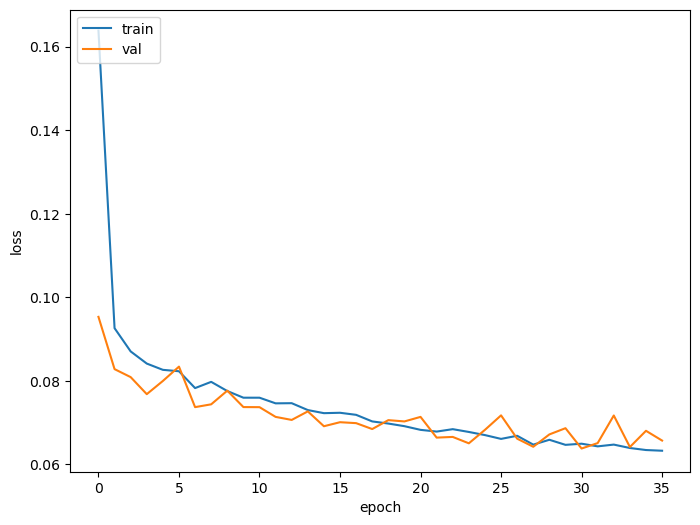

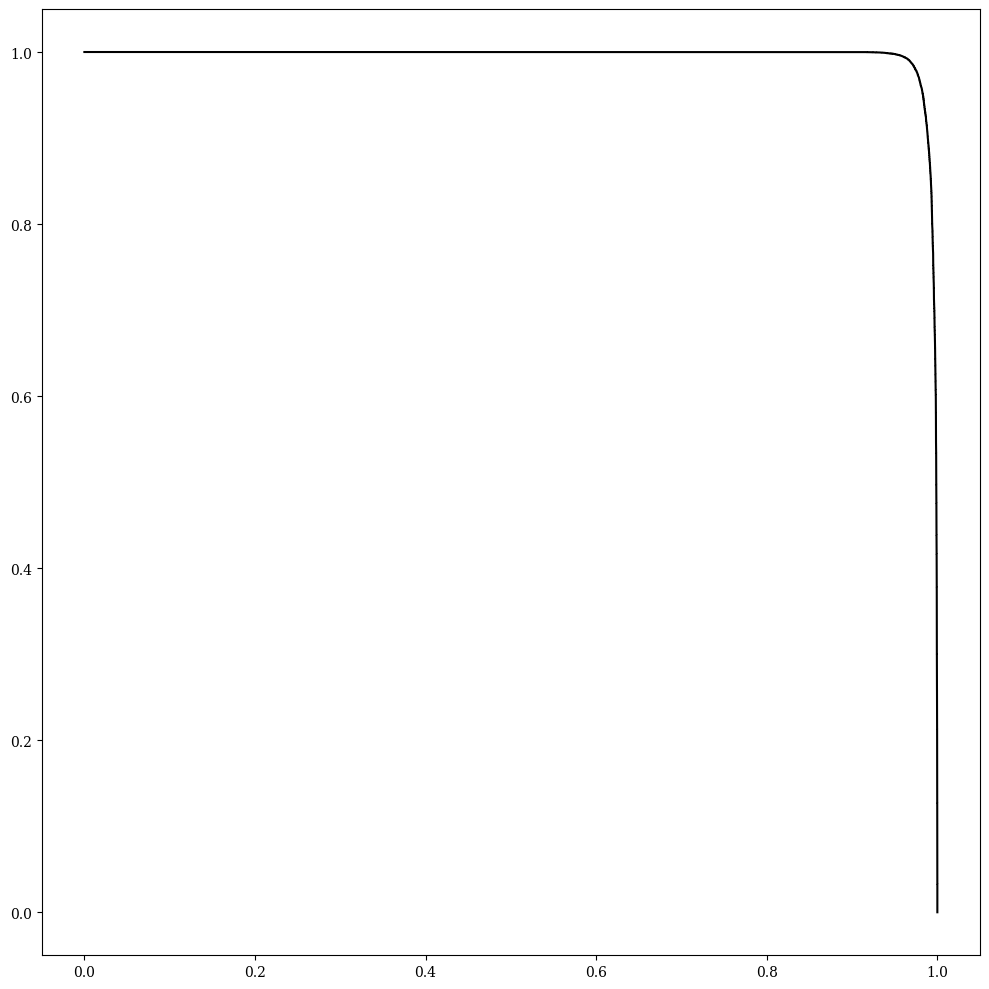

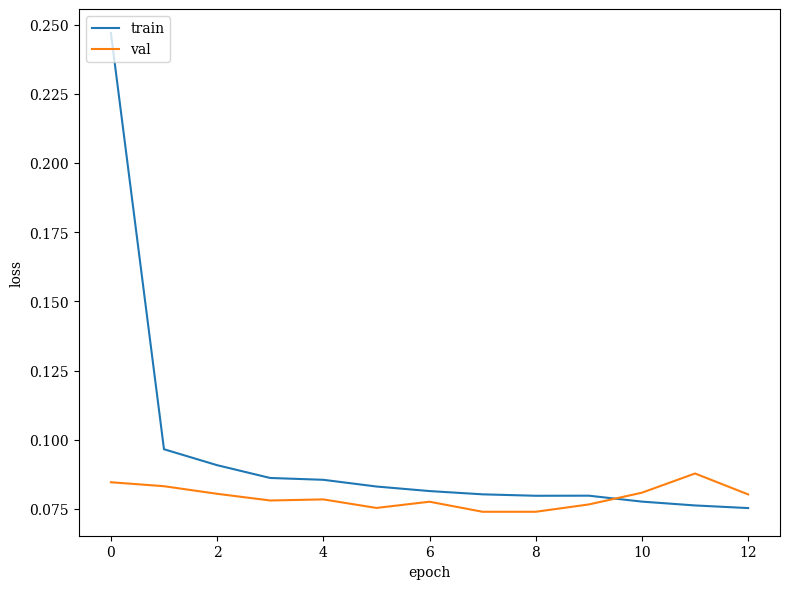

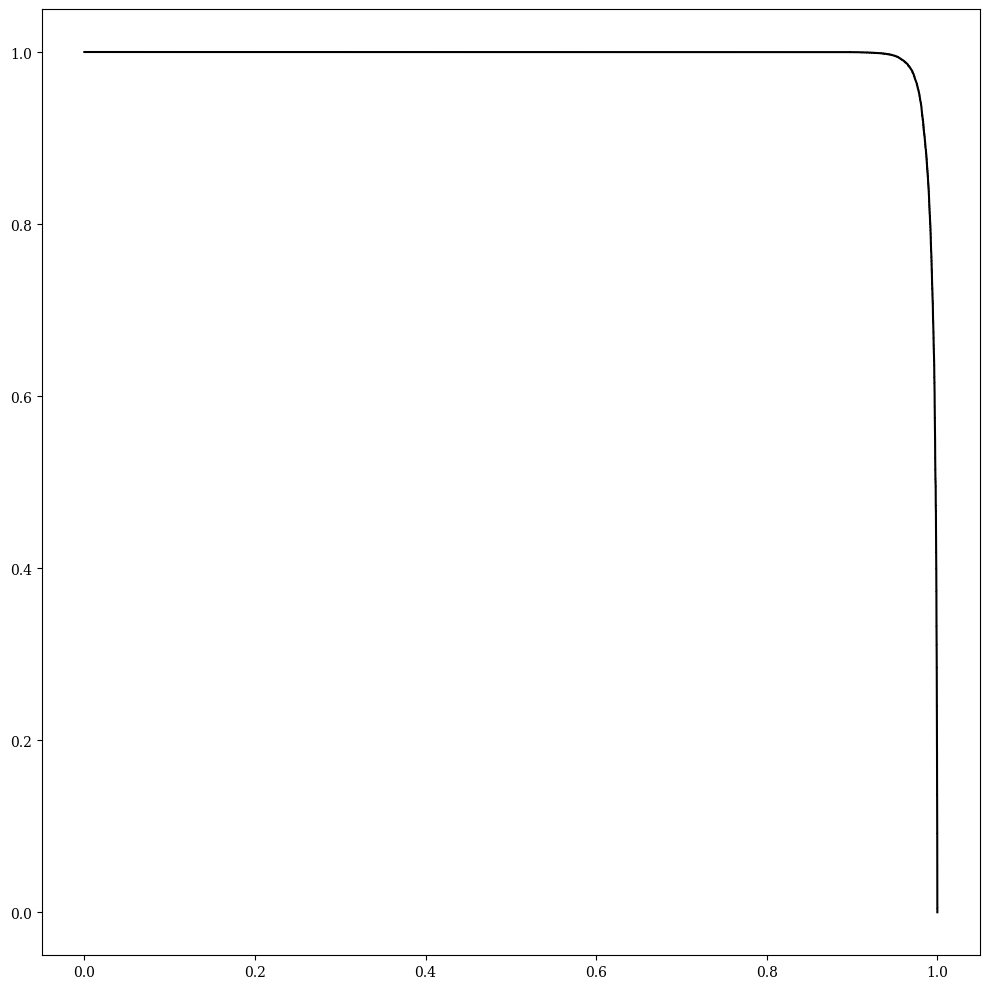

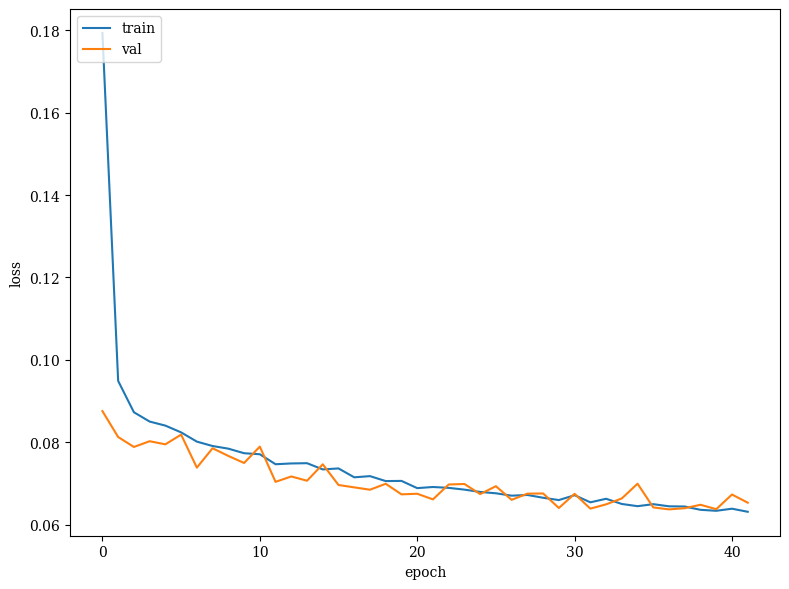

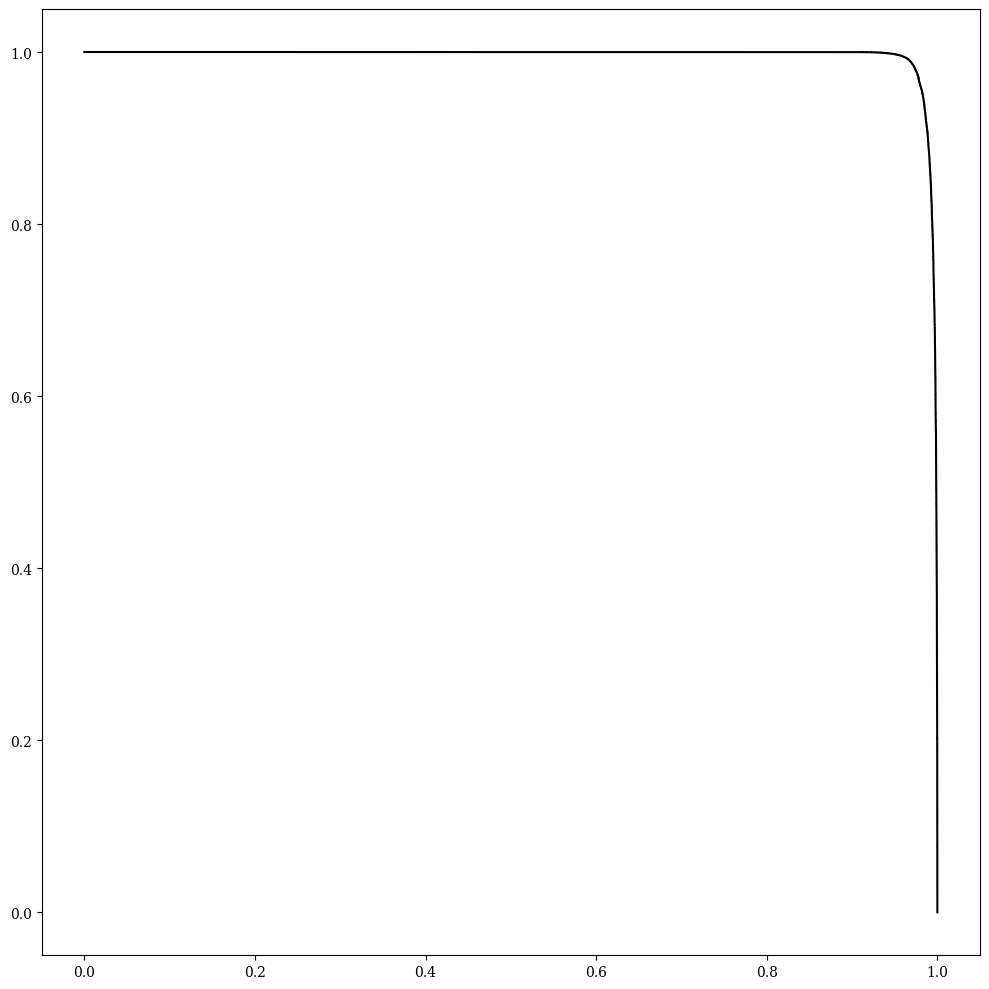

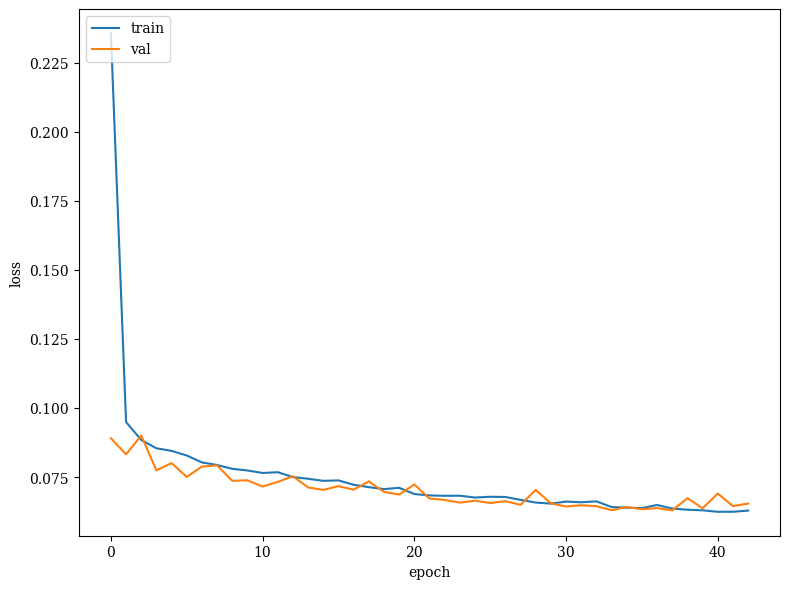

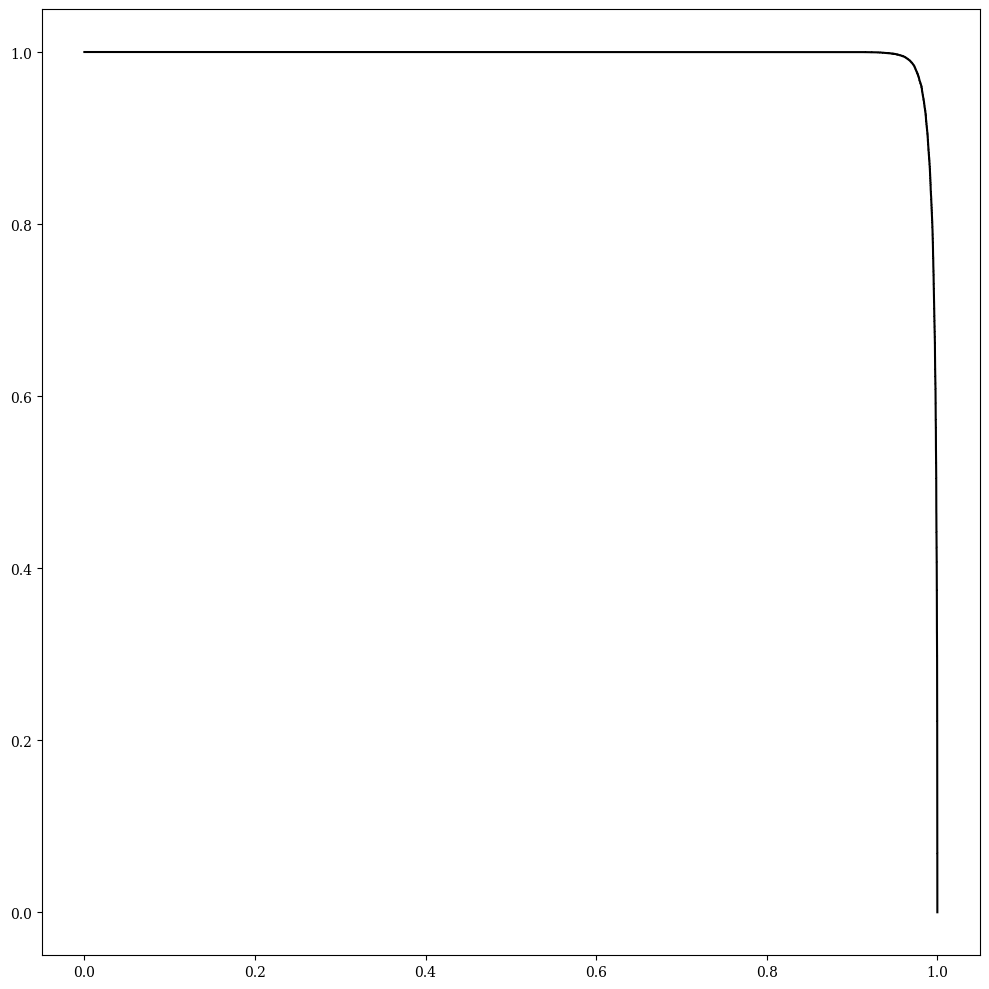

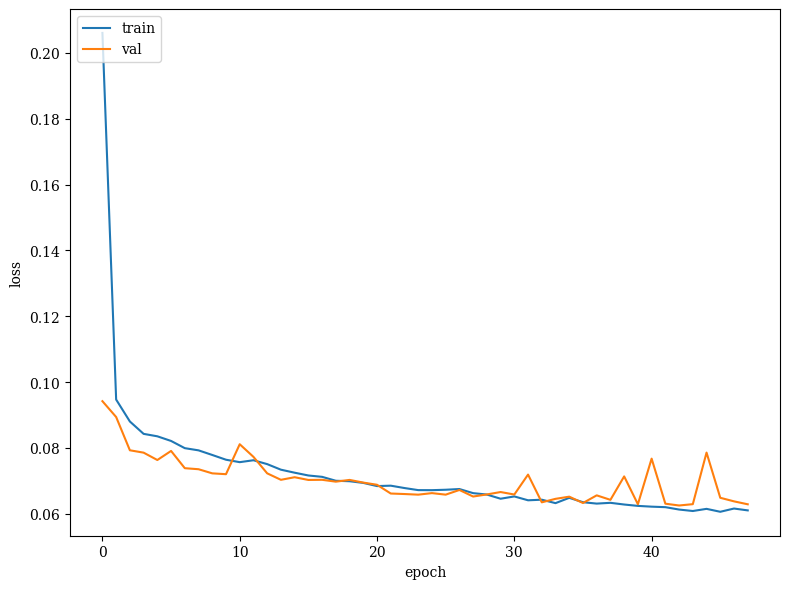

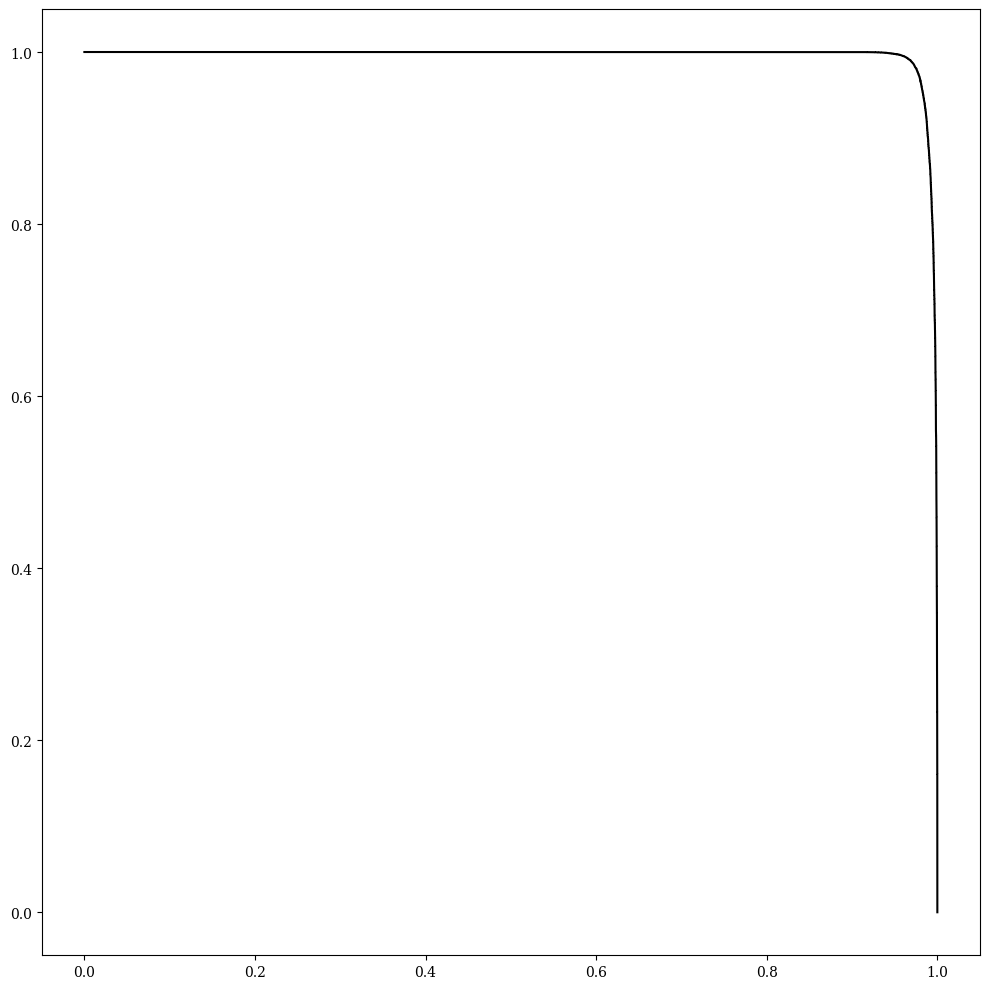

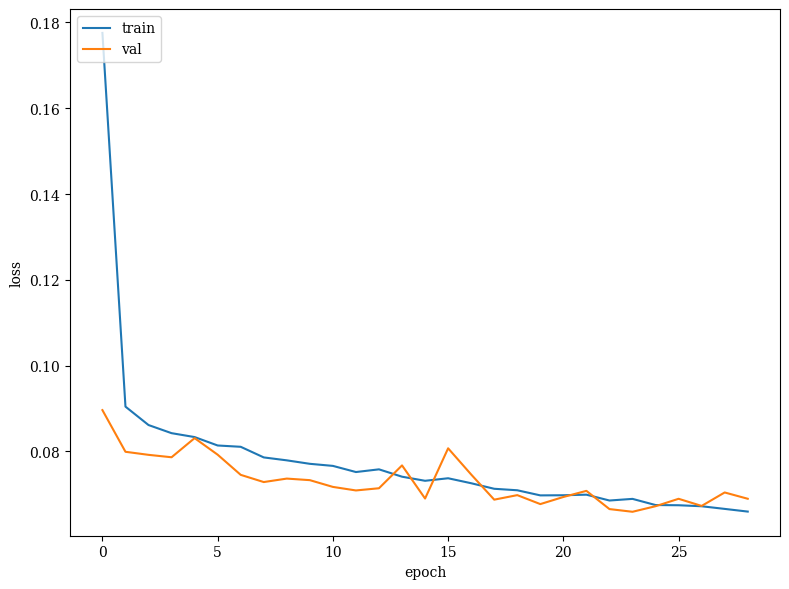

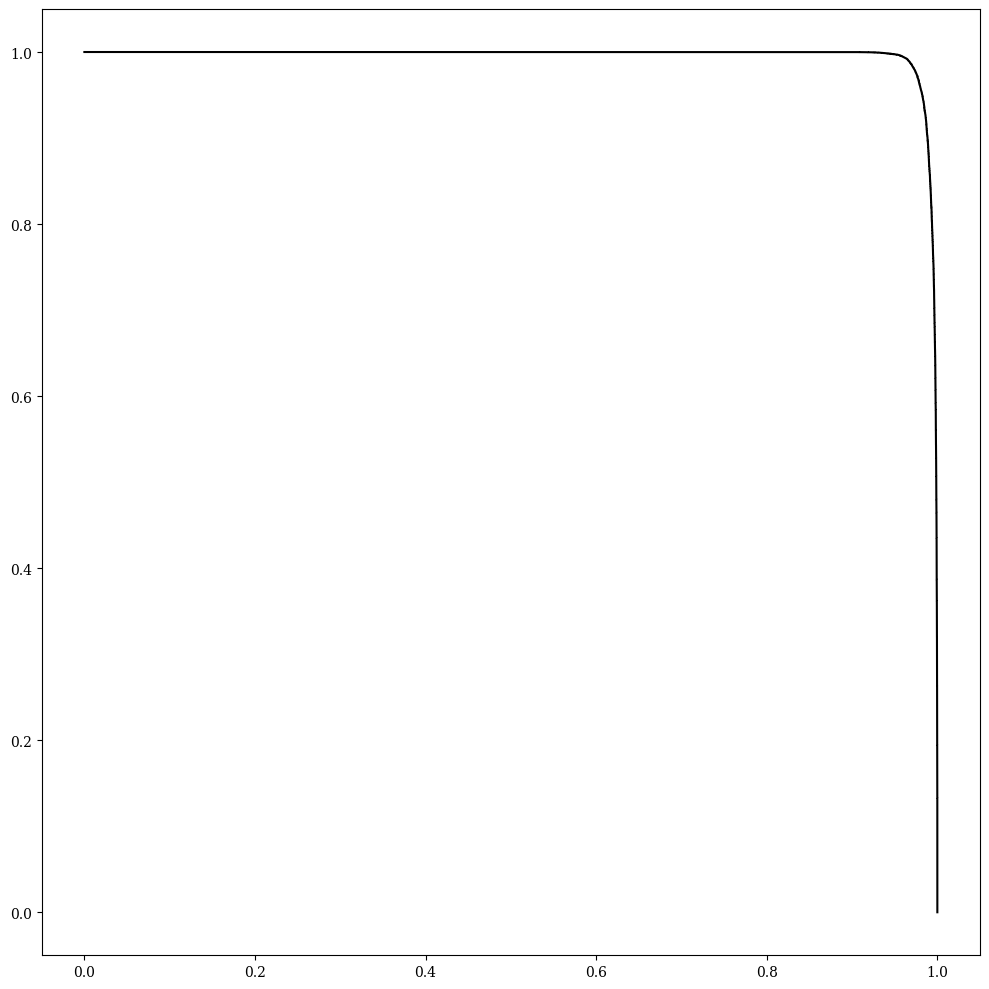

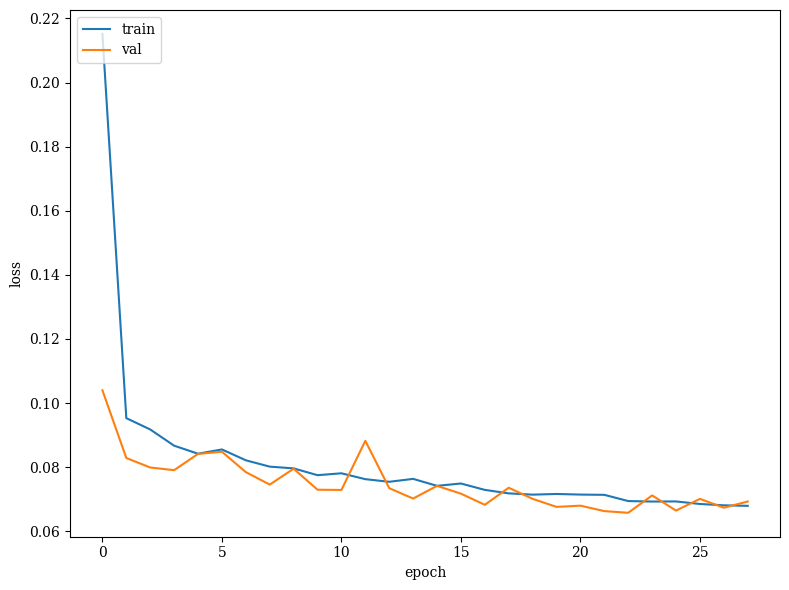

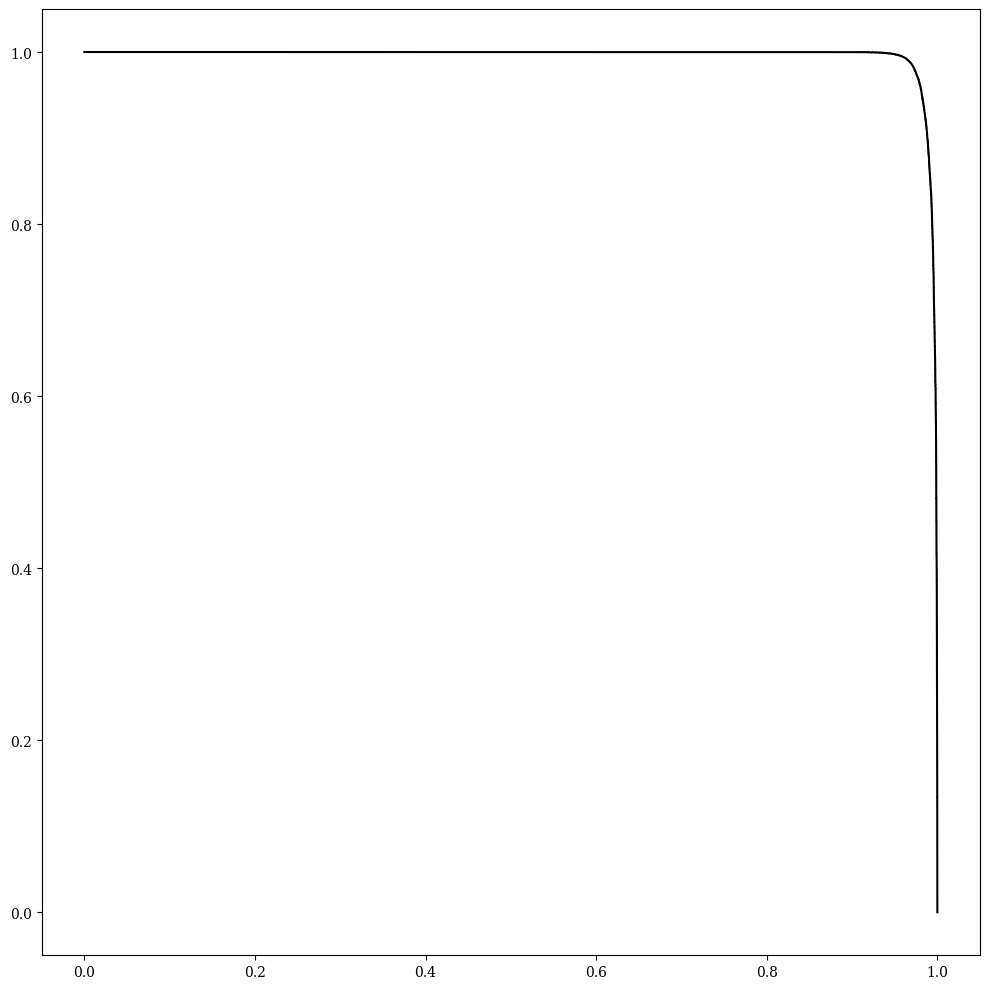

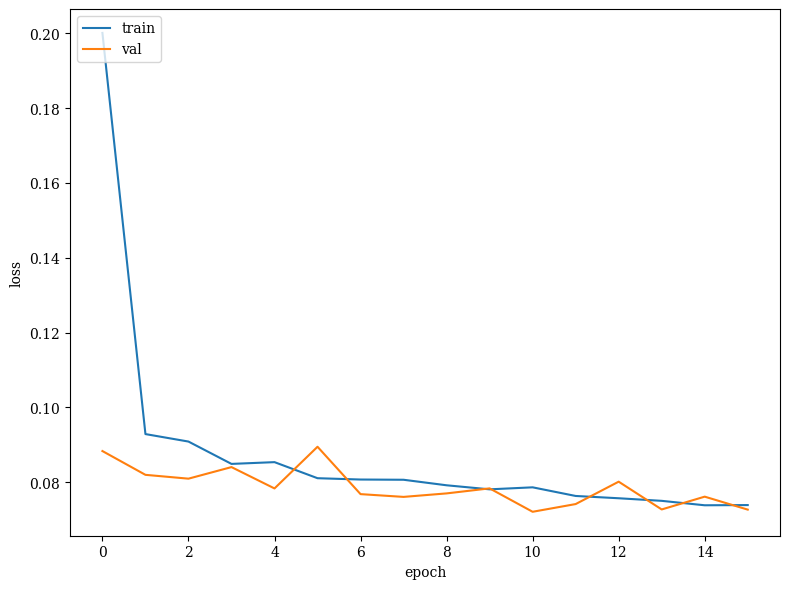

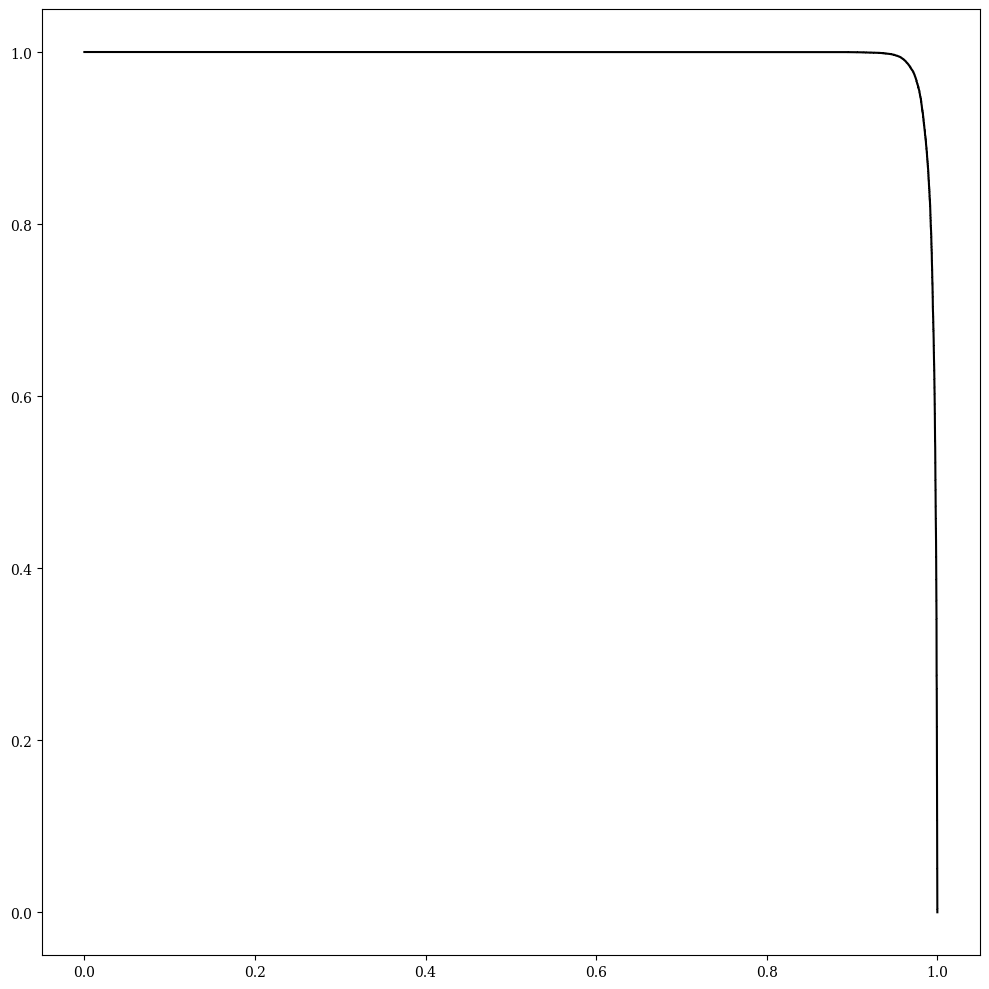

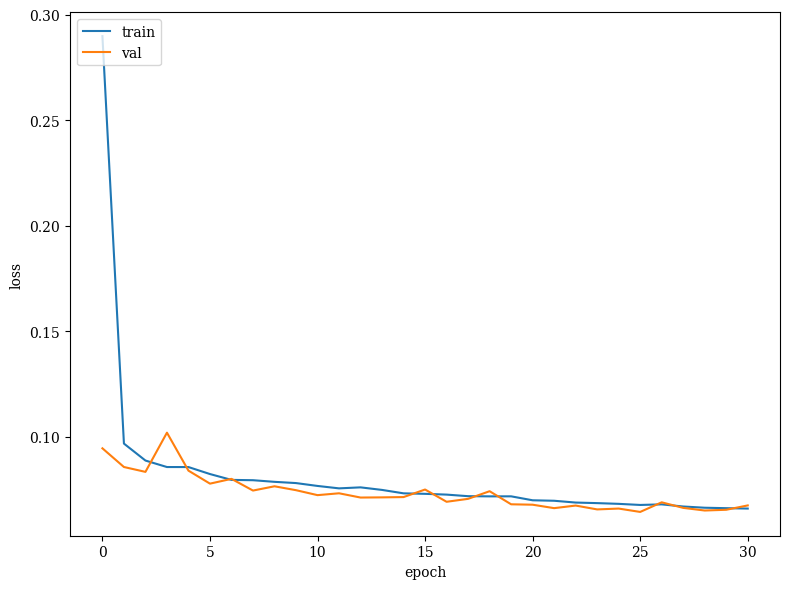

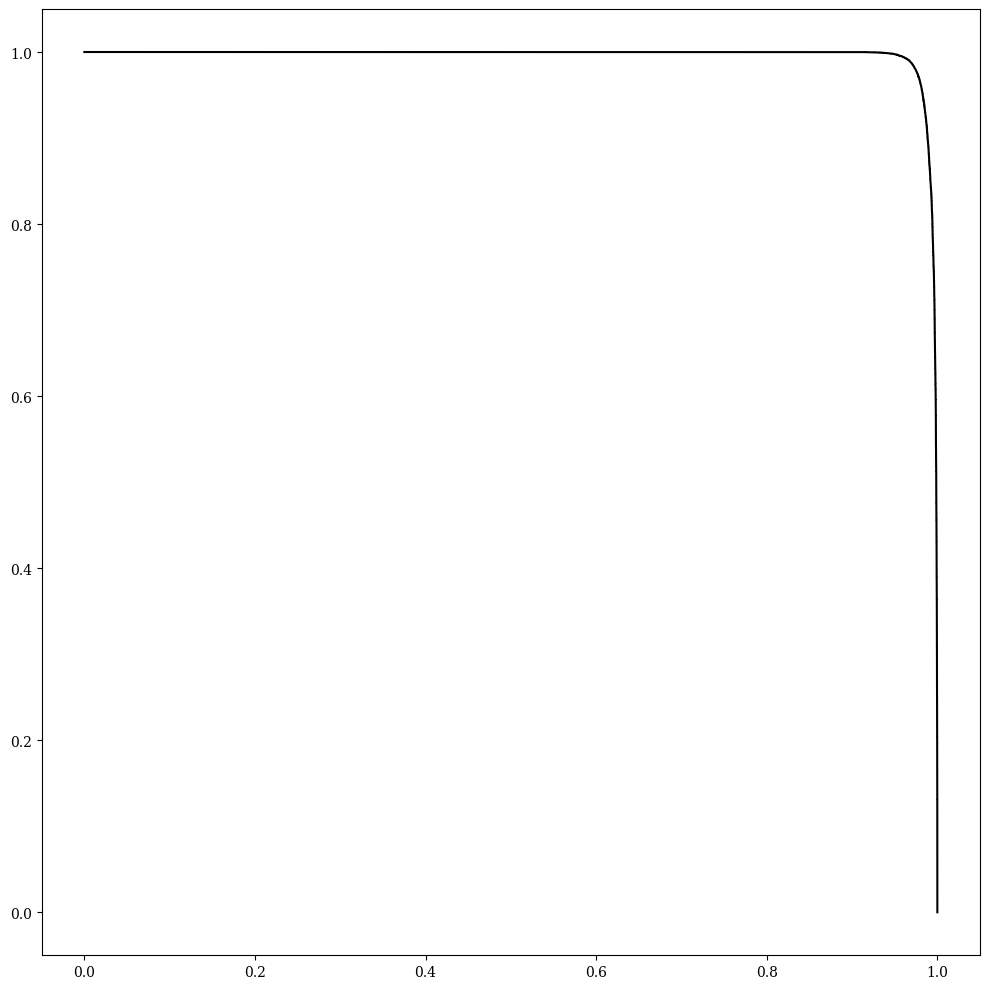

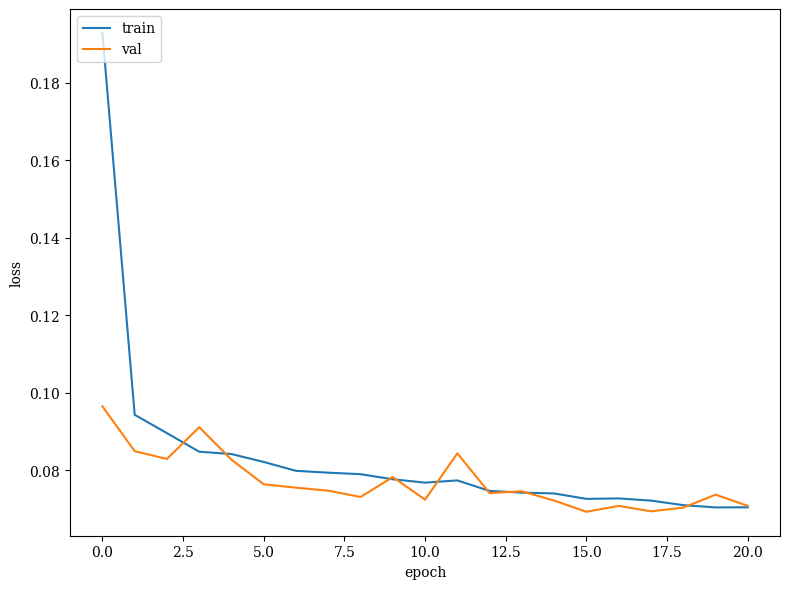

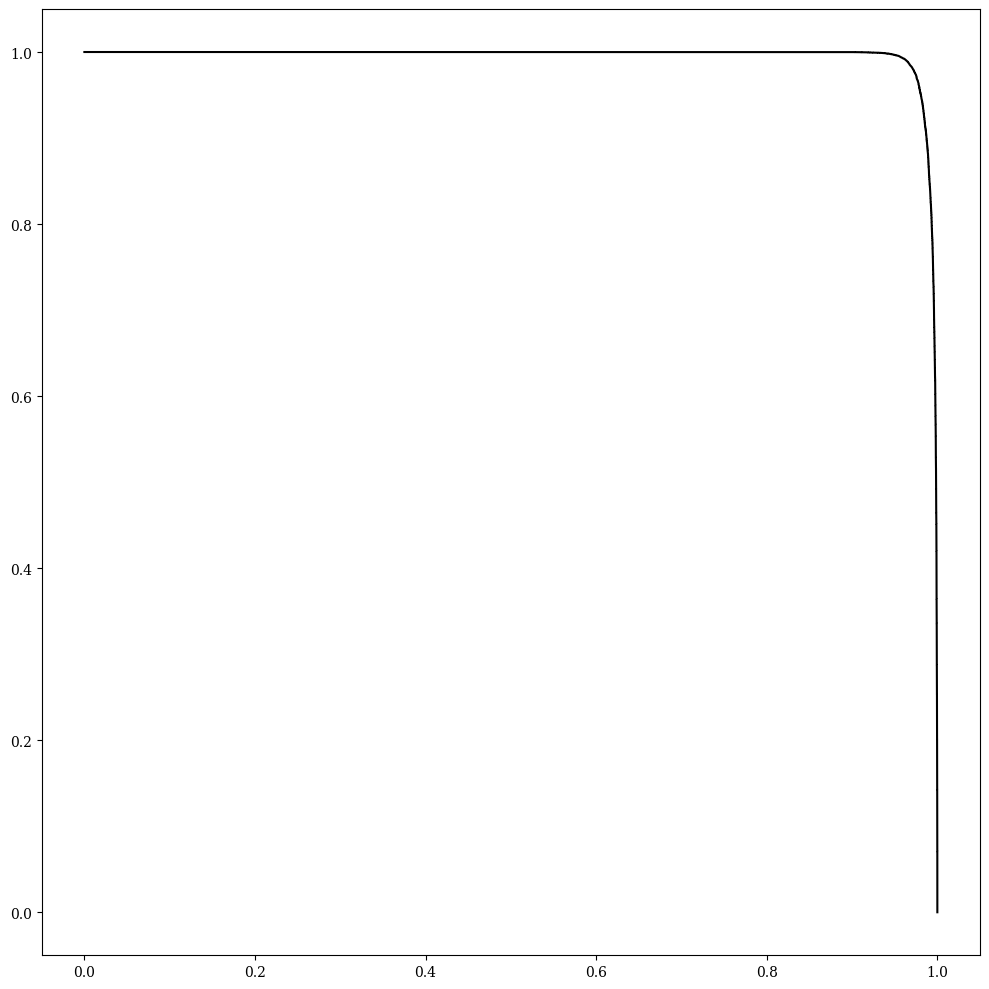

In [3]:
# Regular PFN, no spectral normalization
for i in range(10):
    loss = BinaryCrossentropy(from_logits=False)
    #out_act = keras.activations.linear
    model_kwargs = {"Phi_sizes":(60,60,60), "F_sizes":(80,80,80),
                    "F_dropouts":0.1,
                    "input_dim":3,
                    "output_dim":1,"output_act":"sigmoid",
                    "patience":5,
                    "optimizer":Adam(1e-3),
                    "loss":loss,
                    "summary":True}
    model_kwargs['spectral'] = False
    train_kwargs = {"epochs":100,"verbose":1,"batch_size":512}
    pfn, auc, pfn_fp, efn_tp, threshs = train_pfn((train,train_labels),
                                                  (test,test_labels),
                                                  (val,val_labels),
                                                  model_kwargs,
                                                  train_kwargs,
                                                  plot=True)
    pfn.save(f"keras_models_PFN_wta/qjet_PFN_zpT_iter{i}.keras")
    del pfn
    gc.collect()

2023-09-19 22:56:39.748849: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-19 22:56:40.599685: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-19 22:56:40.600362: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-19 22:56:40.613192: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, None, 3)]    0           []                               
                                                                                                  
 tdist_0 (TimeDistributed)      (None, None, 60)     481         ['input[0][0]']                  
                                                                                                  
 activation (Activation)        (None, None, 60)     0           ['tdist_0[0][0]']                
                                                                                                  
 tdist_1 (TimeDistributed)      (None, None, 60)     7321        ['activation[0][0]']             
                                                                                              

2023-09-19 22:56:45.730889: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


Epoch 1/150
20/20 [==============================] - 6s 193ms/step - loss: 0.6596 - acc: 0.4944 - val_loss: 0.6305 - val_acc: 0.5000
Epoch 2/150
20/20 [==============================] - 3s 153ms/step - loss: 0.6158 - acc: 0.5000 - val_loss: 0.6015 - val_acc: 0.5000
Epoch 3/150
20/20 [==============================] - 3s 154ms/step - loss: 0.5991 - acc: 0.5002 - val_loss: 0.5900 - val_acc: 0.5006
Epoch 4/150
20/20 [==============================] - 3s 153ms/step - loss: 0.5866 - acc: 0.5082 - val_loss: 0.5739 - val_acc: 0.5144
Epoch 5/150
20/20 [==============================] - 3s 153ms/step - loss: 0.5718 - acc: 0.5334 - val_loss: 0.5571 - val_acc: 0.5478
Epoch 6/150
20/20 [==============================] - 3s 147ms/step - loss: 0.5555 - acc: 0.5773 - val_loss: 0.5377 - val_acc: 0.5986
Epoch 7/150
20/20 [==============================] - 3s 154ms/step - loss: 0.5372 - acc: 0.6348 - val_loss: 0.5164 - val_acc: 0.6527
Epoch 8/150
20/20 [==============================] - 3s 152ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/150
20/20 [==============================] - 6s 185ms/step - loss: 0.6475 - acc: 0.5042 - val_loss: 0.6196 - val_acc: 0.5000
Epoch 2/150
20/20 [==============================] - 3s 158ms/step - loss: 0.6086 - acc: 0.5000 - val_loss: 0.5963 - val_acc: 0.5000
Epoch 3/150
20/20 [==============================] - 3s 151ms/step - loss: 0.5944 - acc: 0.5024 - val_loss: 0.5825 - val_acc: 0.5081
Epoch 4/150
20/20 [==============================] - 3s 152ms/step - loss: 0.5804 - acc: 0.5191 - val_loss: 0.5666 - val_acc: 0.5335
Epoch 5/150
20/20 [==============================] - 3s 145ms/step - loss: 0.5645 - acc: 0.5551 - val_loss: 0.5479 - val_acc: 0.5798
Epoch 6/150
20/20 [==============================] - 3s 149ms/step - loss: 0.5468 - acc: 0.6067 - val_loss: 0.5274 - val_acc: 0.6351
Epoch 7/150
20/20 [==============================] - 3s 153ms/step - loss: 0.5274 - acc: 0.6683 - val_loss: 0.5054 - val_acc: 0.6980
Epoch 8/150
20/20 [==============================] - 3s 150ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/150
20/20 [==============================] - 6s 181ms/step - loss: 0.6667 - acc: 0.5035 - val_loss: 0.6418 - val_acc: 0.5000
Epoch 2/150
20/20 [==============================] - 3s 151ms/step - loss: 0.6228 - acc: 0.5002 - val_loss: 0.6050 - val_acc: 0.5000
Epoch 3/150
20/20 [==============================] - 3s 152ms/step - loss: 0.5989 - acc: 0.5008 - val_loss: 0.5880 - val_acc: 0.5025
Epoch 4/150
20/20 [==============================] - 3s 143ms/step - loss: 0.5846 - acc: 0.5126 - val_loss: 0.5717 - val_acc: 0.5256
Epoch 5/150
20/20 [==============================] - 3s 155ms/step - loss: 0.5687 - acc: 0.5497 - val_loss: 0.5535 - val_acc: 0.5753
Epoch 6/150
20/20 [==============================] - 3s 141ms/step - loss: 0.5508 - acc: 0.5967 - val_loss: 0.5343 - val_acc: 0.6219
Epoch 7/150
20/20 [==============================] - 3s 155ms/step - loss: 0.5331 - acc: 0.6469 - val_loss: 0.5143 - val_acc: 0.6808
Epoch 8/150
20/20 [==============================] - 3s 146ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/150
20/20 [==============================] - 6s 192ms/step - loss: 0.6489 - acc: 0.4990 - val_loss: 0.6233 - val_acc: 0.5000
Epoch 2/150
20/20 [==============================] - 3s 154ms/step - loss: 0.6107 - acc: 0.5000 - val_loss: 0.5991 - val_acc: 0.5000
Epoch 3/150
20/20 [==============================] - 3s 152ms/step - loss: 0.5949 - acc: 0.5014 - val_loss: 0.5847 - val_acc: 0.5048
Epoch 4/150
20/20 [==============================] - 3s 146ms/step - loss: 0.5813 - acc: 0.5156 - val_loss: 0.5696 - val_acc: 0.5252
Epoch 5/150
20/20 [==============================] - 3s 148ms/step - loss: 0.5658 - acc: 0.5446 - val_loss: 0.5523 - val_acc: 0.5630
Epoch 6/150
20/20 [==============================] - 3s 147ms/step - loss: 0.5491 - acc: 0.5870 - val_loss: 0.5334 - val_acc: 0.6107
Epoch 7/150
20/20 [==============================] - 3s 159ms/step - loss: 0.5319 - acc: 0.6346 - val_loss: 0.5150 - val_acc: 0.6610
Epoch 8/150
20/20 [==============================] - 3s 153ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/150
20/20 [==============================] - 6s 190ms/step - loss: 0.6676 - acc: 0.5009 - val_loss: 0.6390 - val_acc: 0.5000
Epoch 2/150
20/20 [==============================] - 3s 151ms/step - loss: 0.6202 - acc: 0.5018 - val_loss: 0.6021 - val_acc: 0.5006
Epoch 3/150
20/20 [==============================] - 3s 148ms/step - loss: 0.5951 - acc: 0.5102 - val_loss: 0.5800 - val_acc: 0.5203
Epoch 4/150
20/20 [==============================] - 3s 144ms/step - loss: 0.5747 - acc: 0.5494 - val_loss: 0.5556 - val_acc: 0.5749
Epoch 5/150
20/20 [==============================] - 3s 150ms/step - loss: 0.5518 - acc: 0.6131 - val_loss: 0.5306 - val_acc: 0.6402
Epoch 6/150
20/20 [==============================] - 3s 148ms/step - loss: 0.5287 - acc: 0.6735 - val_loss: 0.5073 - val_acc: 0.6943
Epoch 7/150
20/20 [==============================] - 3s 160ms/step - loss: 0.5078 - acc: 0.7255 - val_loss: 0.4864 - val_acc: 0.7556
Epoch 8/150
20/20 [==============================] - 3s 156ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/150
20/20 [==============================] - 5s 173ms/step - loss: 0.6727 - acc: 0.5112 - val_loss: 0.6369 - val_acc: 0.5000
Epoch 2/150
20/20 [==============================] - 3s 146ms/step - loss: 0.6217 - acc: 0.5002 - val_loss: 0.6055 - val_acc: 0.5000
Epoch 3/150
20/20 [==============================] - 3s 143ms/step - loss: 0.6013 - acc: 0.5019 - val_loss: 0.5886 - val_acc: 0.5054
Epoch 4/150
20/20 [==============================] - 3s 143ms/step - loss: 0.5864 - acc: 0.5182 - val_loss: 0.5726 - val_acc: 0.5264
Epoch 5/150
20/20 [==============================] - 3s 147ms/step - loss: 0.5715 - acc: 0.5529 - val_loss: 0.5561 - val_acc: 0.5707
Epoch 6/150
20/20 [==============================] - 3s 152ms/step - loss: 0.5558 - acc: 0.5975 - val_loss: 0.5390 - val_acc: 0.6231
Epoch 7/150
20/20 [==============================] - 3s 149ms/step - loss: 0.5395 - acc: 0.6441 - val_loss: 0.5209 - val_acc: 0.6663
Epoch 8/150
20/20 [==============================] - 3s 144ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/150
20/20 [==============================] - 5s 170ms/step - loss: 0.6604 - acc: 0.4978 - val_loss: 0.6326 - val_acc: 0.5000
Epoch 2/150
20/20 [==============================] - 3s 155ms/step - loss: 0.6210 - acc: 0.5005 - val_loss: 0.6027 - val_acc: 0.5000
Epoch 3/150
20/20 [==============================] - 3s 138ms/step - loss: 0.5992 - acc: 0.5038 - val_loss: 0.5827 - val_acc: 0.5096
Epoch 4/150
20/20 [==============================] - 3s 146ms/step - loss: 0.5804 - acc: 0.5307 - val_loss: 0.5627 - val_acc: 0.5551
Epoch 5/150
20/20 [==============================] - 3s 143ms/step - loss: 0.5602 - acc: 0.5878 - val_loss: 0.5410 - val_acc: 0.6170
Epoch 6/150
20/20 [==============================] - 3s 143ms/step - loss: 0.5401 - acc: 0.6492 - val_loss: 0.5203 - val_acc: 0.6755
Epoch 7/150
20/20 [==============================] - 3s 148ms/step - loss: 0.5207 - acc: 0.7021 - val_loss: 0.5009 - val_acc: 0.7256
Epoch 8/150
20/20 [==============================] - 3s 144ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/150
20/20 [==============================] - 6s 186ms/step - loss: 0.6511 - acc: 0.5056 - val_loss: 0.6258 - val_acc: 0.5000
Epoch 2/150
20/20 [==============================] - 3s 148ms/step - loss: 0.6135 - acc: 0.5044 - val_loss: 0.5945 - val_acc: 0.5060
Epoch 3/150
20/20 [==============================] - 3s 144ms/step - loss: 0.5911 - acc: 0.5224 - val_loss: 0.5741 - val_acc: 0.5355
Epoch 4/150
20/20 [==============================] - 3s 153ms/step - loss: 0.5714 - acc: 0.5724 - val_loss: 0.5520 - val_acc: 0.5950
Epoch 5/150
20/20 [==============================] - 3s 142ms/step - loss: 0.5502 - acc: 0.6329 - val_loss: 0.5281 - val_acc: 0.6527
Epoch 6/150
20/20 [==============================] - 3s 154ms/step - loss: 0.5279 - acc: 0.6875 - val_loss: 0.5062 - val_acc: 0.7054
Epoch 7/150
20/20 [==============================] - 3s 151ms/step - loss: 0.5075 - acc: 0.7348 - val_loss: 0.4845 - val_acc: 0.7506
Epoch 8/150
20/20 [==============================] - 3s 149ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/150
20/20 [==============================] - 5s 169ms/step - loss: 0.6305 - acc: 0.5000 - val_loss: 0.6117 - val_acc: 0.5000
Epoch 2/150
20/20 [==============================] - 3s 145ms/step - loss: 0.6044 - acc: 0.5006 - val_loss: 0.5904 - val_acc: 0.5020
Epoch 3/150
20/20 [==============================] - 3s 144ms/step - loss: 0.5855 - acc: 0.5200 - val_loss: 0.5680 - val_acc: 0.5421
Epoch 4/150
20/20 [==============================] - 3s 143ms/step - loss: 0.5631 - acc: 0.5685 - val_loss: 0.5431 - val_acc: 0.6009
Epoch 5/150
20/20 [==============================] - 3s 153ms/step - loss: 0.5406 - acc: 0.6264 - val_loss: 0.5196 - val_acc: 0.6631
Epoch 6/150
20/20 [==============================] - 3s 150ms/step - loss: 0.5198 - acc: 0.6820 - val_loss: 0.4991 - val_acc: 0.7232
Epoch 7/150
20/20 [==============================] - 3s 146ms/step - loss: 0.5018 - acc: 0.7307 - val_loss: 0.4814 - val_acc: 0.7602
Epoch 8/150
20/20 [==============================] - 3s 139ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/150
20/20 [==============================] - 5s 181ms/step - loss: 0.6276 - acc: 0.5000 - val_loss: 0.6091 - val_acc: 0.5000
Epoch 2/150
20/20 [==============================] - 3s 142ms/step - loss: 0.6047 - acc: 0.5005 - val_loss: 0.5914 - val_acc: 0.5000
Epoch 3/150
20/20 [==============================] - 3s 142ms/step - loss: 0.5862 - acc: 0.5151 - val_loss: 0.5680 - val_acc: 0.5309
Epoch 4/150
20/20 [==============================] - 3s 141ms/step - loss: 0.5632 - acc: 0.5687 - val_loss: 0.5420 - val_acc: 0.6004
Epoch 5/150
20/20 [==============================] - 3s 142ms/step - loss: 0.5393 - acc: 0.6405 - val_loss: 0.5171 - val_acc: 0.6649
Epoch 6/150
20/20 [==============================] - 3s 140ms/step - loss: 0.5175 - acc: 0.7044 - val_loss: 0.4947 - val_acc: 0.7300
Epoch 7/150
20/20 [==============================] - 3s 146ms/step - loss: 0.4991 - acc: 0.7484 - val_loss: 0.4769 - val_acc: 0.7628
Epoch 8/150
20/20 [==============================] - 3s 139ms/step - 

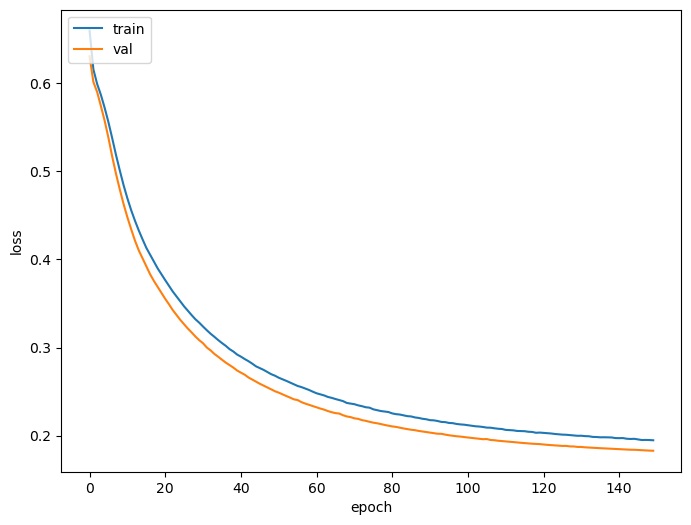

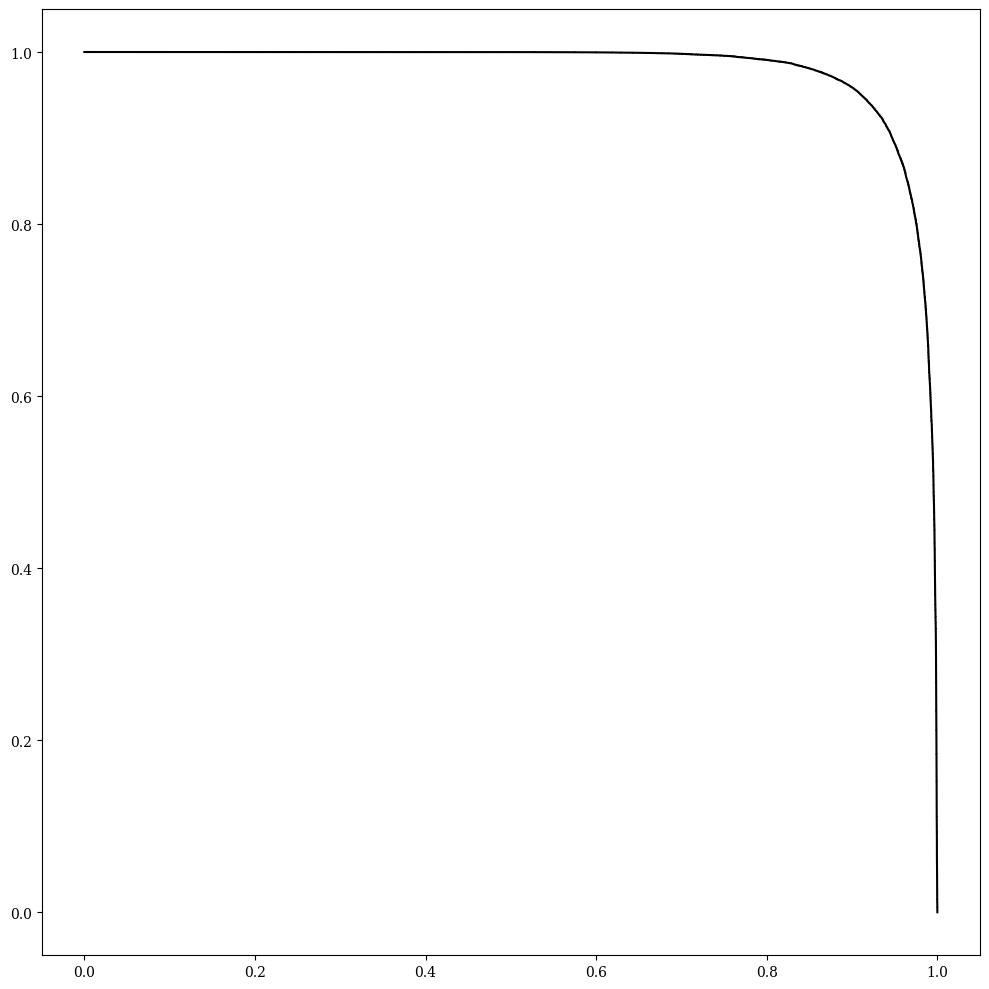

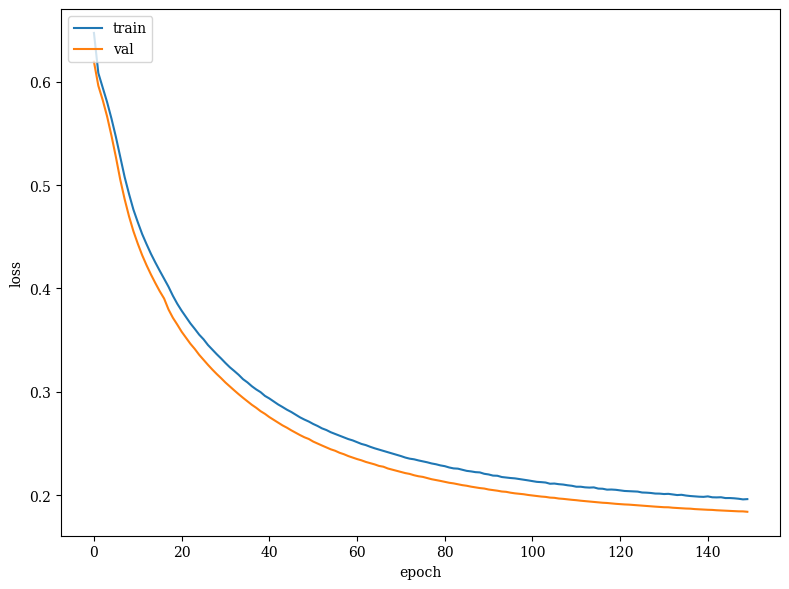

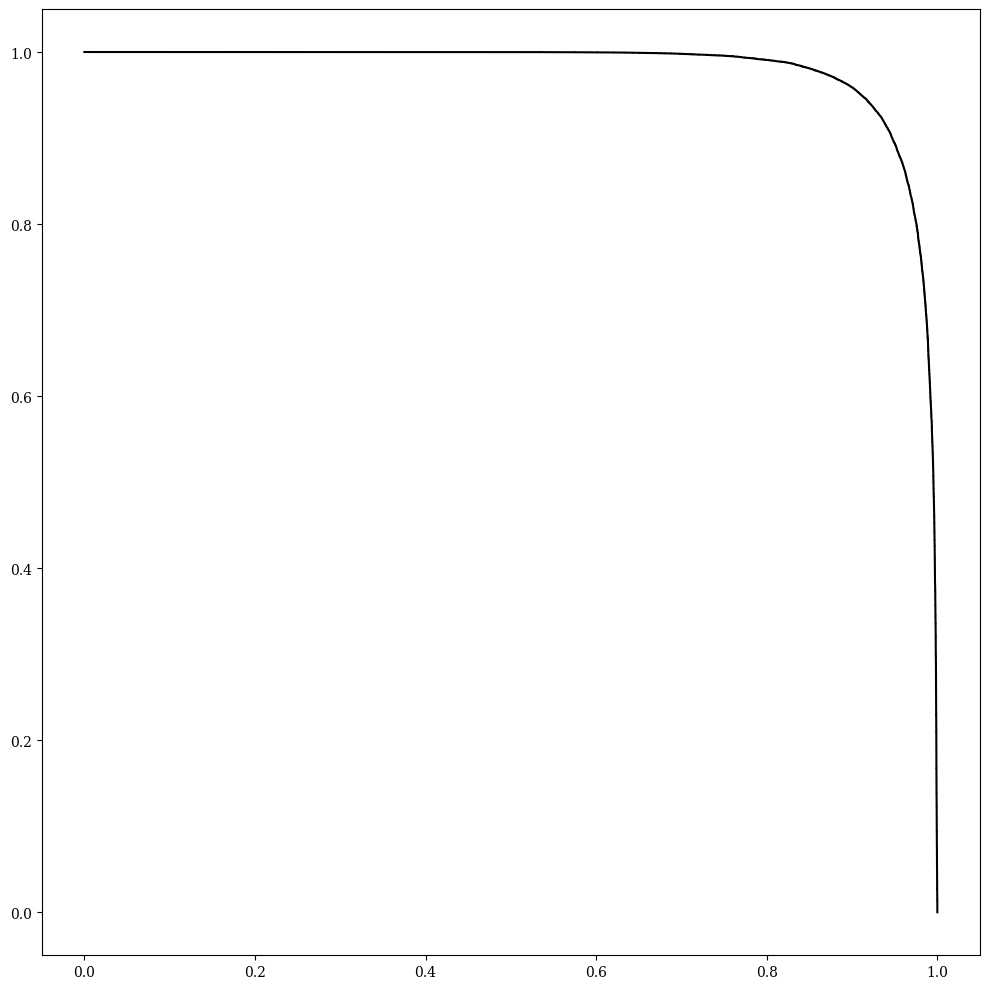

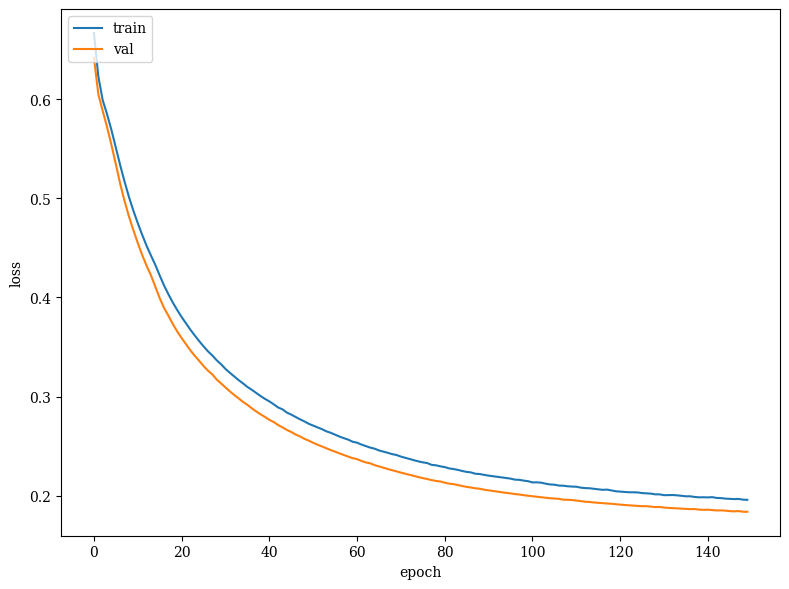

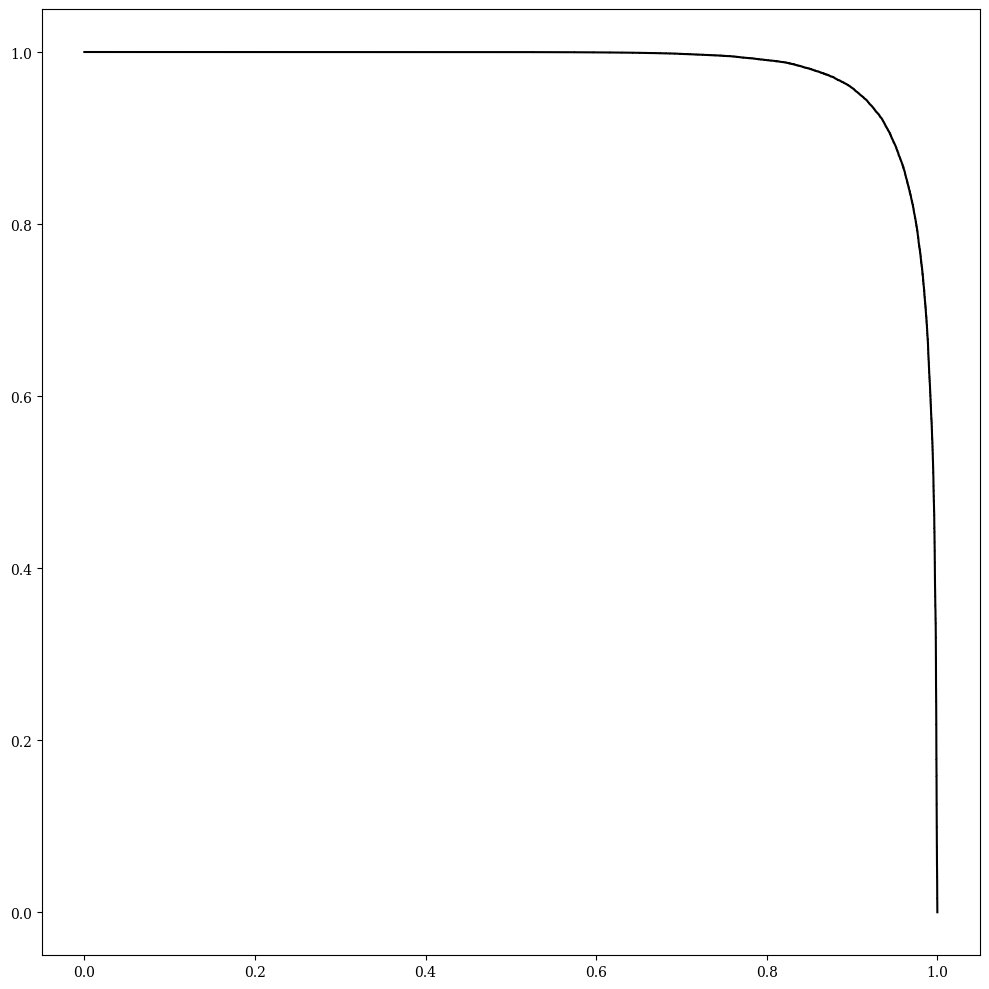

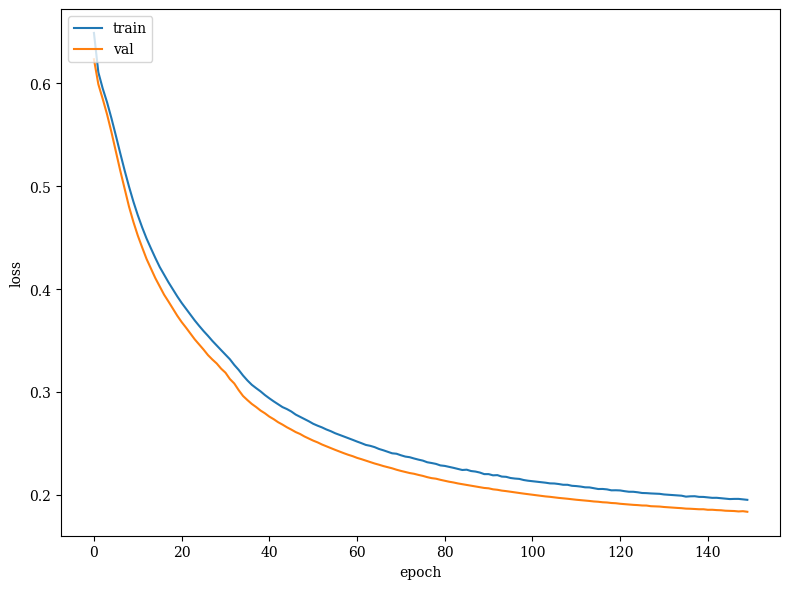

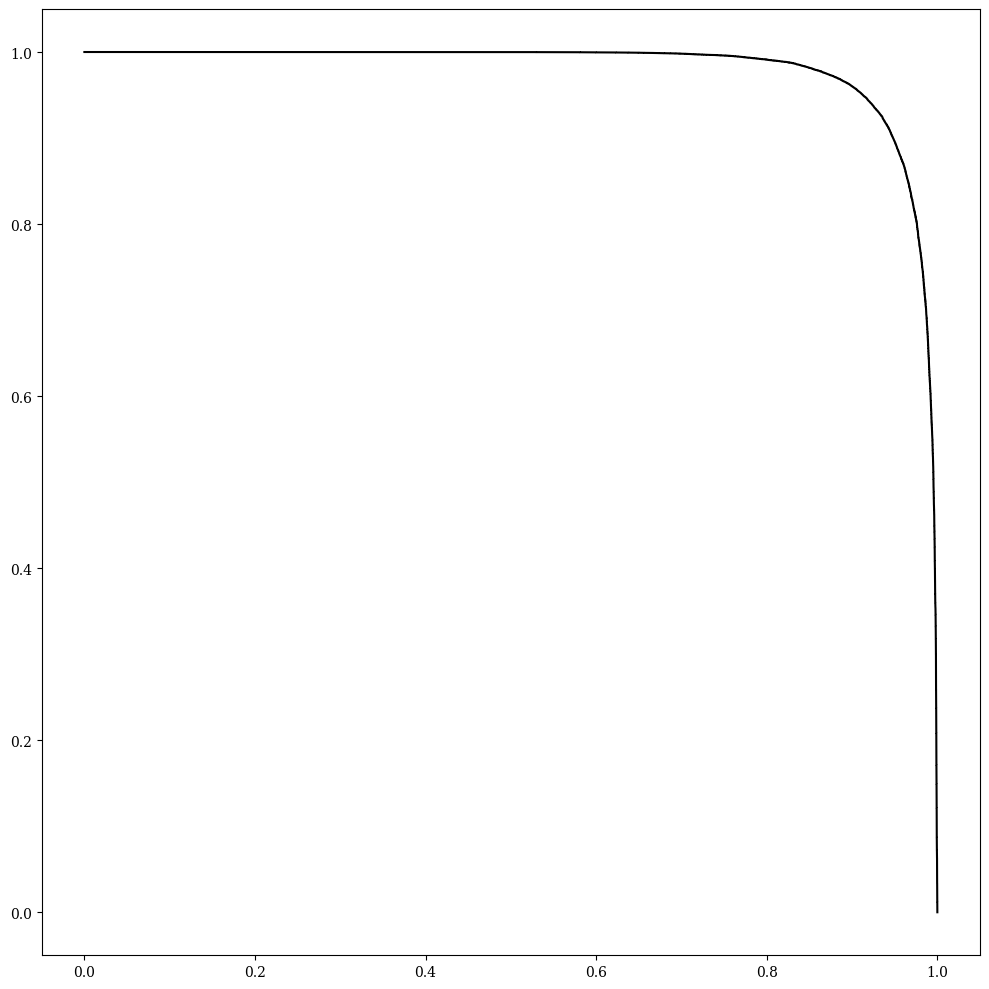

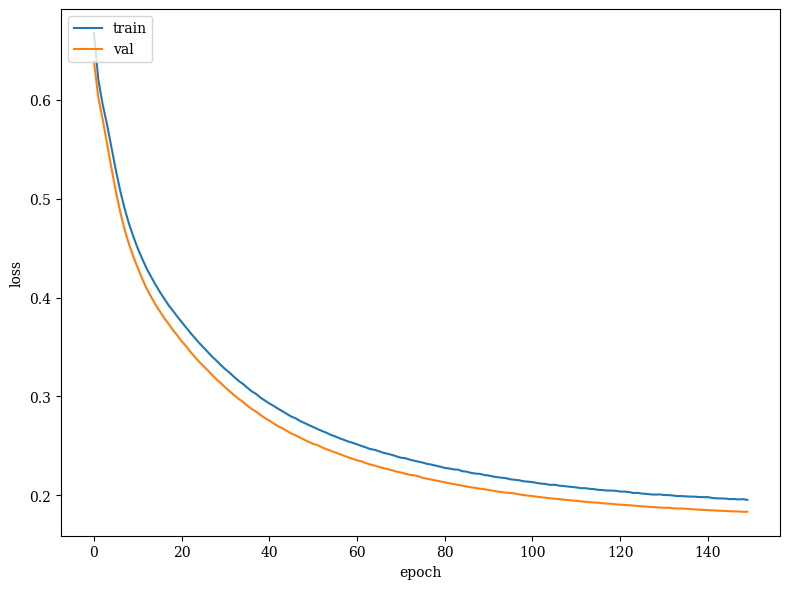

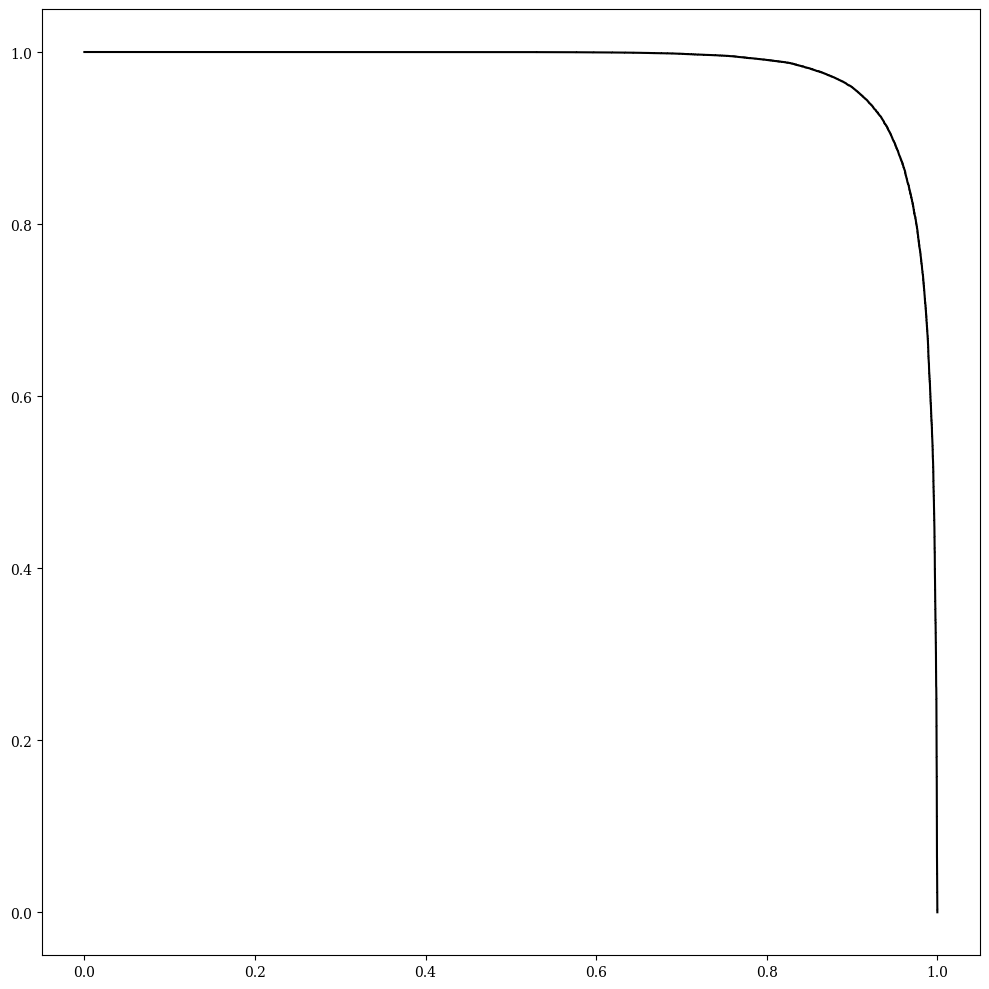

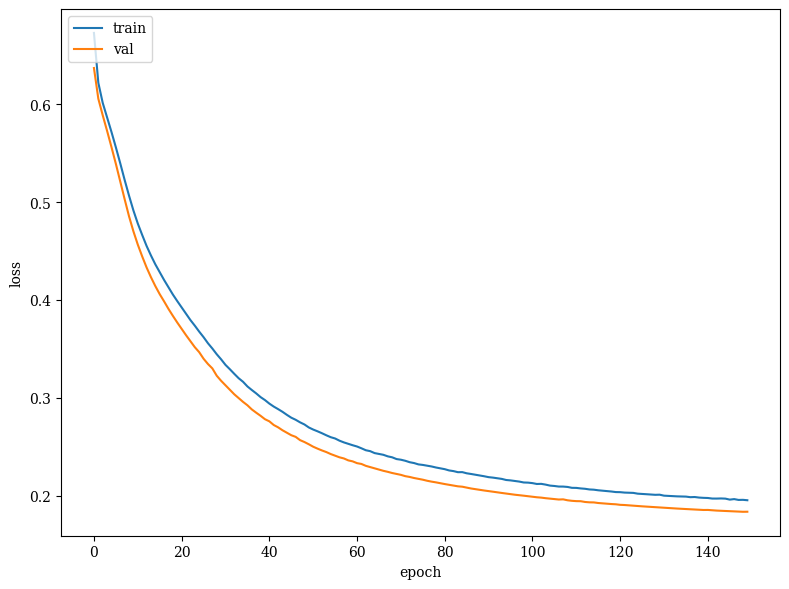

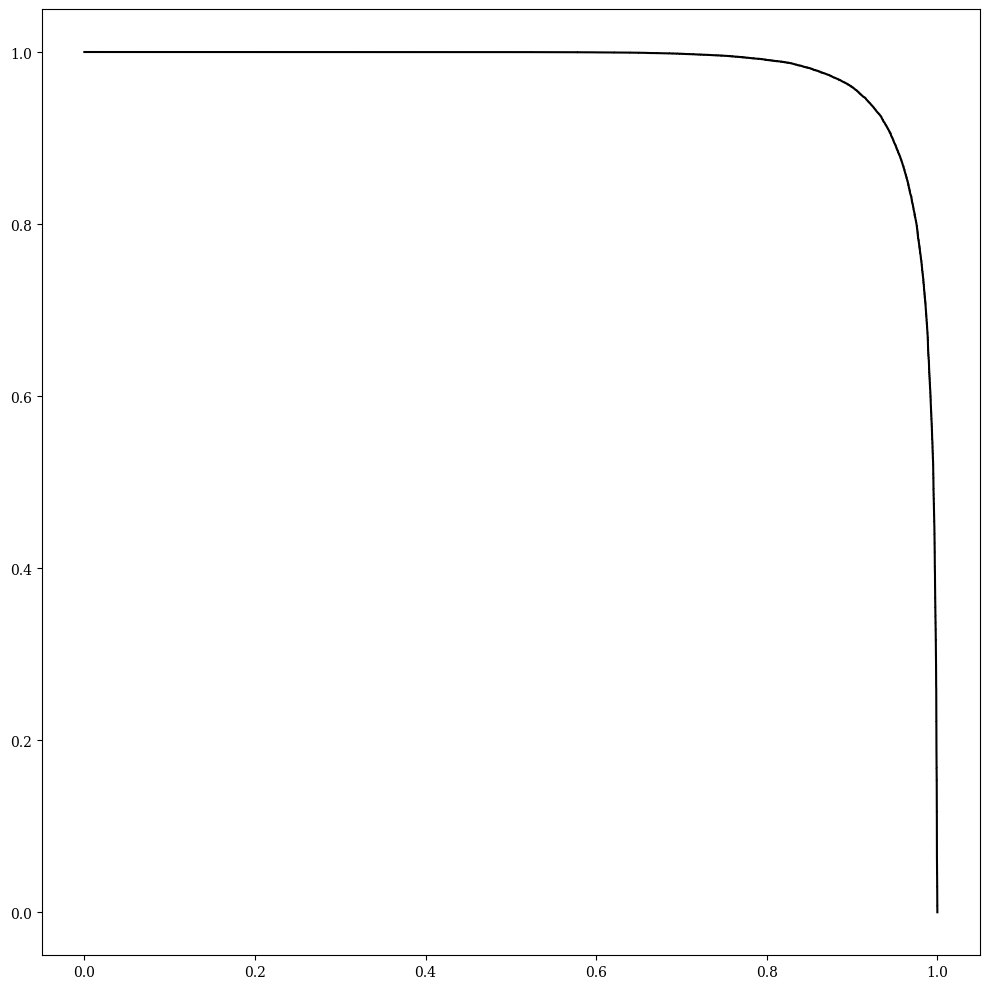

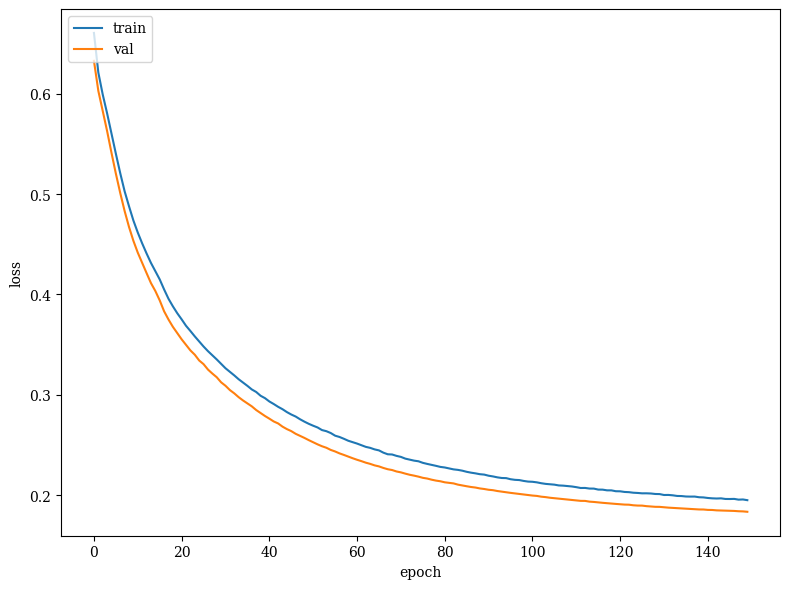

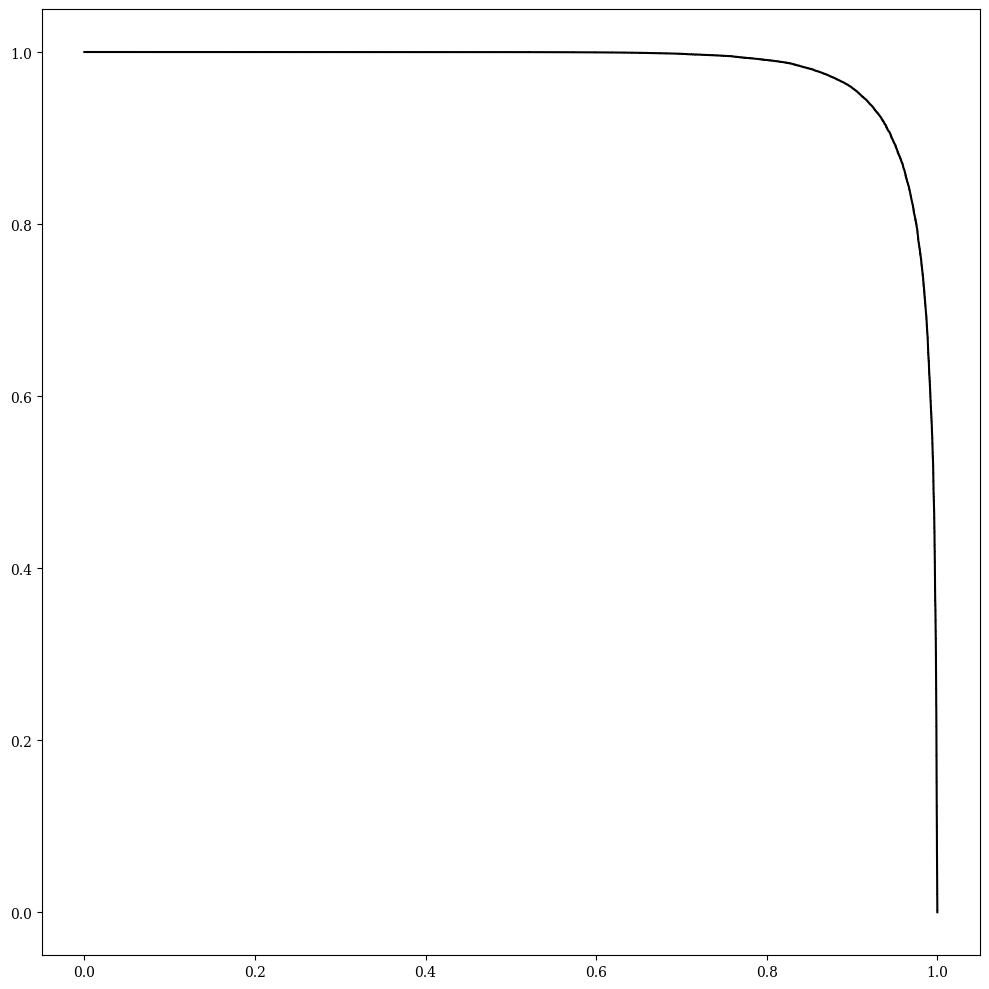

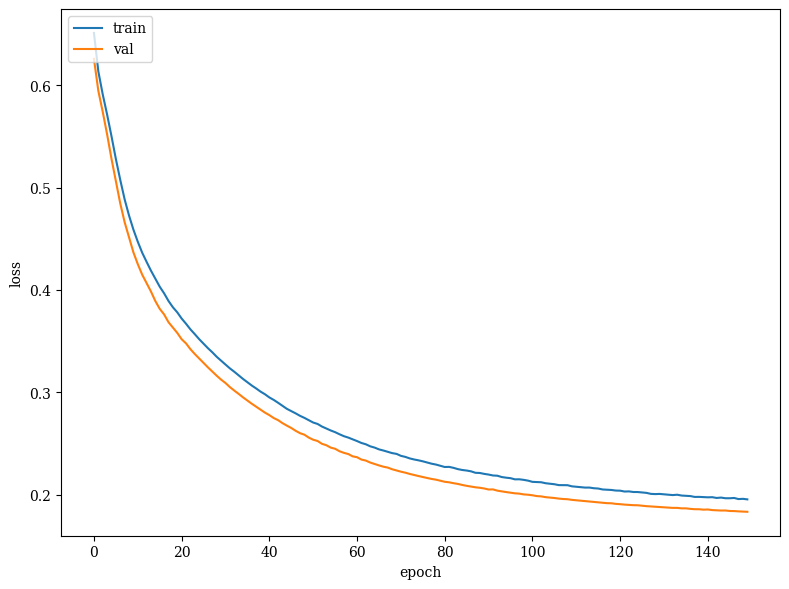

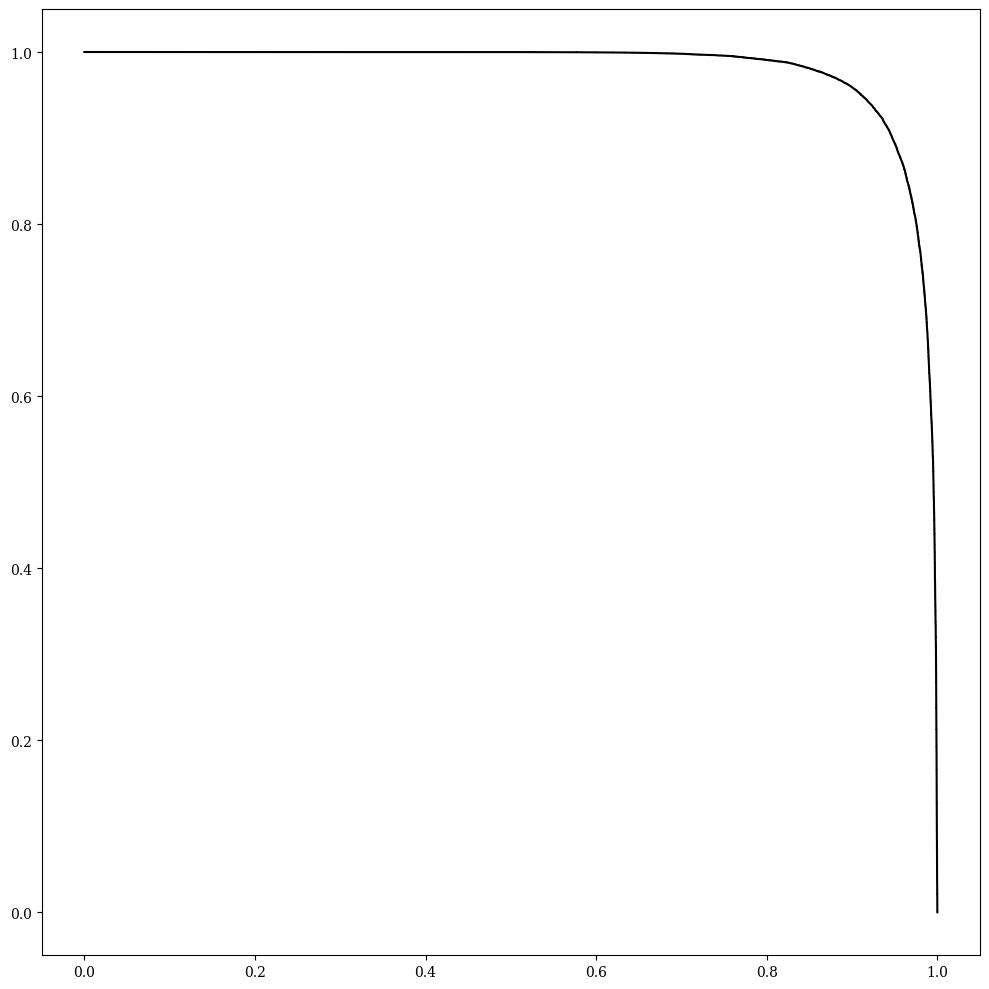

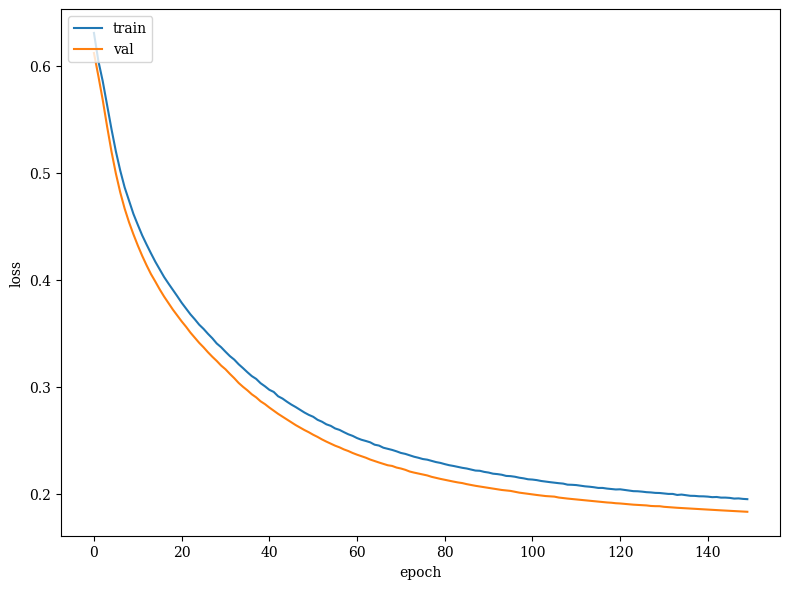

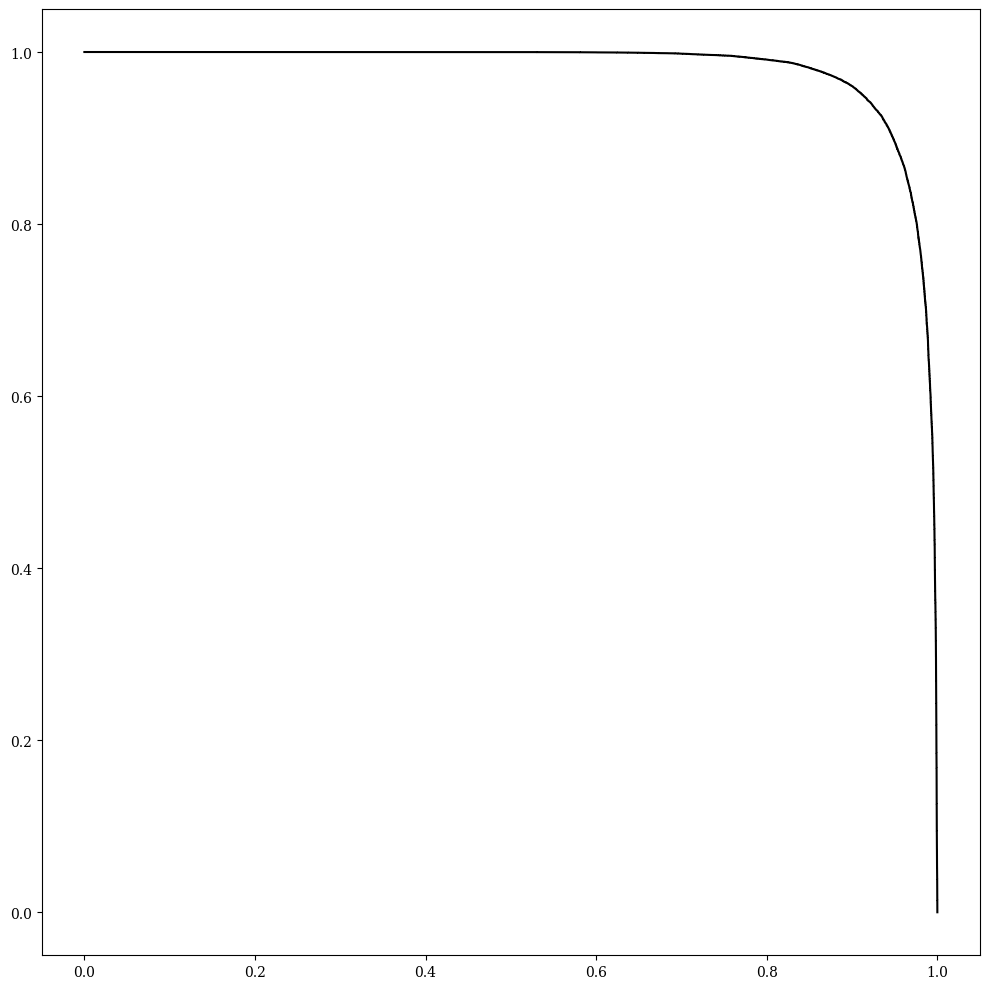

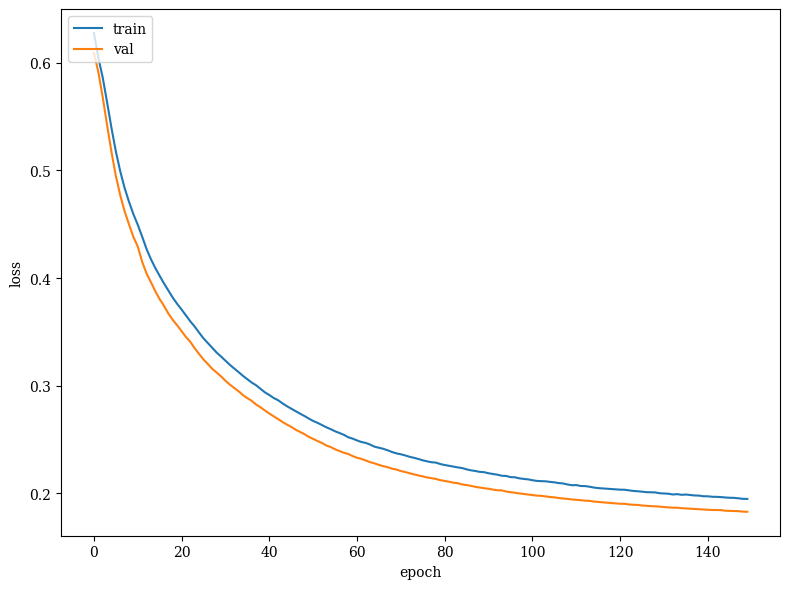

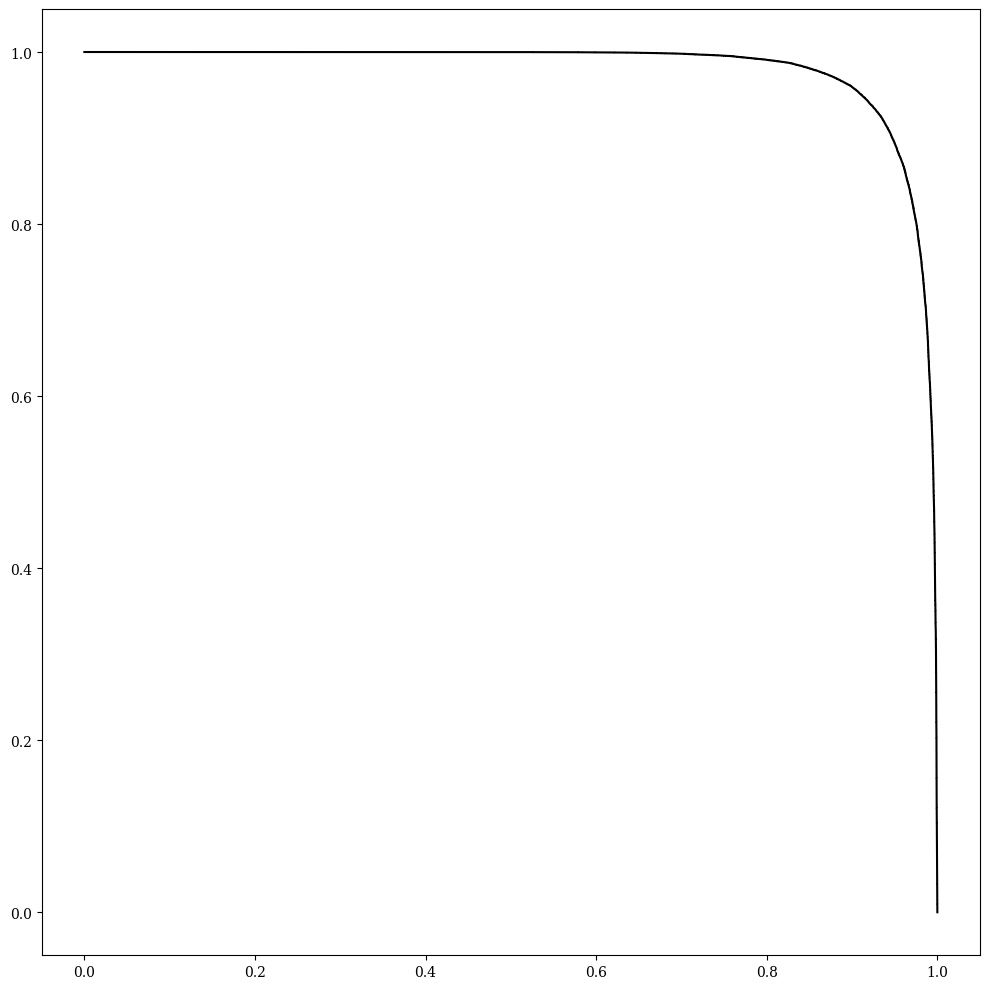

In [3]:
# Spectral PFN
for i in range(10):
    loss = BinaryCrossentropy(from_logits=False)
    #out_act = keras.activations.linear
    model_kwargs = {"Phi_sizes":(60,60,60), "F_sizes":(80,80,80),
                    "F_dropouts":0.1,
                    "input_dim":3,
                    "output_dim":1,"output_act":"sigmoid",
                    "patience":5,
                    "optimizer":Adam(1e-4),
                    "loss":loss,
                    "summary":True}
    model_kwargs['spectral'] = True
    train_kwargs = {"epochs":150,"verbose":1,"batch_size":10000}
    pfn, auc, pfn_fp, efn_tp, threshs = train_pfn((train,train_labels),
                                                  (test,test_labels),
                                                  (val,val_labels),
                                                  model_kwargs,
                                                  train_kwargs,
                                                  plot=True)
    pfn.save(f"keras_models_PFN_wta/qjet_spectralPFN_zpT_iter{i}.keras")
    del pfn
    gc.collect()

# Gluon jets, R = 0.8

In [2]:
base="/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/"
nmax = 200000

hdata = get_data('g',hlevel=True,efrac=False,base=base,nmax=nmax,wta=True)
htrain, htest = train_test_split(hdata,train_size=0.5,random_state=rng1)
htest, hval = train_test_split(htest,train_size=0.5,random_state=rng2)

pdata = get_data('g',hlevel=False,efrac=False,base=base,nmax=nmax,wta=True)
ptrain, ptest = train_test_split(pdata,train_size=0.5,random_state=rng1)
ptest, pval = train_test_split(ptest,train_size=0.5,random_state=rng2)

train = np.concatenate((htrain,ptrain),axis=0)
train_labels = np.concatenate((np.ones((htrain.shape[0],1)),np.zeros((ptrain.shape[0],1))),axis=0)
perm = np.random.permutation(train.shape[0])
train = train[perm]
train_labels = train_labels[perm]

test = np.concatenate((htest,ptest),axis=0)
test_labels = np.concatenate((np.ones((htest.shape[0],1)),np.zeros((ptest.shape[0],1))),axis=0)
perm = np.random.permutation(test.shape[0])
test = test[perm]
test_labels = test_labels[perm]

val = np.concatenate((hval,pval),axis=0)
val_labels = np.concatenate((np.ones((hval.shape[0],1)),np.zeros((pval.shape[0],1))),axis=0)
perm = np.random.permutation(val.shape[0])
val = val[perm]
val_labels = val_labels[perm]

del hdata, pdata, htrain, htest, hval, ptrain, ptest, pval, perm

Loading:
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2gg_set2_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2gg_set0_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2gg_set1_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2gg_set3_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2gg_set4_R1.0_mH1000_pTall_WTA.h5
Loading:
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2gg_set2_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2gg_set0_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2gg_set1_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2gg_set3_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_

2023-09-19 20:22:45.805200: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-19 20:22:46.733409: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-19 20:22:46.733851: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-19 20:22:46.737699: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, None, 3)]    0           []                               
                                                                                                  
 tdist_0 (TimeDistributed)      (None, None, 60)     240         ['input[0][0]']                  
                                                                                                  
 activation (Activation)        (None, None, 60)     0           ['tdist_0[0][0]']                
                                                                                                  
 tdist_1 (TimeDistributed)      (None, None, 60)     3660        ['activation[0][0]']             
                                                                                              

2023-09-19 20:22:51.893774: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


391/391 [==============================] - 7s 13ms/step - loss: 0.1964 - acc: 0.9249 - val_loss: 0.0671 - val_acc: 0.9784
Epoch 2/100
391/391 [==============================] - 4s 10ms/step - loss: 0.0678 - acc: 0.9775 - val_loss: 0.0595 - val_acc: 0.9809
Epoch 3/100
391/391 [==============================] - 4s 10ms/step - loss: 0.0622 - acc: 0.9798 - val_loss: 0.0805 - val_acc: 0.9723
Epoch 4/100
391/391 [==============================] - 4s 10ms/step - loss: 0.0604 - acc: 0.9801 - val_loss: 0.0547 - val_acc: 0.9824
Epoch 5/100
391/391 [==============================] - 4s 10ms/step - loss: 0.0580 - acc: 0.9812 - val_loss: 0.0667 - val_acc: 0.9771
Epoch 6/100
391/391 [==============================] - 4s 11ms/step - loss: 0.0574 - acc: 0.9812 - val_loss: 0.0687 - val_acc: 0.9772
Epoch 7/100
391/391 [==============================] - 4s 11ms/step - loss: 0.0556 - acc: 0.9817 - val_loss: 0.0519 - val_acc: 0.9828
Epoch 8/100
391/391 [==============================] - 4s 11ms/step - loss

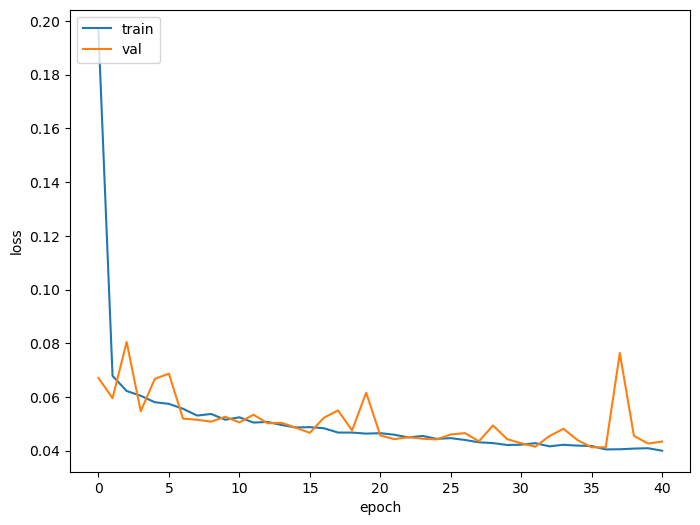

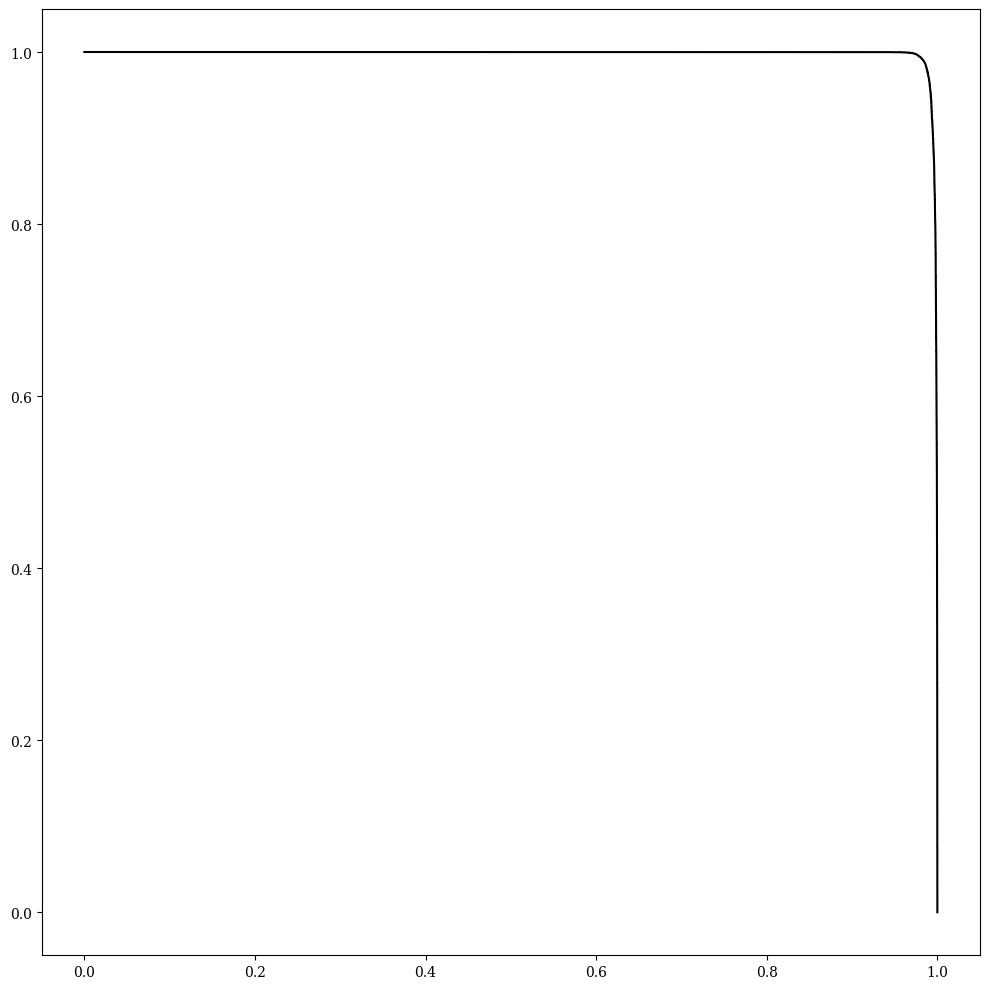

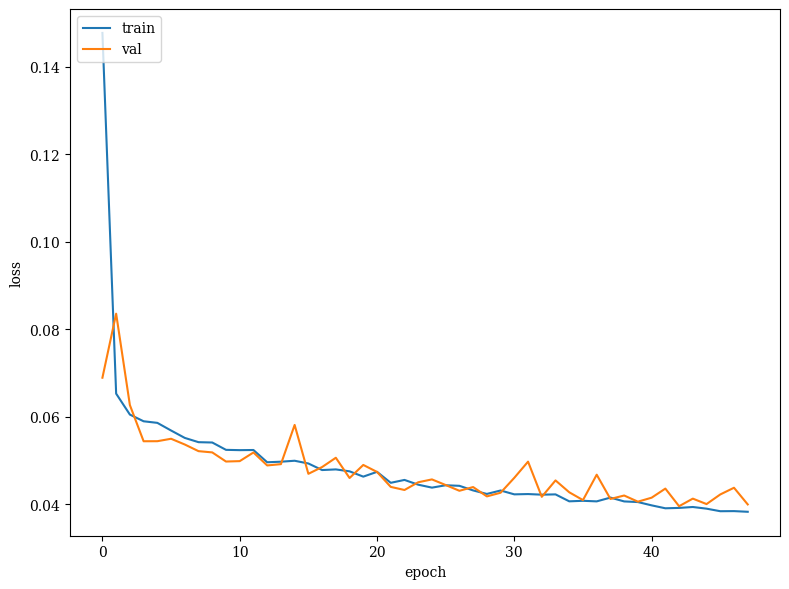

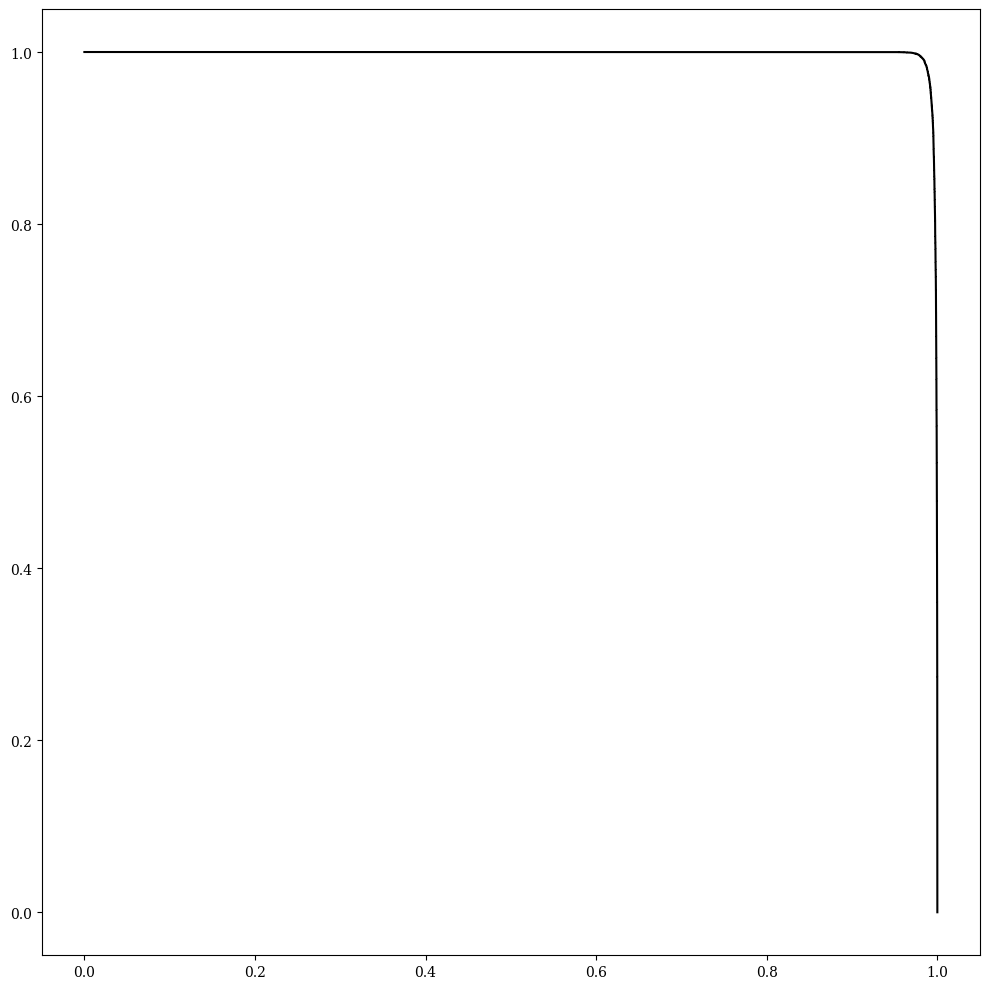

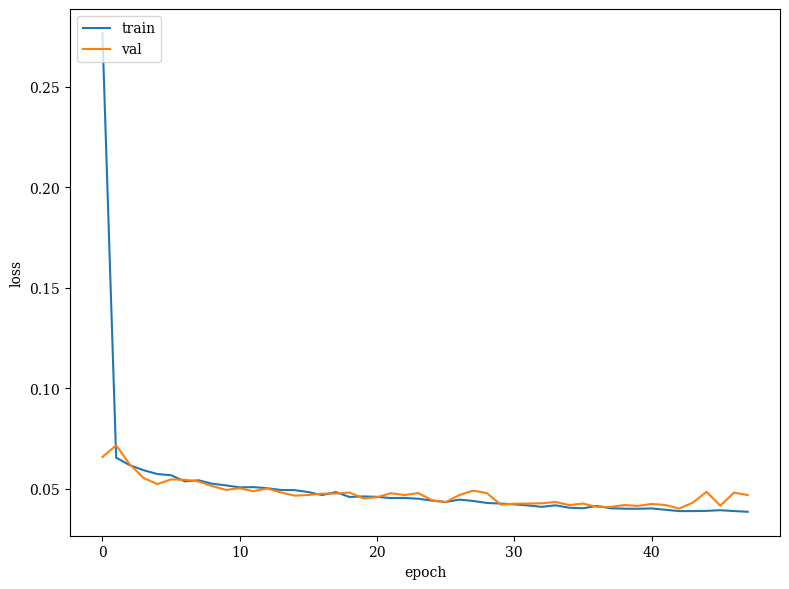

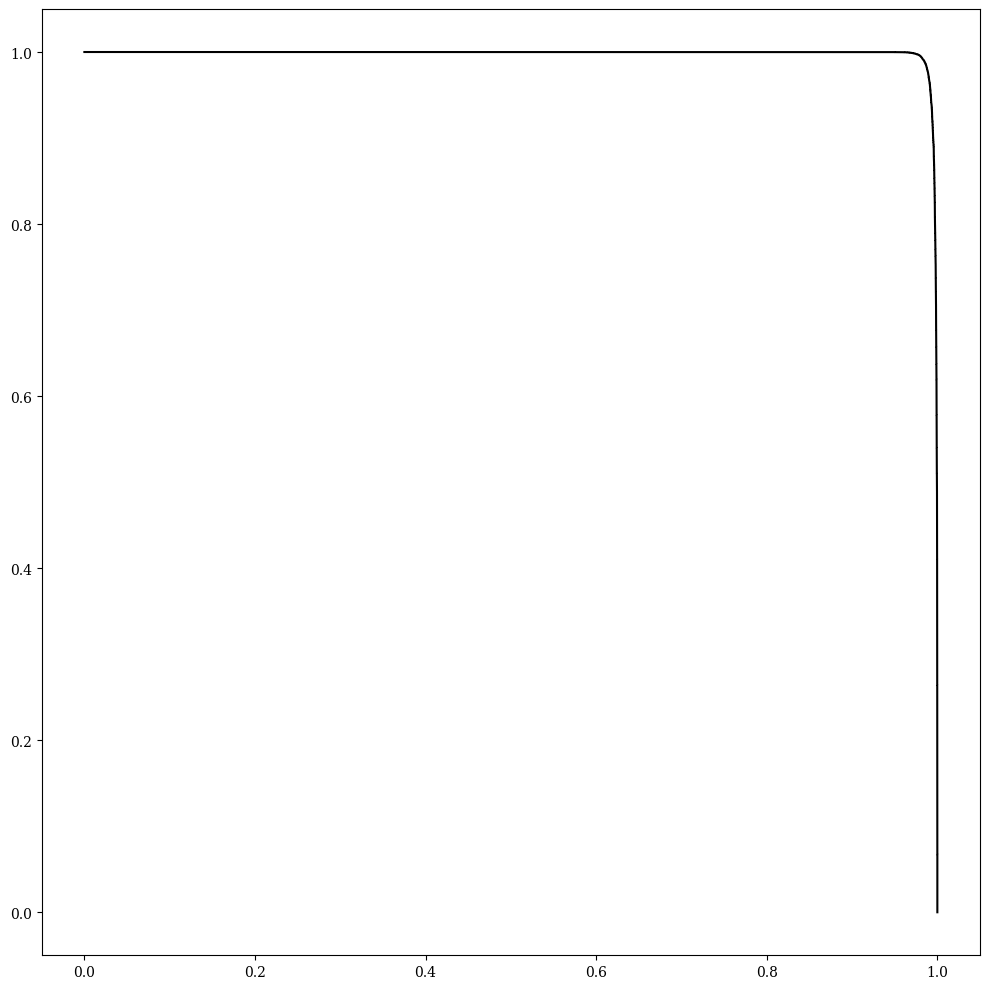

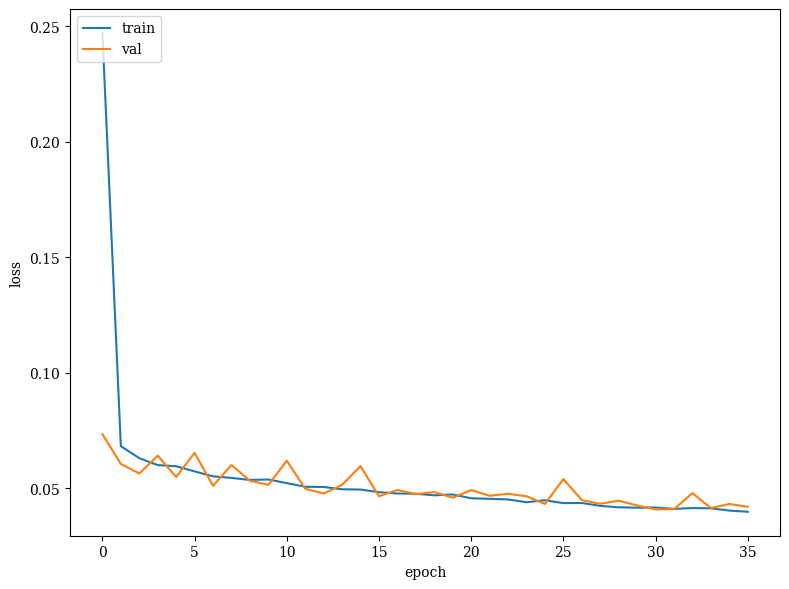

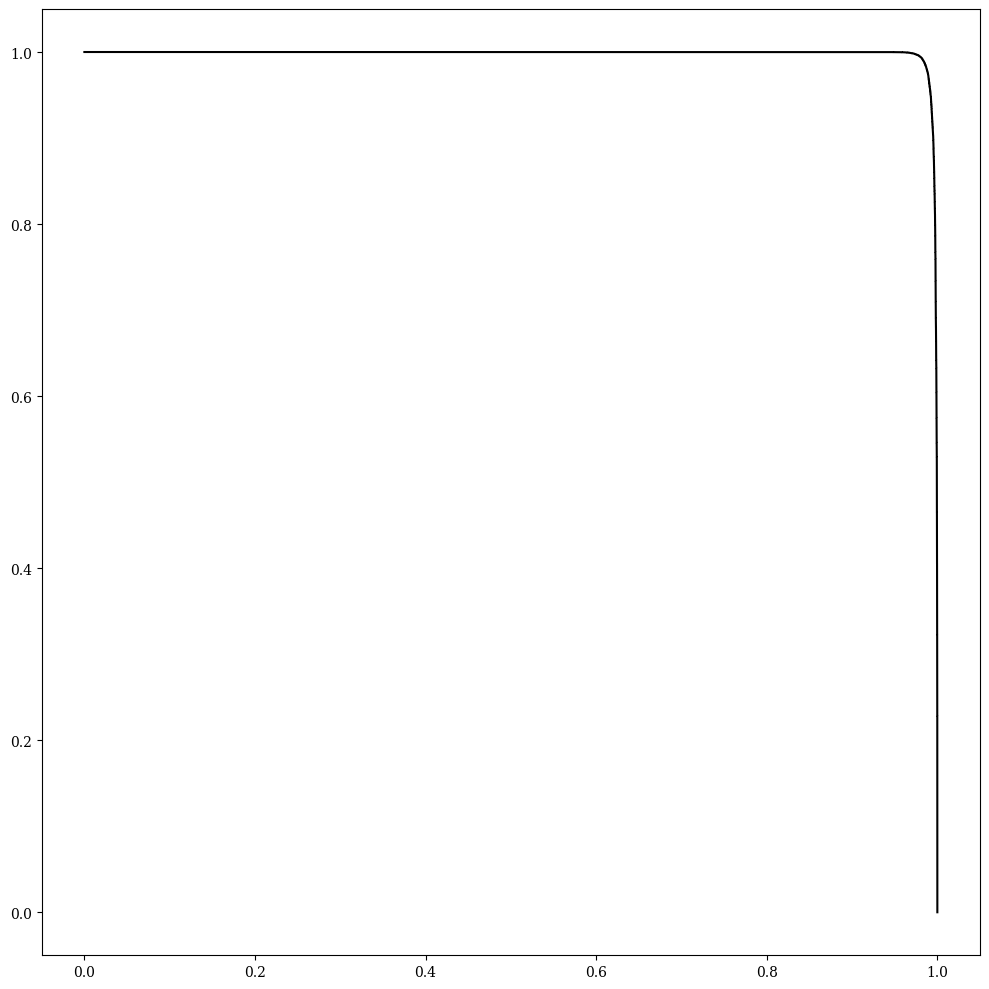

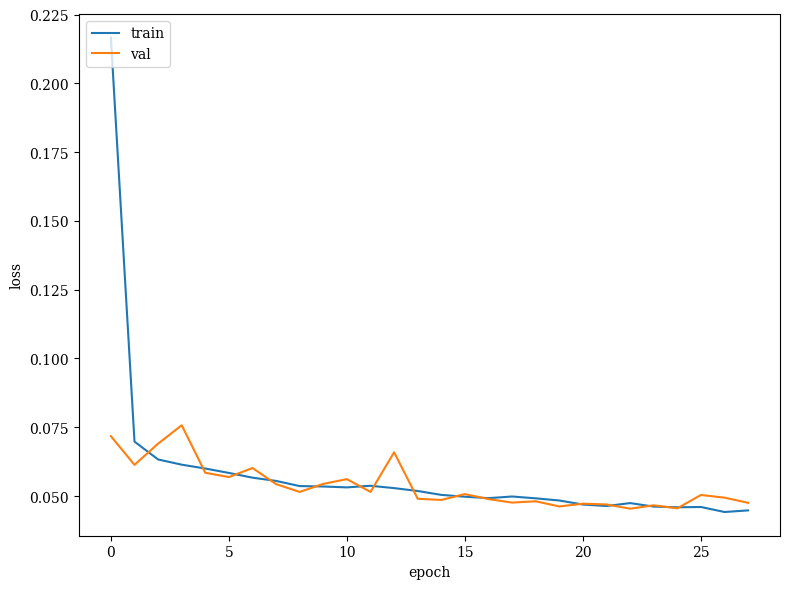

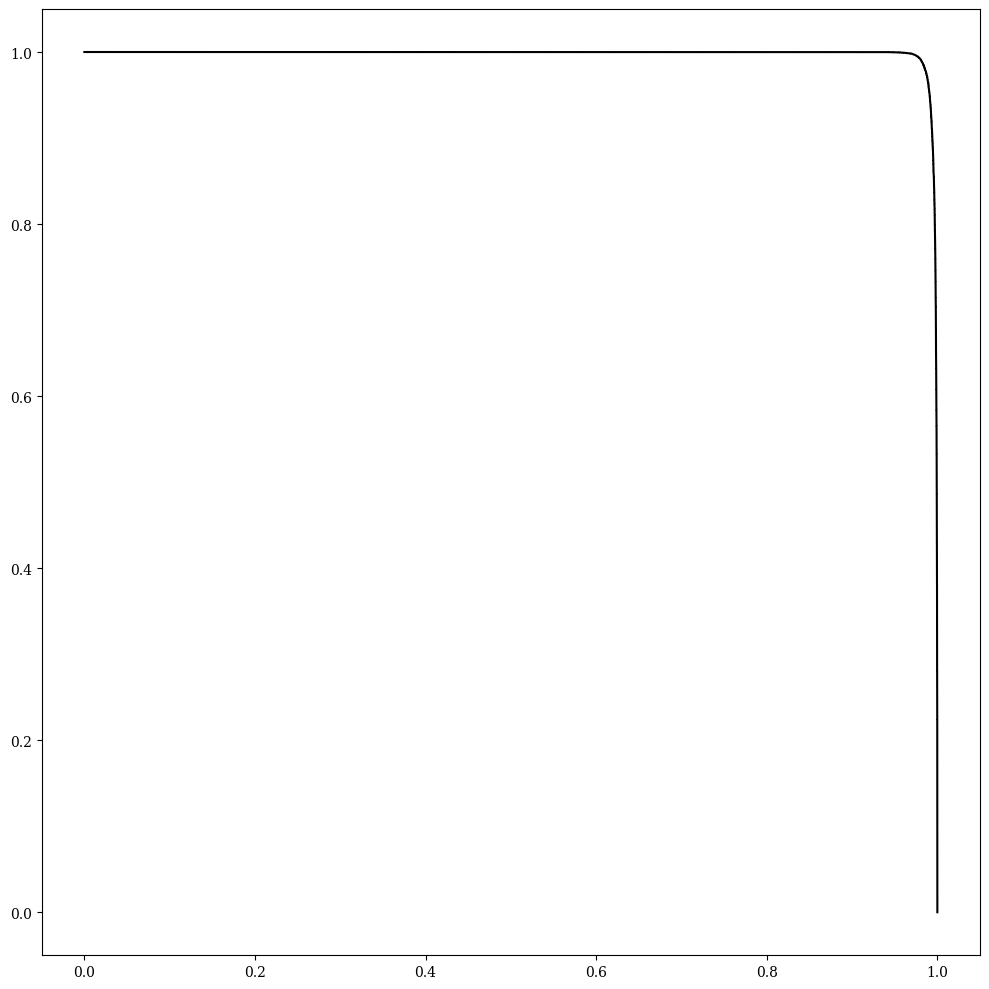

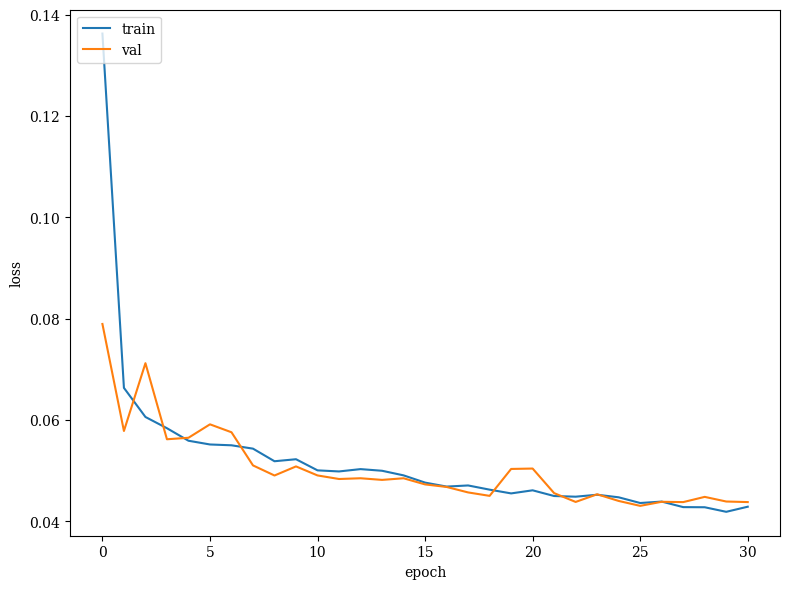

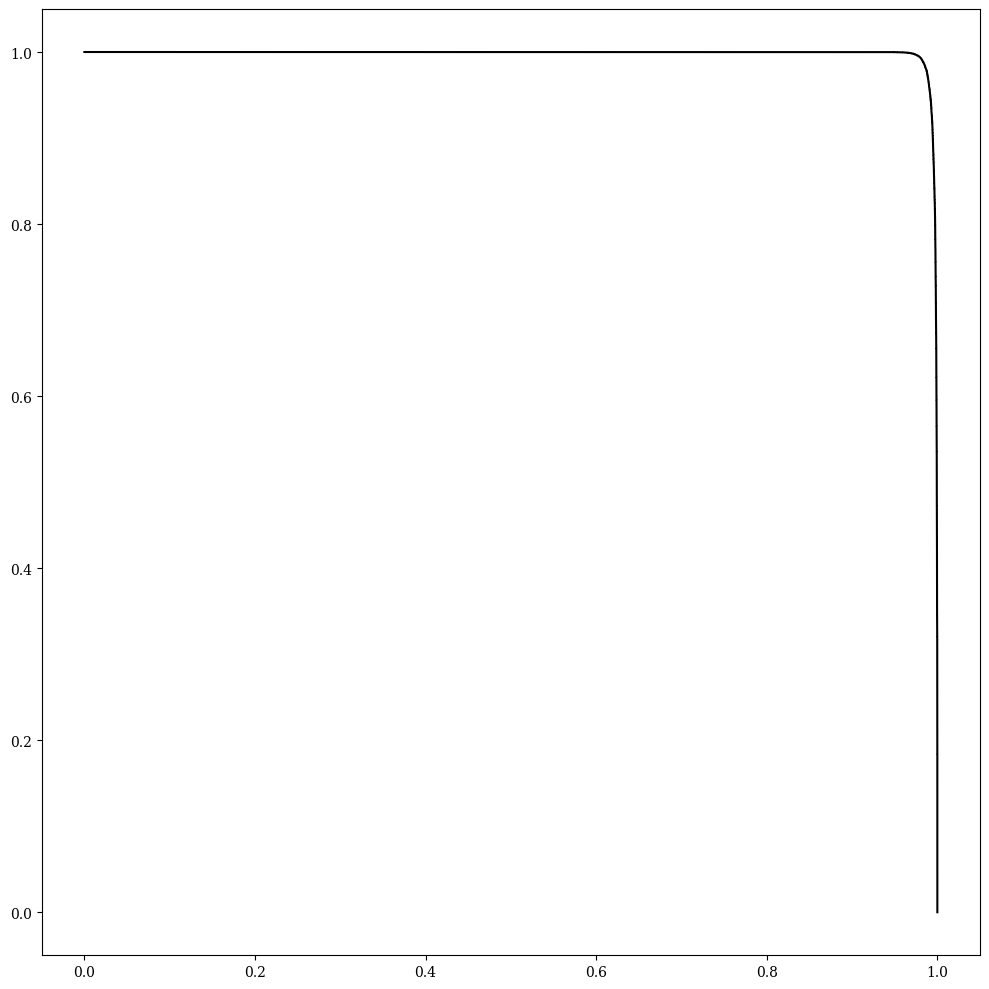

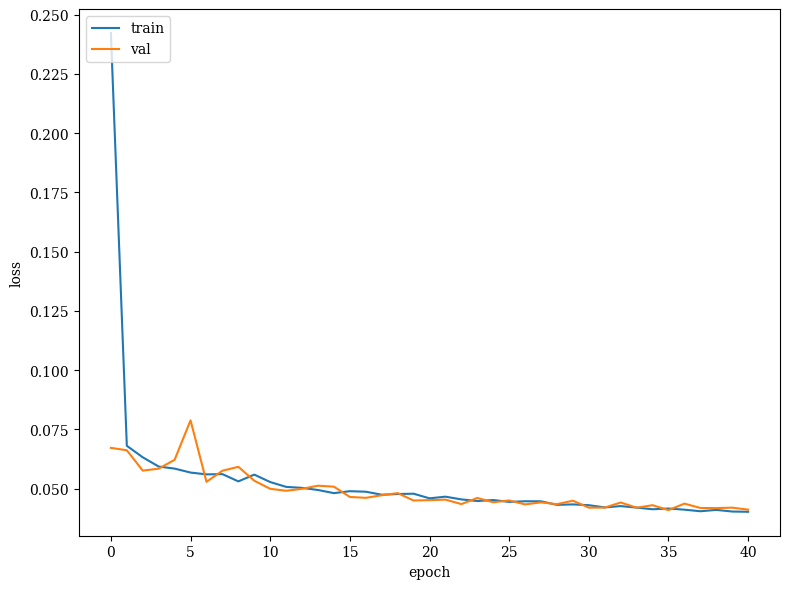

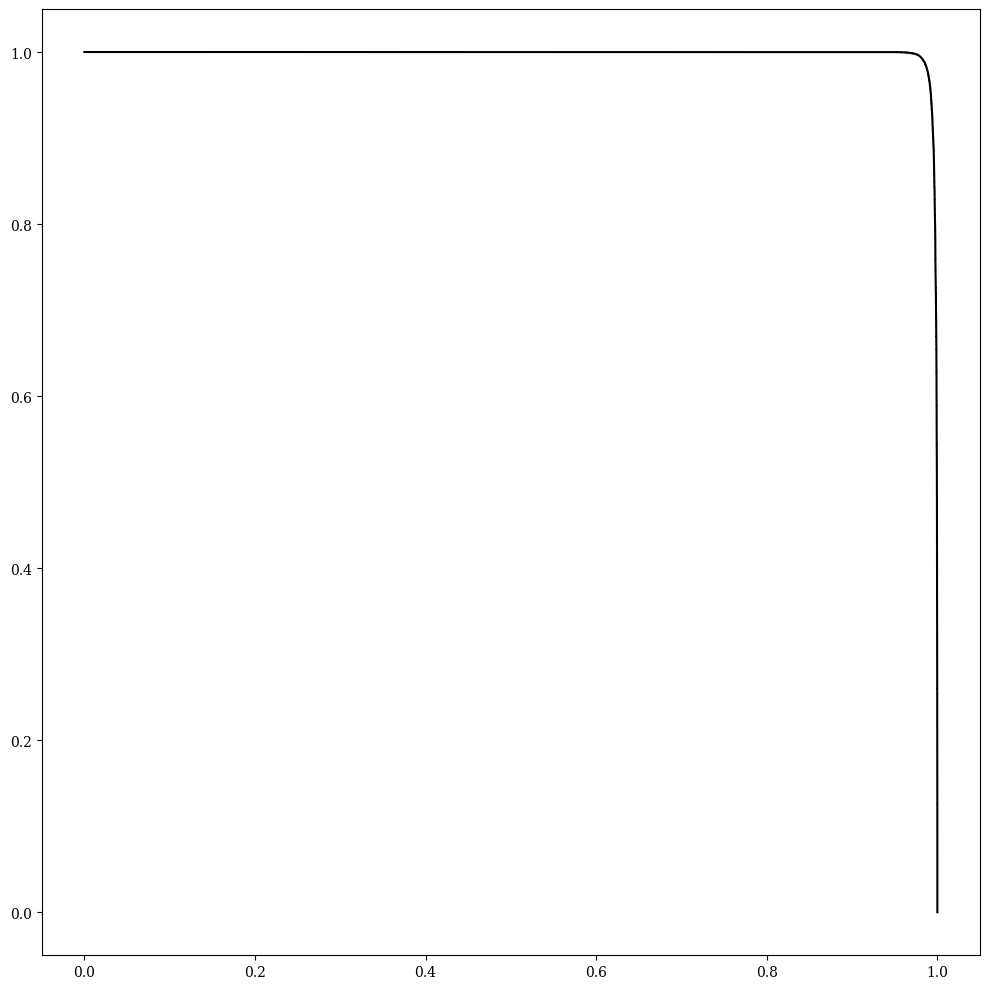

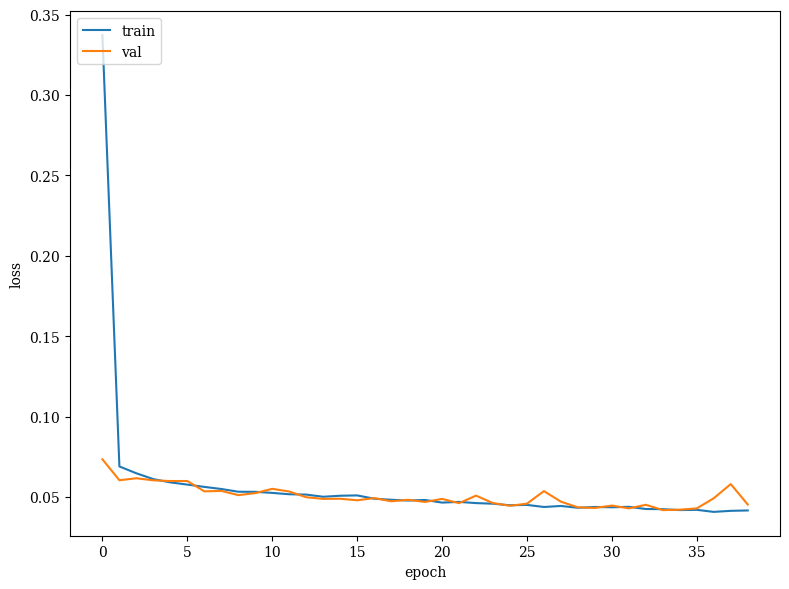

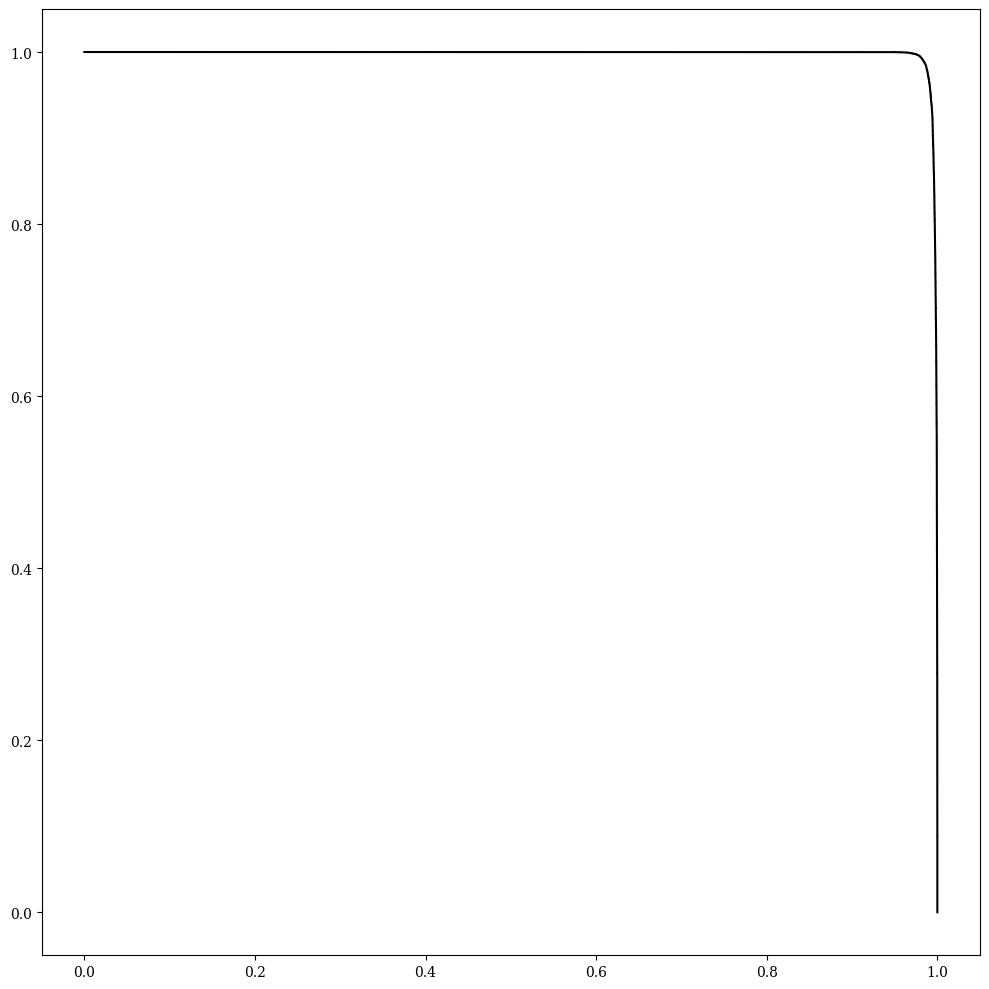

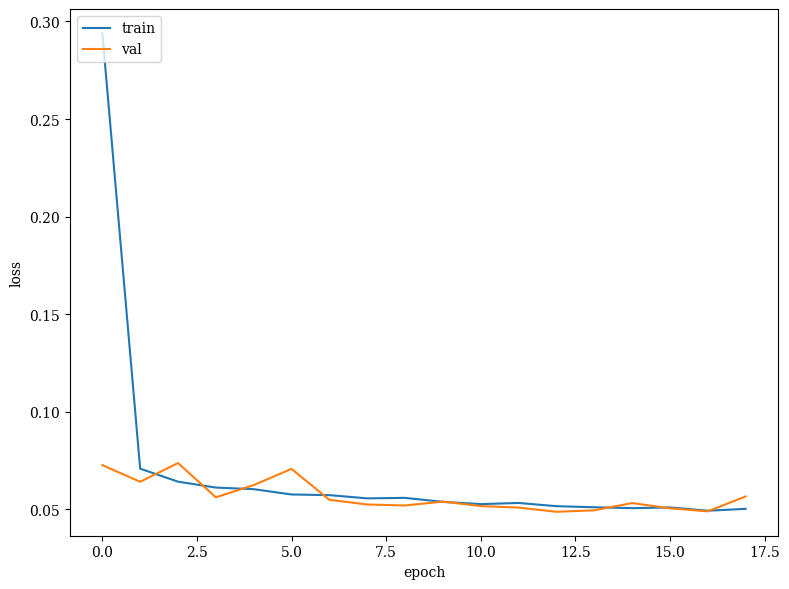

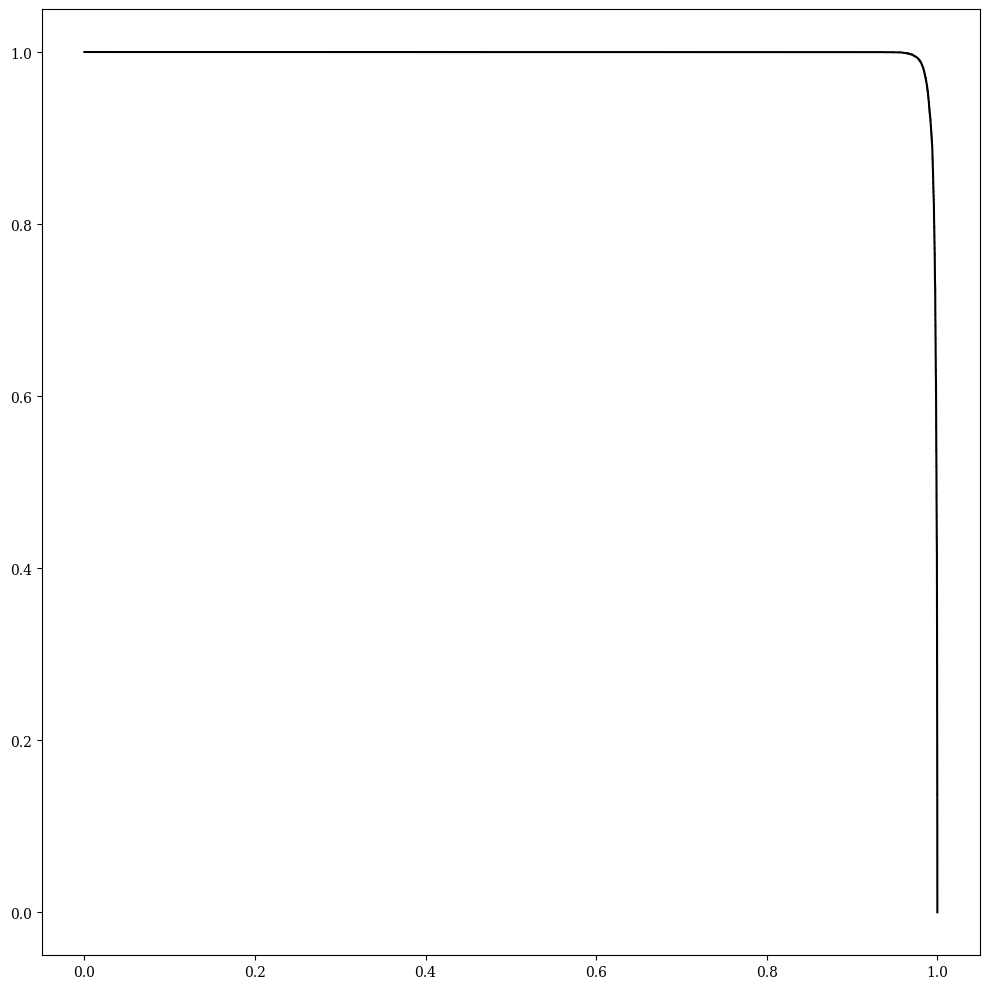

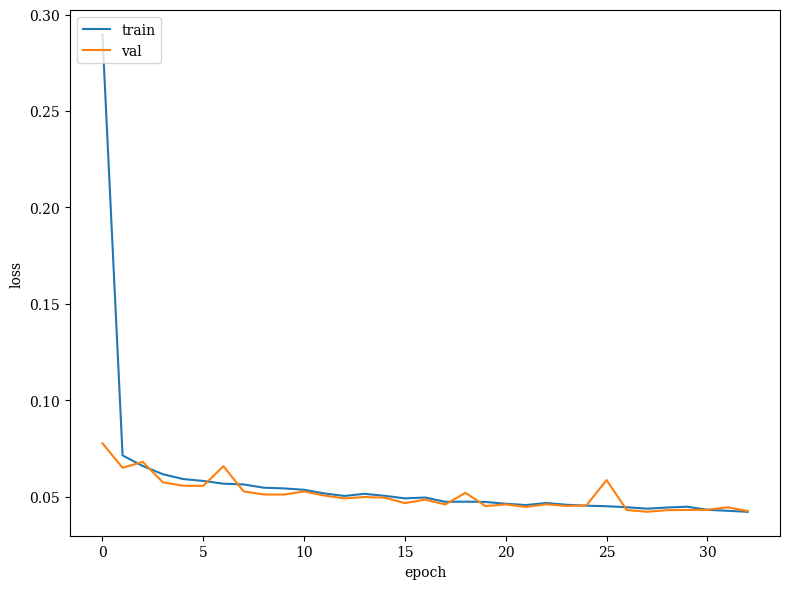

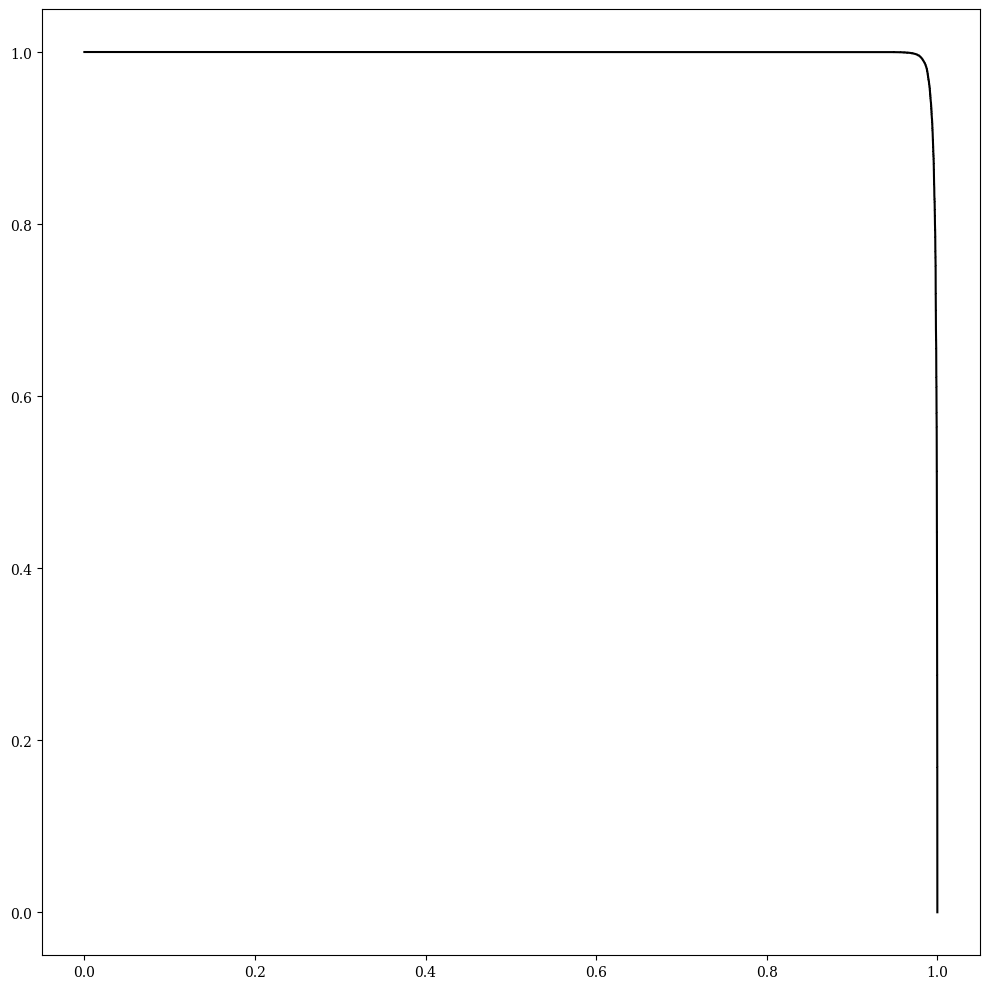

In [4]:
# Regular PFN, no spectral normalization
for i in range(10):
    loss = BinaryCrossentropy(from_logits=False)
    #out_act = keras.activations.linear
    model_kwargs = {"Phi_sizes":(60,60,60), "F_sizes":(80,80,80),
                    "F_dropouts":0.1,
                    "input_dim":3,
                    "output_dim":1,"output_act":"sigmoid",
                    "patience":5,
                    "optimizer":Adam(1e-3),
                    "loss":loss,
                    "summary":True}
    model_kwargs['spectral'] = False
    train_kwargs = {"epochs":100,"verbose":1,"batch_size":512}
    pfn, auc, pfn_fp, efn_tp, threshs = train_pfn((train,train_labels),
                                                  (test,test_labels),
                                                  (val,val_labels),
                                                  model_kwargs,
                                                  train_kwargs,
                                                  plot=True)
    pfn.save(f"keras_models_PFN_wta/gjet_PFN_zpT_iter{i}.keras")
    del pfn
    gc.collect()

2023-09-20 00:14:23.648602: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-20 00:14:24.616543: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-20 00:14:24.616959: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-20 00:14:24.617936: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, None, 3)]    0           []                               
                                                                                                  
 tdist_0 (TimeDistributed)      (None, None, 60)     481         ['input[0][0]']                  
                                                                                                  
 activation (Activation)        (None, None, 60)     0           ['tdist_0[0][0]']                
                                                                                                  
 tdist_1 (TimeDistributed)      (None, None, 60)     7321        ['activation[0][0]']             
                                                                                              

2023-09-20 00:14:29.367407: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


Epoch 1/150
20/20 [==============================] - 6s 171ms/step - loss: 0.6066 - acc: 0.5002 - val_loss: 0.5917 - val_acc: 0.5000
Epoch 2/150
20/20 [==============================] - 3s 143ms/step - loss: 0.5908 - acc: 0.5001 - val_loss: 0.5828 - val_acc: 0.5001
Epoch 3/150
20/20 [==============================] - 3s 149ms/step - loss: 0.5809 - acc: 0.5015 - val_loss: 0.5708 - val_acc: 0.5023
Epoch 4/150
20/20 [==============================] - 3s 144ms/step - loss: 0.5683 - acc: 0.5075 - val_loss: 0.5550 - val_acc: 0.5110
Epoch 5/150
20/20 [==============================] - 3s 142ms/step - loss: 0.5515 - acc: 0.5275 - val_loss: 0.5327 - val_acc: 0.5429
Epoch 6/150
20/20 [==============================] - 3s 142ms/step - loss: 0.5318 - acc: 0.5704 - val_loss: 0.5101 - val_acc: 0.5894
Epoch 7/150
20/20 [==============================] - 3s 141ms/step - loss: 0.5133 - acc: 0.6225 - val_loss: 0.4917 - val_acc: 0.6454
Epoch 8/150
20/20 [==============================] - 3s 143ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/150
20/20 [==============================] - 5s 173ms/step - loss: 0.6545 - acc: 0.4967 - val_loss: 0.6036 - val_acc: 0.5000
Epoch 2/150
20/20 [==============================] - 3s 142ms/step - loss: 0.5961 - acc: 0.5008 - val_loss: 0.5820 - val_acc: 0.5001
Epoch 3/150
20/20 [==============================] - 3s 137ms/step - loss: 0.5813 - acc: 0.5028 - val_loss: 0.5694 - val_acc: 0.5033
Epoch 4/150
20/20 [==============================] - 3s 142ms/step - loss: 0.5694 - acc: 0.5151 - val_loss: 0.5551 - val_acc: 0.5151
Epoch 5/150
20/20 [==============================] - 3s 140ms/step - loss: 0.5550 - acc: 0.5426 - val_loss: 0.5346 - val_acc: 0.5429
Epoch 6/150
20/20 [==============================] - 3s 143ms/step - loss: 0.5373 - acc: 0.5852 - val_loss: 0.5151 - val_acc: 0.5849
Epoch 7/150
20/20 [==============================] - 3s 142ms/step - loss: 0.5196 - acc: 0.6302 - val_loss: 0.4966 - val_acc: 0.6328
Epoch 8/150
20/20 [==============================] - 3s 141ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/150
20/20 [==============================] - 5s 177ms/step - loss: 0.6641 - acc: 0.5067 - val_loss: 0.6207 - val_acc: 0.5000
Epoch 2/150
20/20 [==============================] - 3s 141ms/step - loss: 0.6081 - acc: 0.5002 - val_loss: 0.5894 - val_acc: 0.5000
Epoch 3/150
20/20 [==============================] - 3s 145ms/step - loss: 0.5889 - acc: 0.5005 - val_loss: 0.5784 - val_acc: 0.5008
Epoch 4/150
20/20 [==============================] - 3s 143ms/step - loss: 0.5782 - acc: 0.5052 - val_loss: 0.5662 - val_acc: 0.5074
Epoch 5/150
20/20 [==============================] - 3s 144ms/step - loss: 0.5676 - acc: 0.5196 - val_loss: 0.5519 - val_acc: 0.5238
Epoch 6/150
20/20 [==============================] - 3s 137ms/step - loss: 0.5545 - acc: 0.5459 - val_loss: 0.5366 - val_acc: 0.5525
Epoch 7/150
20/20 [==============================] - 3s 137ms/step - loss: 0.5388 - acc: 0.5847 - val_loss: 0.5174 - val_acc: 0.5972
Epoch 8/150
20/20 [==============================] - 3s 146ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/150
20/20 [==============================] - 5s 174ms/step - loss: 0.6185 - acc: 0.5016 - val_loss: 0.5910 - val_acc: 0.5000
Epoch 2/150
20/20 [==============================] - 3s 150ms/step - loss: 0.5890 - acc: 0.5003 - val_loss: 0.5811 - val_acc: 0.5005
Epoch 3/150
20/20 [==============================] - 3s 151ms/step - loss: 0.5797 - acc: 0.5027 - val_loss: 0.5692 - val_acc: 0.5041
Epoch 4/150
20/20 [==============================] - 3s 146ms/step - loss: 0.5686 - acc: 0.5110 - val_loss: 0.5551 - val_acc: 0.5160
Epoch 5/150
20/20 [==============================] - 3s 143ms/step - loss: 0.5538 - acc: 0.5329 - val_loss: 0.5354 - val_acc: 0.5412
Epoch 6/150
20/20 [==============================] - 3s 143ms/step - loss: 0.5355 - acc: 0.5678 - val_loss: 0.5157 - val_acc: 0.5746
Epoch 7/150
20/20 [==============================] - 3s 145ms/step - loss: 0.5171 - acc: 0.6151 - val_loss: 0.4962 - val_acc: 0.6268
Epoch 8/150
20/20 [==============================] - 3s 140ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/150
20/20 [==============================] - 5s 178ms/step - loss: 0.6399 - acc: 0.4979 - val_loss: 0.6024 - val_acc: 0.5000
Epoch 2/150
20/20 [==============================] - 3s 142ms/step - loss: 0.5971 - acc: 0.5000 - val_loss: 0.5883 - val_acc: 0.5000
Epoch 3/150
20/20 [==============================] - 3s 144ms/step - loss: 0.5861 - acc: 0.5007 - val_loss: 0.5753 - val_acc: 0.5011
Epoch 4/150
20/20 [==============================] - 3s 143ms/step - loss: 0.5742 - acc: 0.5060 - val_loss: 0.5609 - val_acc: 0.5090
Epoch 5/150
20/20 [==============================] - 3s 145ms/step - loss: 0.5596 - acc: 0.5243 - val_loss: 0.5429 - val_acc: 0.5314
Epoch 6/150
20/20 [==============================] - 3s 148ms/step - loss: 0.5431 - acc: 0.5563 - val_loss: 0.5244 - val_acc: 0.5612
Epoch 7/150
20/20 [==============================] - 3s 146ms/step - loss: 0.5257 - acc: 0.6014 - val_loss: 0.5041 - val_acc: 0.6065
Epoch 8/150
20/20 [==============================] - 3s 143ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/150
20/20 [==============================] - 6s 177ms/step - loss: 0.6258 - acc: 0.4979 - val_loss: 0.5938 - val_acc: 0.5000
Epoch 2/150
20/20 [==============================] - 3s 141ms/step - loss: 0.5929 - acc: 0.5001 - val_loss: 0.5844 - val_acc: 0.5000
Epoch 3/150
20/20 [==============================] - 3s 142ms/step - loss: 0.5836 - acc: 0.5006 - val_loss: 0.5754 - val_acc: 0.5012
Epoch 4/150
20/20 [==============================] - 3s 137ms/step - loss: 0.5736 - acc: 0.5043 - val_loss: 0.5627 - val_acc: 0.5065
Epoch 5/150
20/20 [==============================] - 3s 144ms/step - loss: 0.5608 - acc: 0.5173 - val_loss: 0.5460 - val_acc: 0.5237
Epoch 6/150
20/20 [==============================] - 3s 150ms/step - loss: 0.5442 - acc: 0.5484 - val_loss: 0.5246 - val_acc: 0.5628
Epoch 7/150
20/20 [==============================] - 3s 146ms/step - loss: 0.5249 - acc: 0.6035 - val_loss: 0.5026 - val_acc: 0.6154
Epoch 8/150
20/20 [==============================] - 3s 148ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/150
20/20 [==============================] - 8s 166ms/step - loss: 0.6555 - acc: 0.5097 - val_loss: 0.6084 - val_acc: 0.5000
Epoch 2/150
20/20 [==============================] - 3s 151ms/step - loss: 0.5993 - acc: 0.5007 - val_loss: 0.5832 - val_acc: 0.5001
Epoch 3/150
20/20 [==============================] - 3s 142ms/step - loss: 0.5834 - acc: 0.5016 - val_loss: 0.5724 - val_acc: 0.5023
Epoch 4/150
20/20 [==============================] - 3s 143ms/step - loss: 0.5725 - acc: 0.5075 - val_loss: 0.5599 - val_acc: 0.5088
Epoch 5/150
20/20 [==============================] - 3s 152ms/step - loss: 0.5607 - acc: 0.5200 - val_loss: 0.5465 - val_acc: 0.5236
Epoch 6/150
20/20 [==============================] - 3s 137ms/step - loss: 0.5477 - acc: 0.5416 - val_loss: 0.5321 - val_acc: 0.5455
Epoch 7/150
20/20 [==============================] - 3s 139ms/step - loss: 0.5330 - acc: 0.5766 - val_loss: 0.5151 - val_acc: 0.5834
Epoch 8/150
20/20 [==============================] - 3s 143ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/150
20/20 [==============================] - 6s 172ms/step - loss: 0.6801 - acc: 0.5102 - val_loss: 0.6244 - val_acc: 0.5000
Epoch 2/150
20/20 [==============================] - 3s 140ms/step - loss: 0.6125 - acc: 0.5019 - val_loss: 0.5887 - val_acc: 0.5002
Epoch 3/150
20/20 [==============================] - 3s 153ms/step - loss: 0.5894 - acc: 0.5014 - val_loss: 0.5788 - val_acc: 0.5009
Epoch 4/150
20/20 [==============================] - 3s 146ms/step - loss: 0.5802 - acc: 0.5048 - val_loss: 0.5686 - val_acc: 0.5048
Epoch 5/150
20/20 [==============================] - 3s 148ms/step - loss: 0.5700 - acc: 0.5158 - val_loss: 0.5570 - val_acc: 0.5135
Epoch 6/150
20/20 [==============================] - 3s 141ms/step - loss: 0.5587 - acc: 0.5336 - val_loss: 0.5430 - val_acc: 0.5314
Epoch 7/150
20/20 [==============================] - 3s 147ms/step - loss: 0.5451 - acc: 0.5620 - val_loss: 0.5265 - val_acc: 0.5546
Epoch 8/150
20/20 [==============================] - 3s 141ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/150
20/20 [==============================] - 5s 171ms/step - loss: 0.6245 - acc: 0.5005 - val_loss: 0.5905 - val_acc: 0.5000
Epoch 2/150
20/20 [==============================] - 3s 152ms/step - loss: 0.5874 - acc: 0.5005 - val_loss: 0.5788 - val_acc: 0.5007
Epoch 3/150
20/20 [==============================] - 3s 143ms/step - loss: 0.5784 - acc: 0.5029 - val_loss: 0.5678 - val_acc: 0.5046
Epoch 4/150
20/20 [==============================] - 3s 147ms/step - loss: 0.5667 - acc: 0.5109 - val_loss: 0.5524 - val_acc: 0.5139
Epoch 5/150
20/20 [==============================] - 3s 147ms/step - loss: 0.5527 - acc: 0.5244 - val_loss: 0.5368 - val_acc: 0.5298
Epoch 6/150
20/20 [==============================] - 3s 142ms/step - loss: 0.5383 - acc: 0.5488 - val_loss: 0.5209 - val_acc: 0.5581
Epoch 7/150
20/20 [==============================] - 3s 151ms/step - loss: 0.5237 - acc: 0.5842 - val_loss: 0.5041 - val_acc: 0.5982
Epoch 8/150
20/20 [==============================] - 3s 148ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/150
20/20 [==============================] - 5s 175ms/step - loss: 0.7549 - acc: 0.4889 - val_loss: 0.6619 - val_acc: 0.5003
Epoch 2/150
20/20 [==============================] - 3s 146ms/step - loss: 0.6354 - acc: 0.4984 - val_loss: 0.6020 - val_acc: 0.5000
Epoch 3/150
20/20 [==============================] - 3s 143ms/step - loss: 0.5997 - acc: 0.5001 - val_loss: 0.5856 - val_acc: 0.5000
Epoch 4/150
20/20 [==============================] - 3s 144ms/step - loss: 0.5874 - acc: 0.5010 - val_loss: 0.5776 - val_acc: 0.5012
Epoch 5/150
20/20 [==============================] - 3s 144ms/step - loss: 0.5792 - acc: 0.5065 - val_loss: 0.5667 - val_acc: 0.5061
Epoch 6/150
20/20 [==============================] - 3s 147ms/step - loss: 0.5696 - acc: 0.5188 - val_loss: 0.5560 - val_acc: 0.5173
Epoch 7/150
20/20 [==============================] - 3s 141ms/step - loss: 0.5584 - acc: 0.5442 - val_loss: 0.5396 - val_acc: 0.5393
Epoch 8/150
20/20 [==============================] - 3s 153ms/step - 

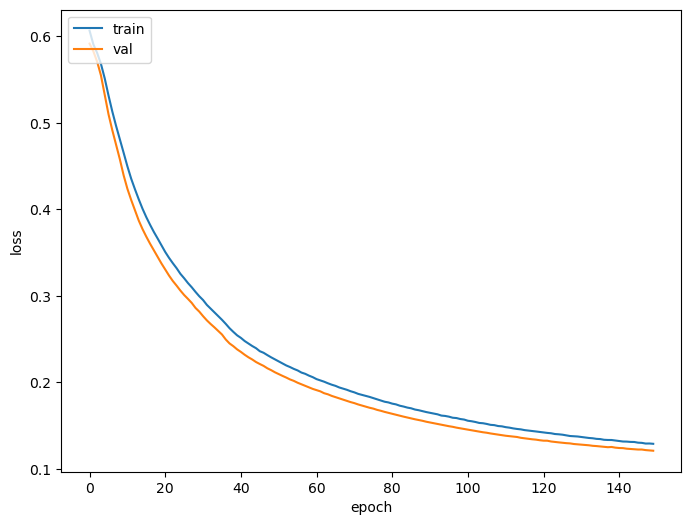

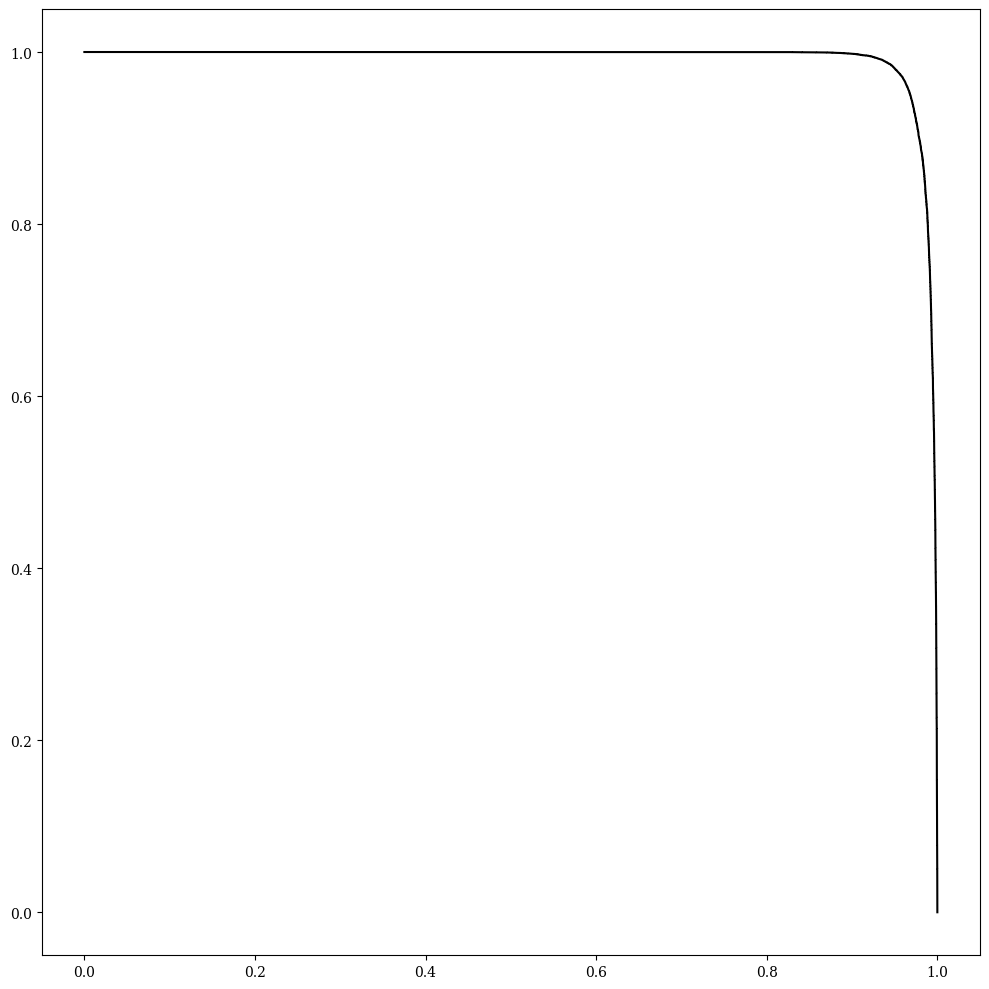

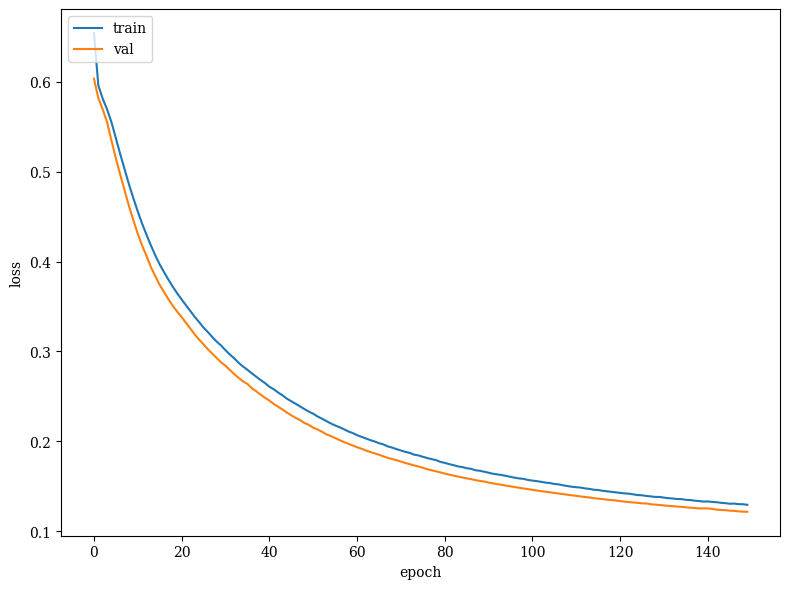

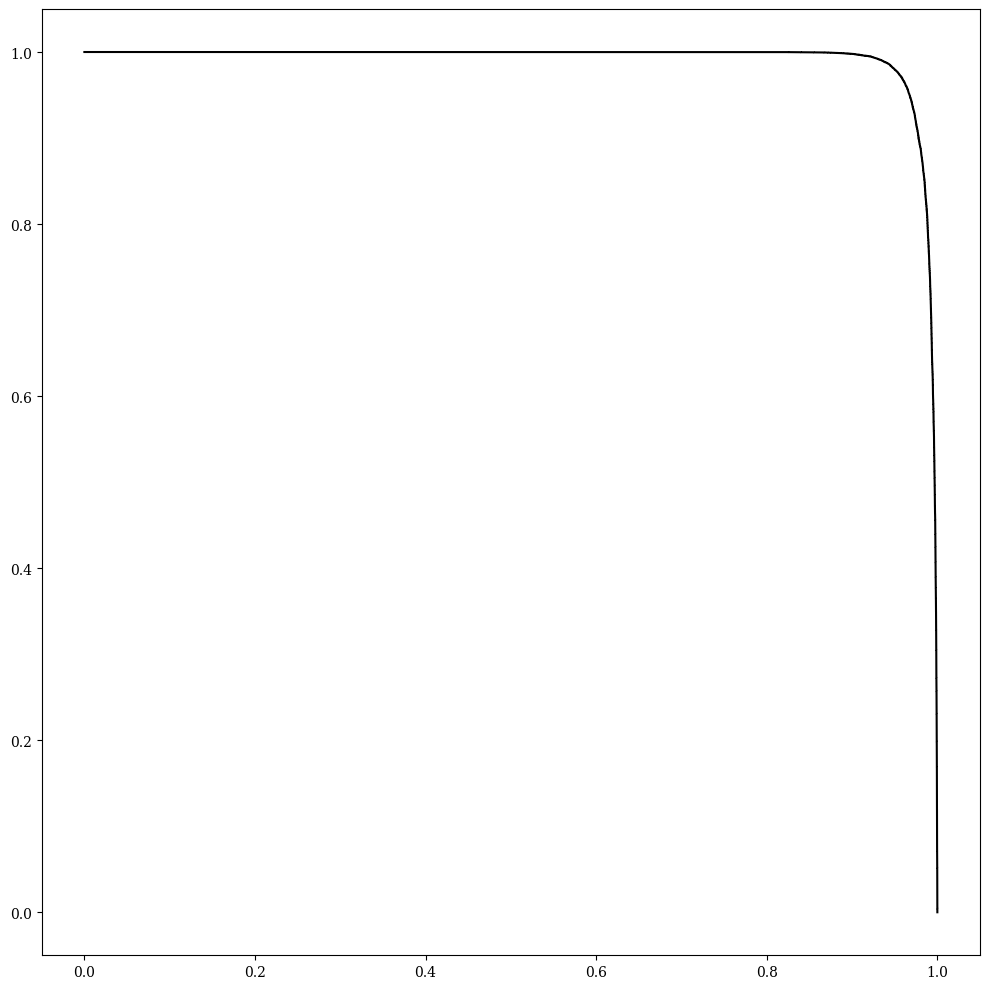

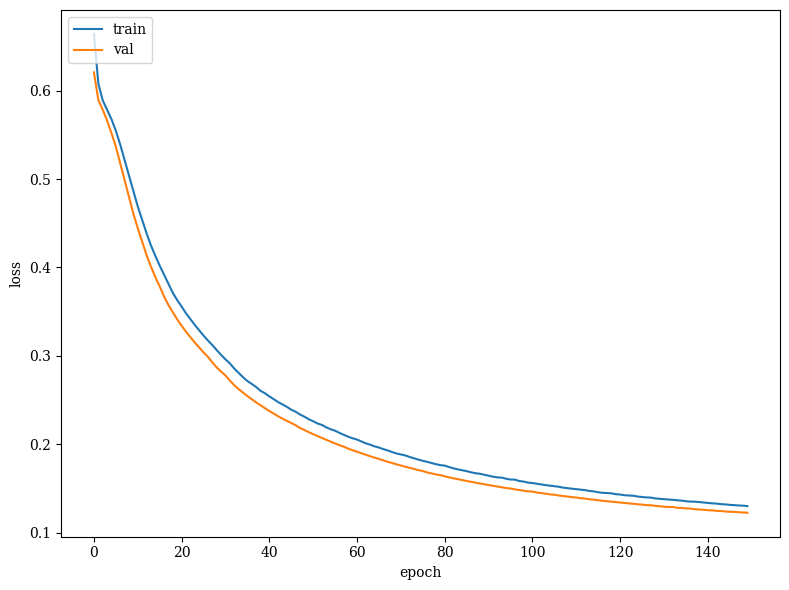

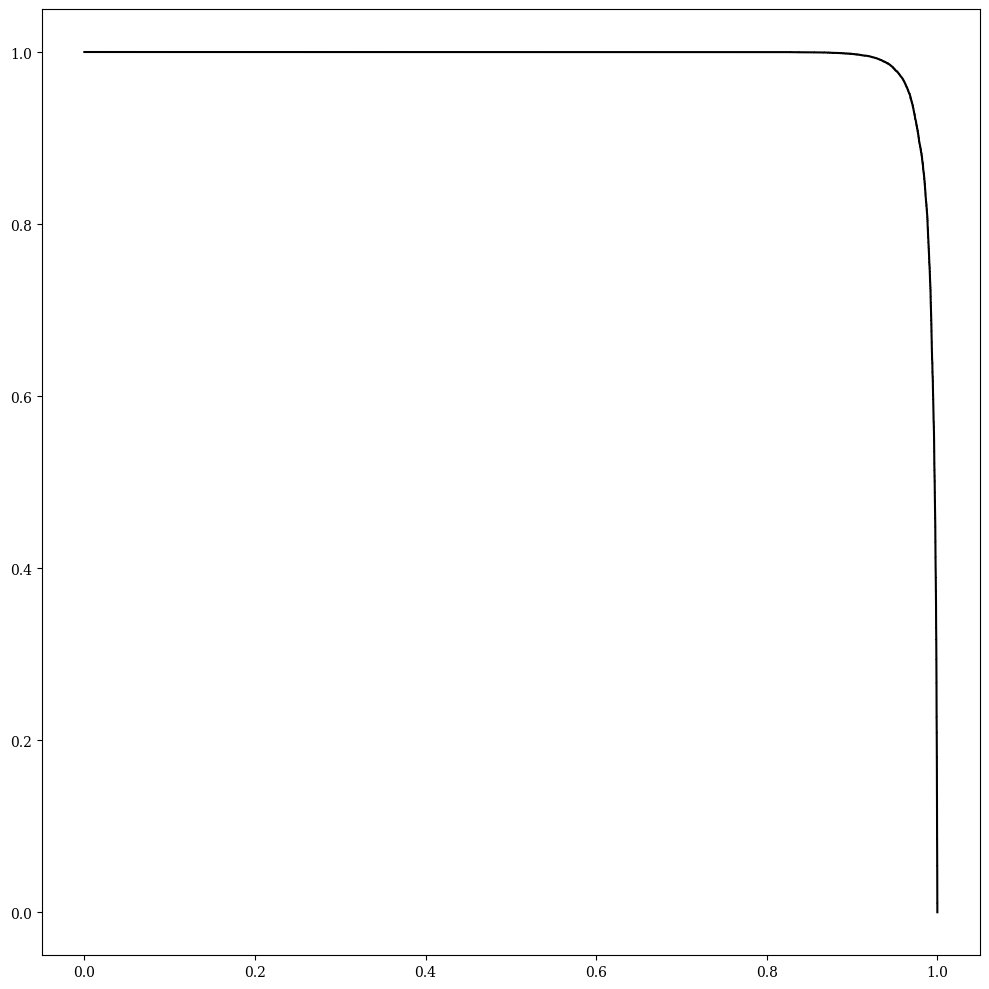

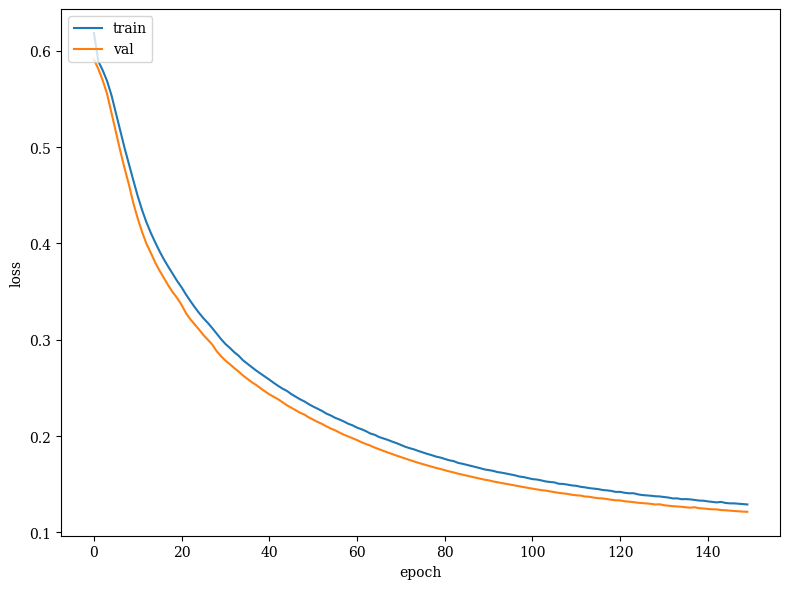

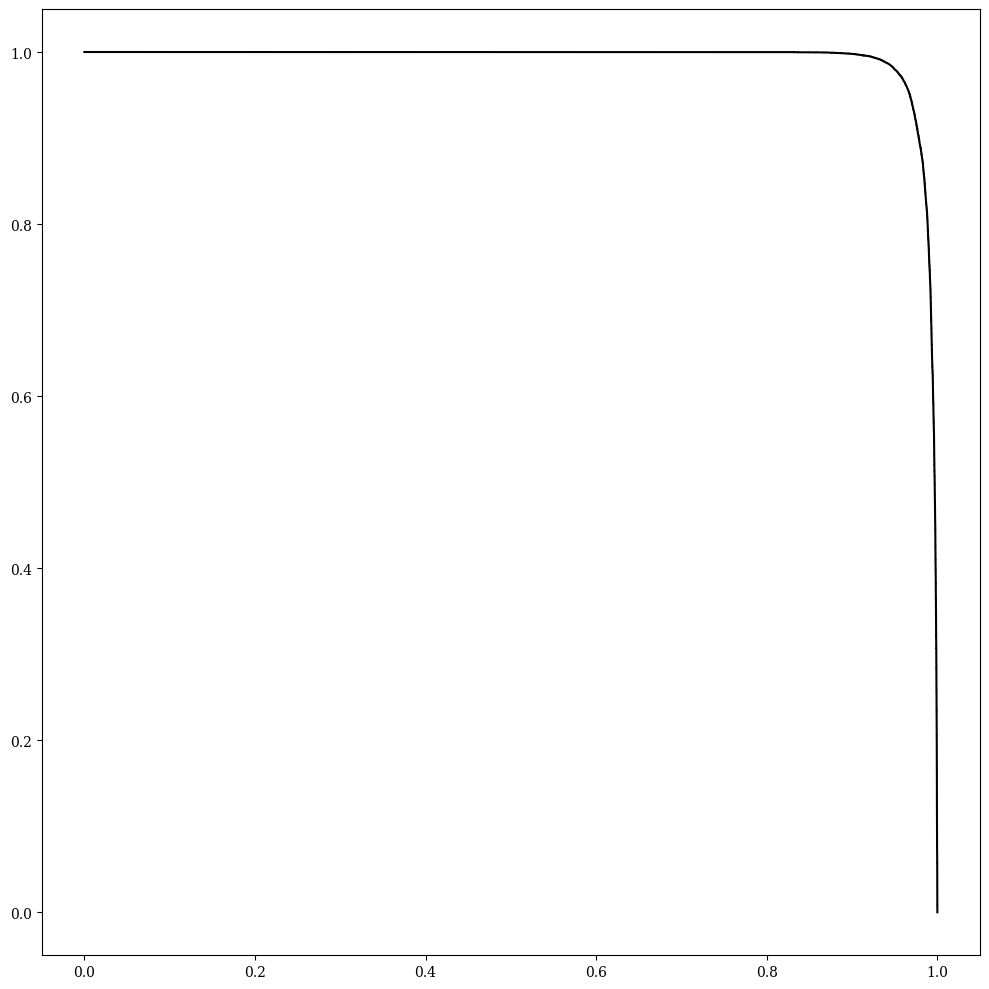

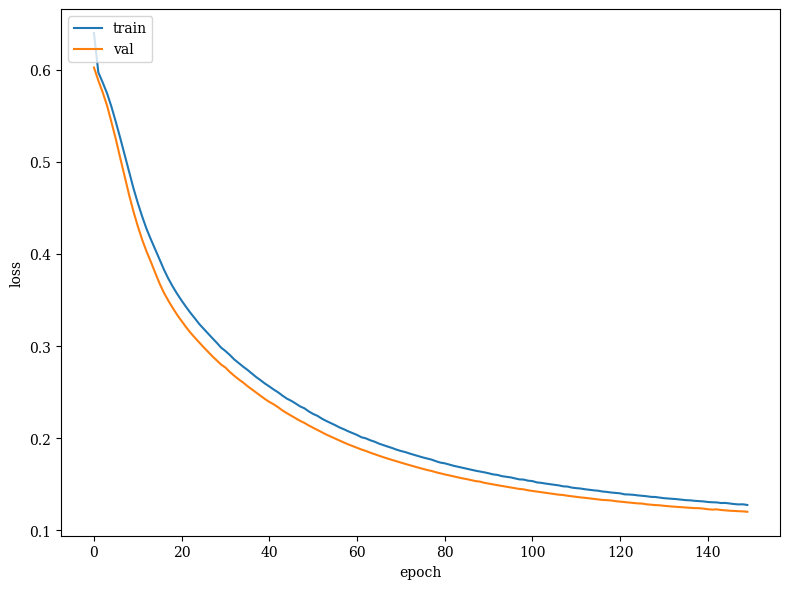

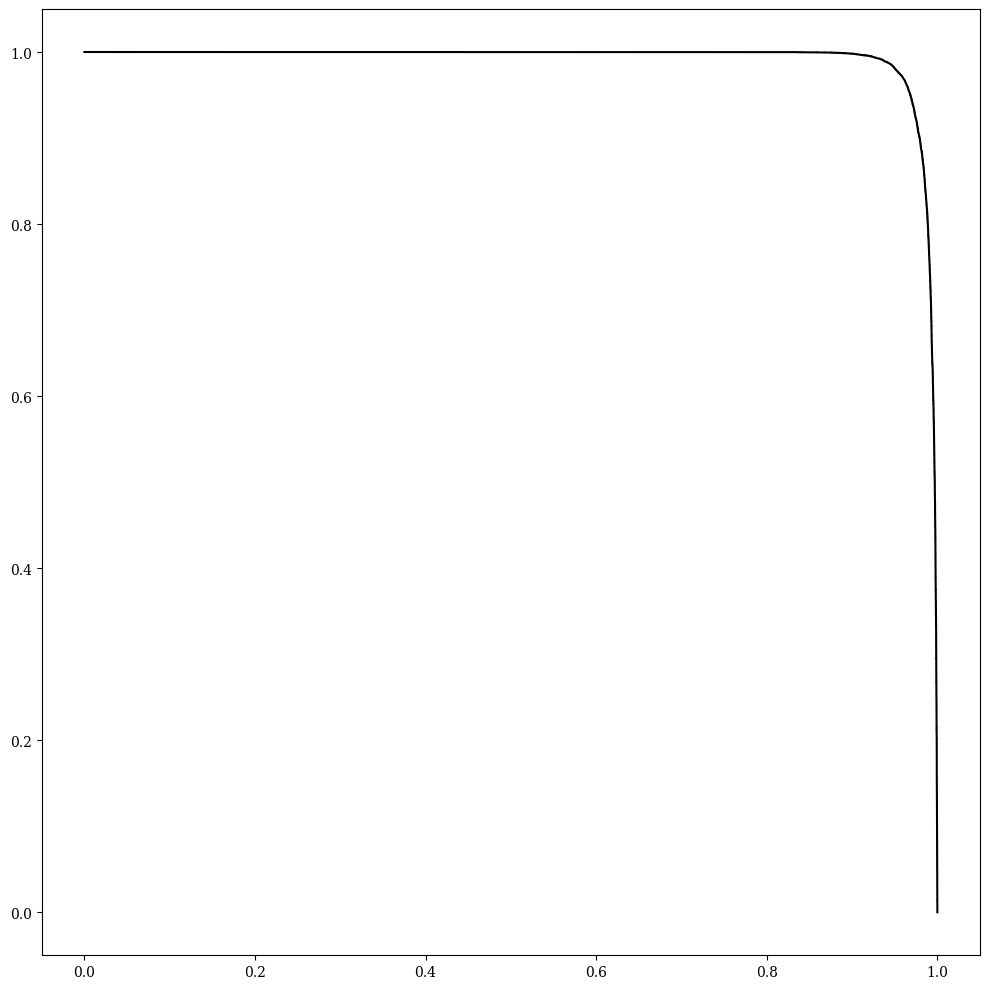

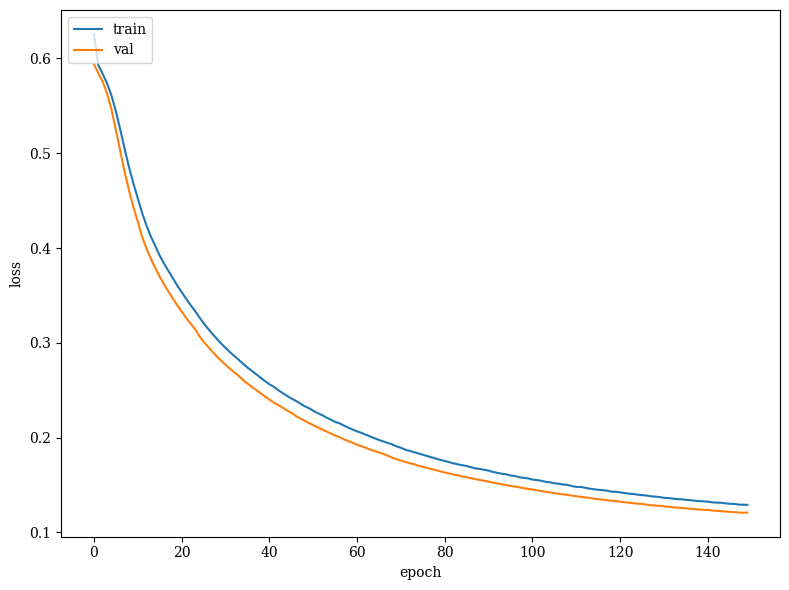

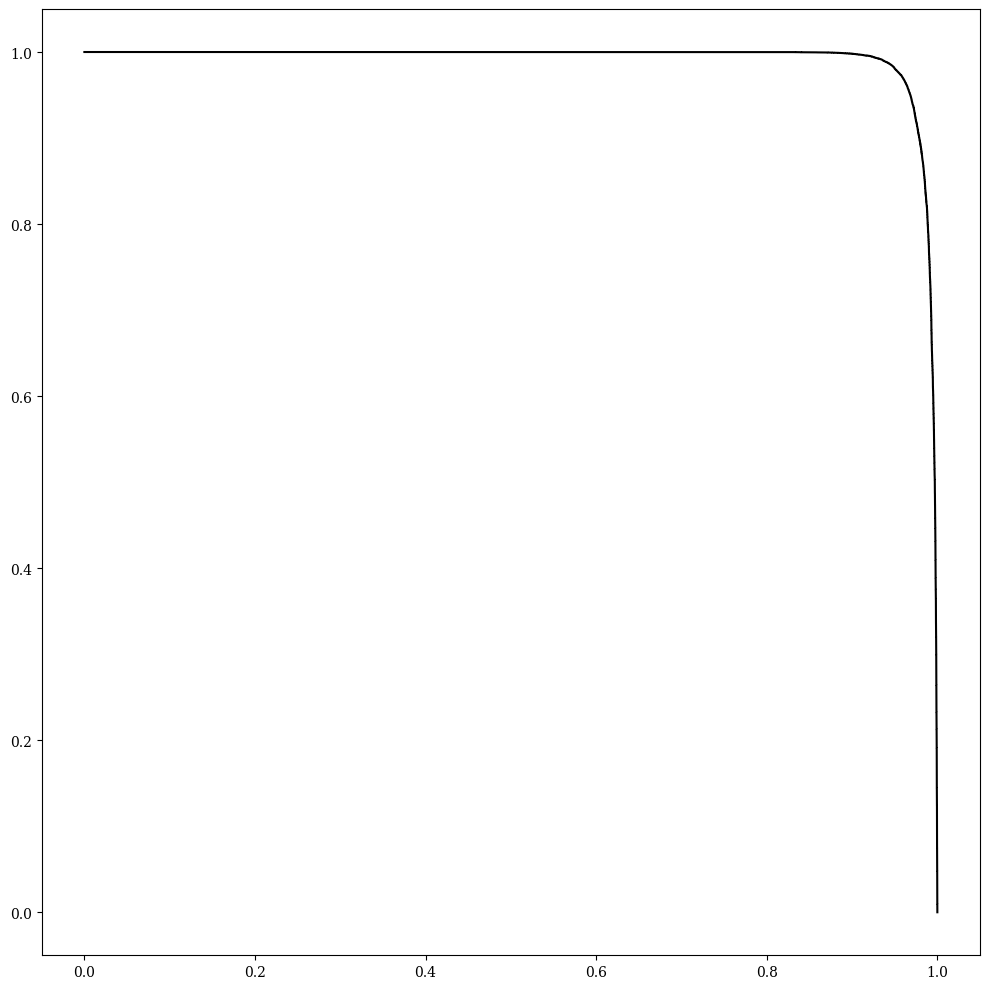

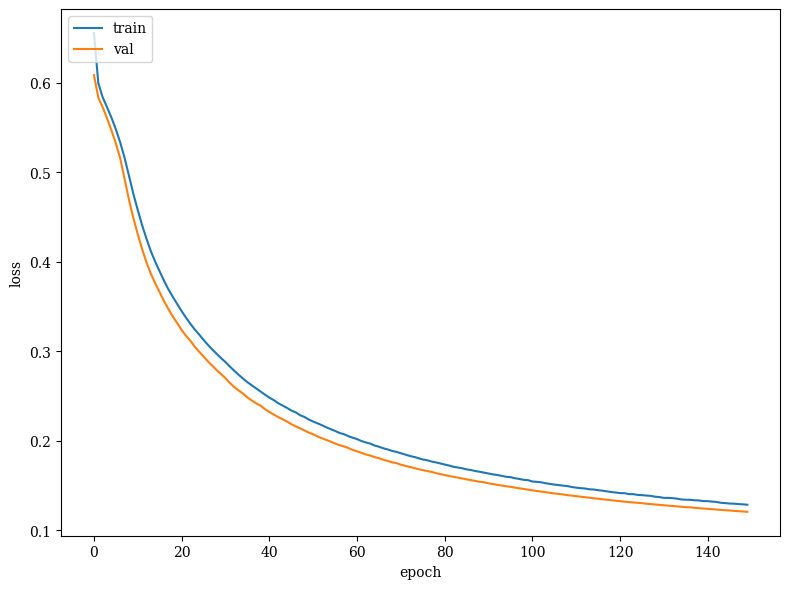

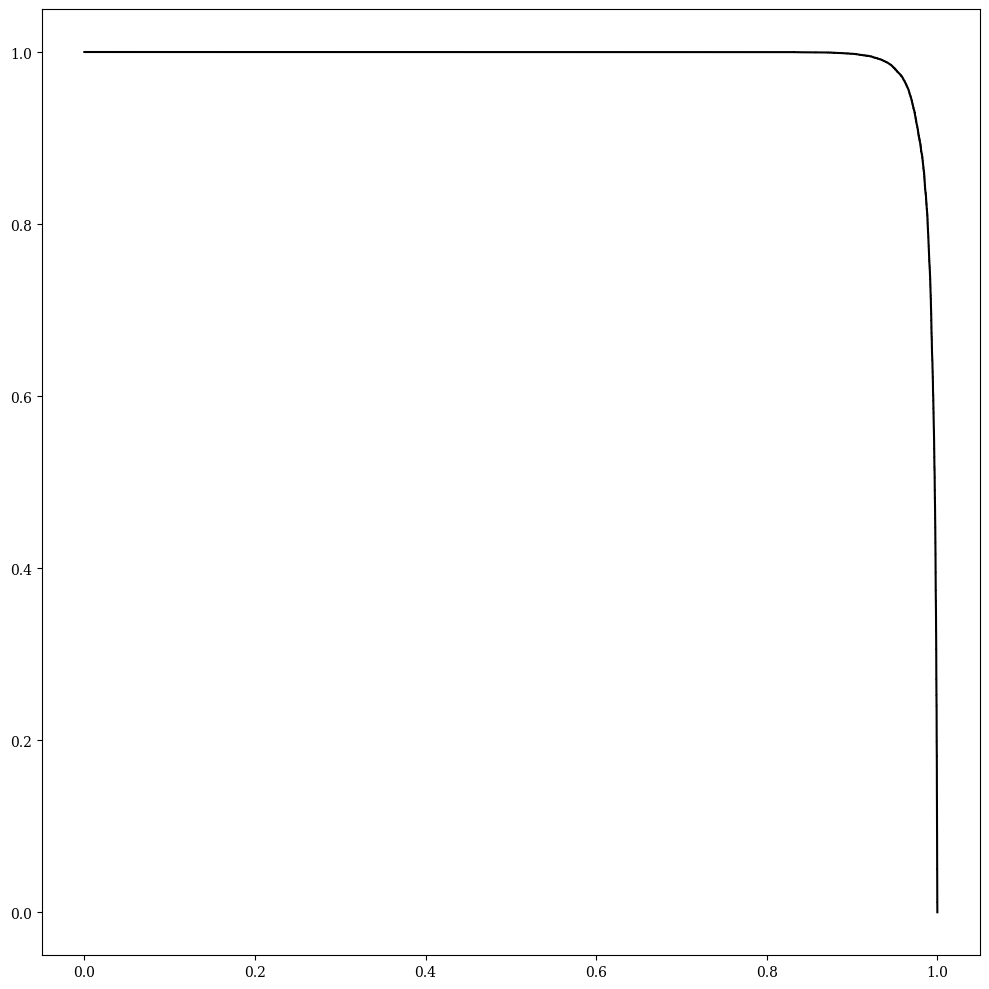

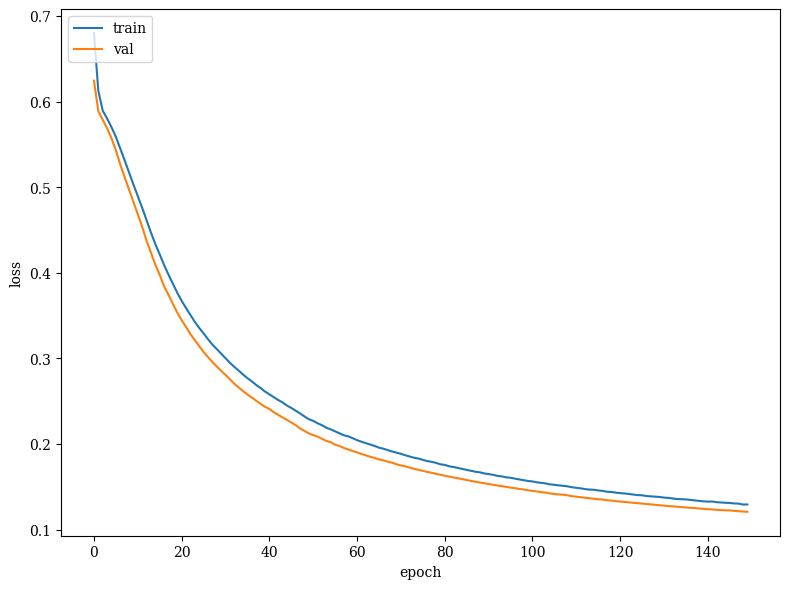

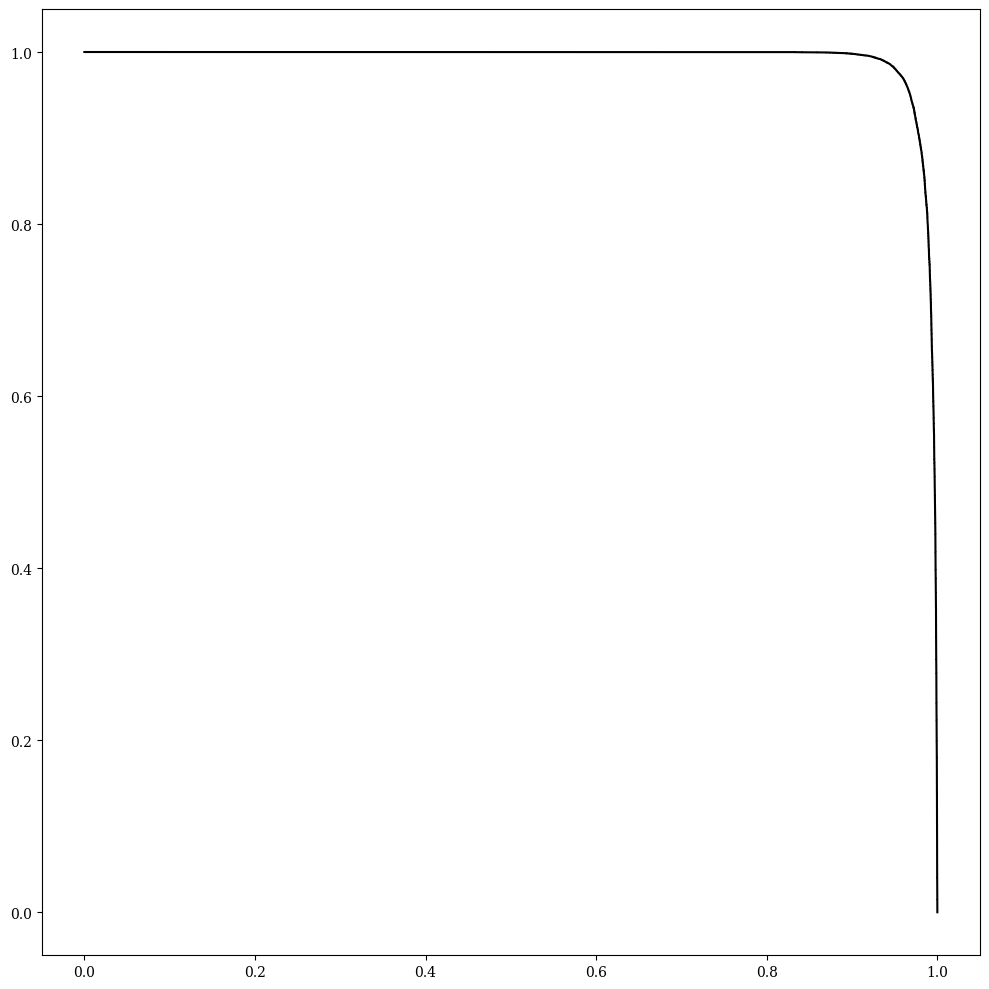

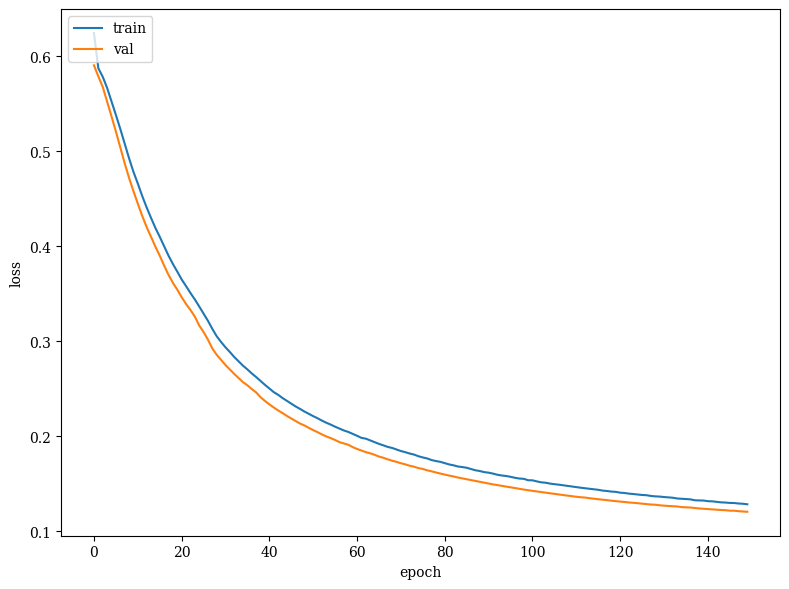

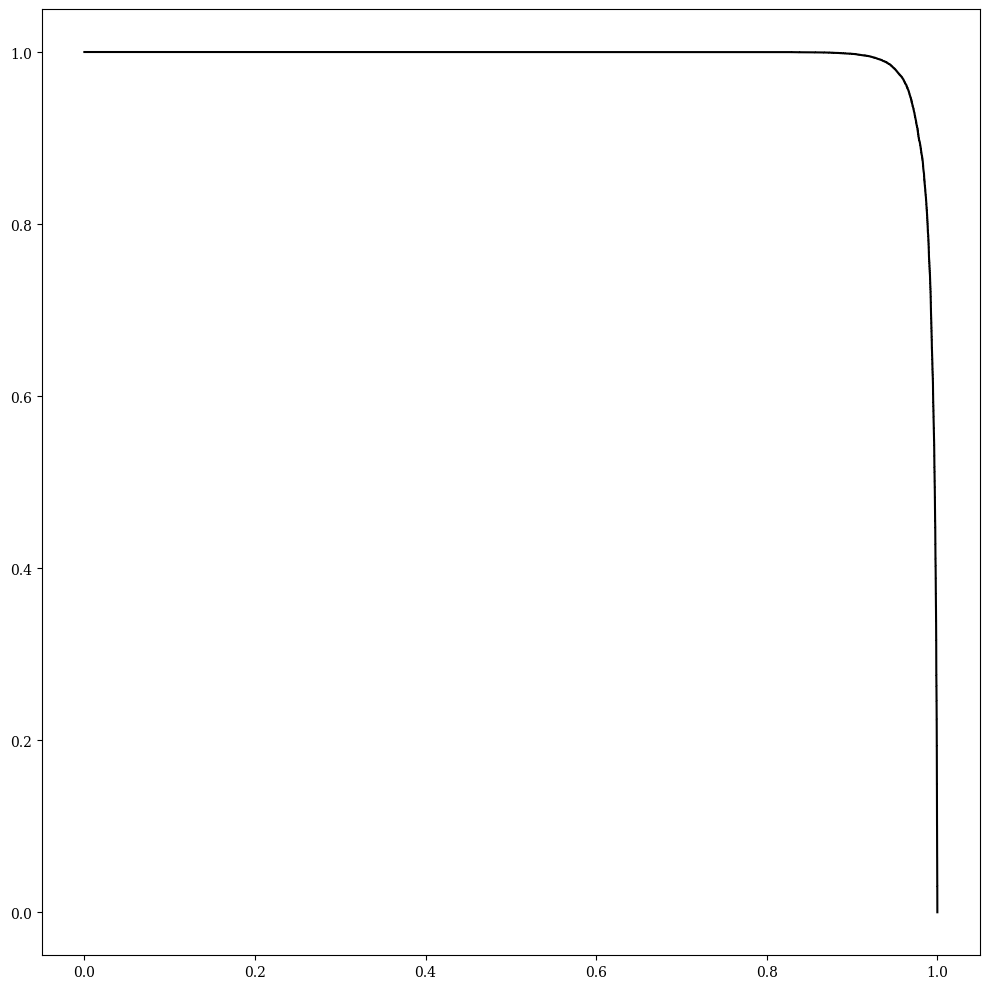

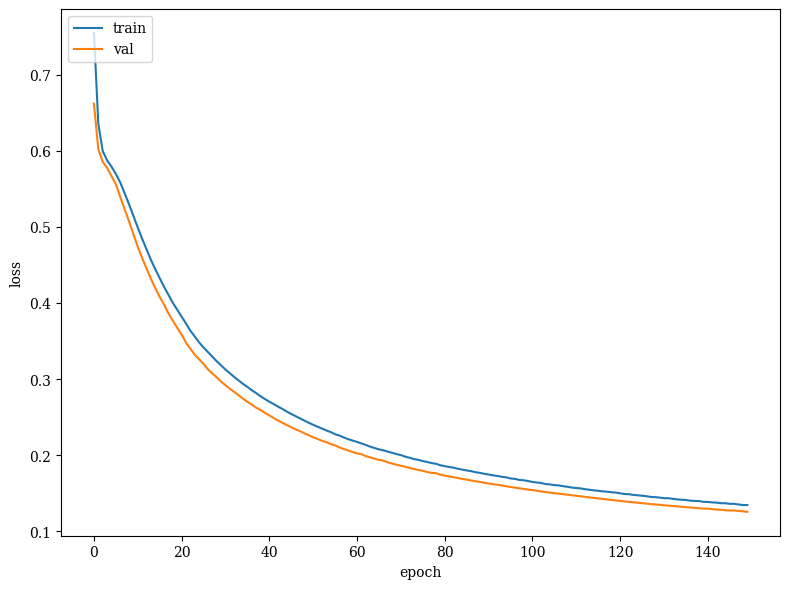

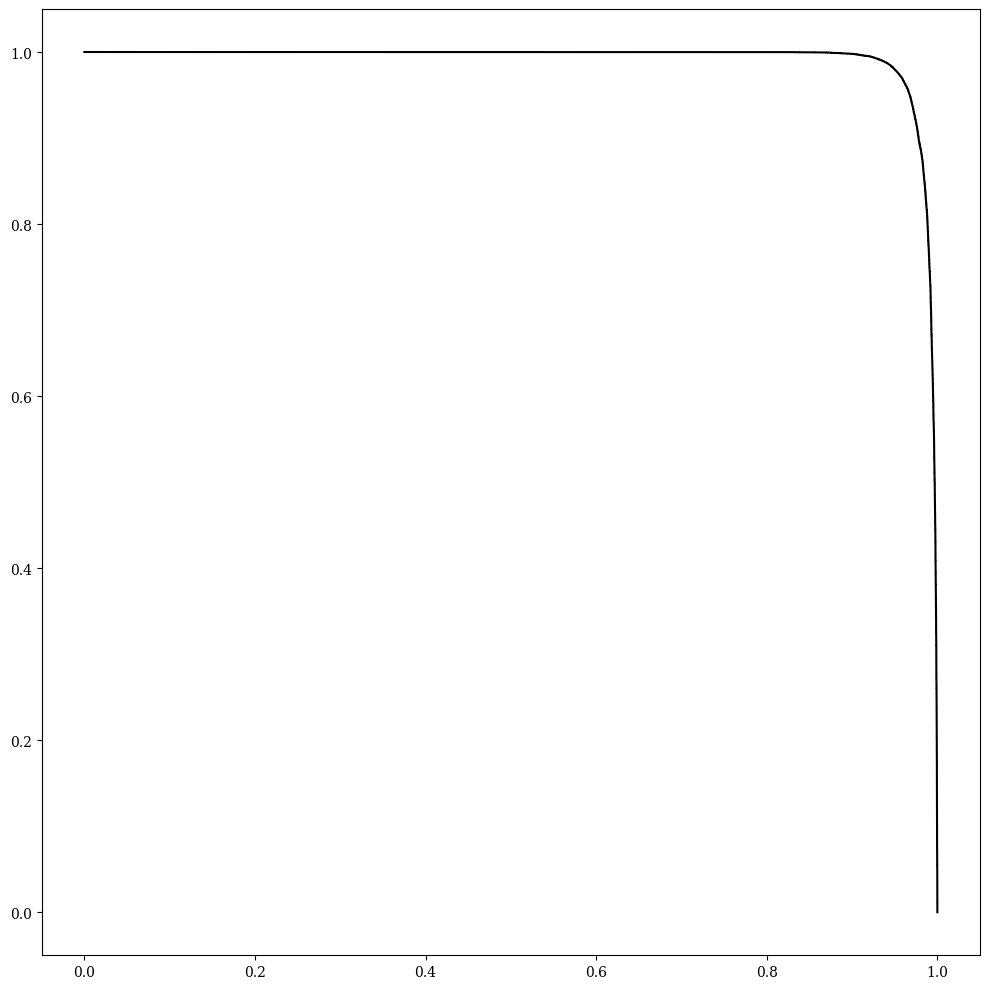

In [3]:
# Spectral PFN
for i in range(10):
    loss = BinaryCrossentropy(from_logits=False)
    #out_act = keras.activations.linear
    model_kwargs = {"Phi_sizes":(60,60,60), "F_sizes":(80,80,80),
                    "F_dropouts":0.1,
                    "input_dim":3,
                    "output_dim":1,"output_act":"sigmoid",
                    "patience":5,
                    "optimizer":Adam(1e-4),
                    "loss":loss,
                    "summary":True}
    model_kwargs['spectral'] = True
    train_kwargs = {"epochs":150,"verbose":1,"batch_size":10000}
    pfn, auc, pfn_fp, efn_tp, threshs = train_pfn((train,train_labels),
                                                  (test,test_labels),
                                                  (val,val_labels),
                                                  model_kwargs,
                                                  train_kwargs,
                                                  plot=True)
    pfn.save(f"keras_models_PFN_wta/gjet_spectralPFN_zpT_iter{i}.keras")
    del pfn
    gc.collect()